# Exploratory Data Analysis

## CaBi Trip Duration

### Problem Statement: How can Capital Bikeshare (CaBi) turn "casual" riders (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass) into "registered" members (Annual Member, 30-Day Member or Day Key Member)?

In [3]:
import pandas as pd             #pandas for using dataframe and reading csv file(s)
import numpy as np              #numpy for vector operations and basic maths
import matplotlib.pyplot as plt #for plotting
%matplotlib inline              
import seaborn as sns           #for making plots
from haversine import haversine #for working with latitudinal and longitudinal data points
import math                     #for basic math operations
import warnings
from pandas.plotting import parallel_coordinates #for multivariate plots
warnings.filterwarnings('ignore') #ignore deprecation warnings

In [4]:
#importing data
data = pd.read_csv('../Data/Combined_df_teg.csv')

In [5]:
data = data.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)

In [6]:
data.columns

Index(['Duration', 'Start.date', 'End.date', 'Start.station.number',
       'Start.station', 'End.station.number', 'End.station', 'rideable_type',
       'Member.type', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance_miles'],
      dtype='object')

In [7]:
#first 20 instances using "head()" function
data.head(20)

Duration           Start.date             End.date  \
0    27.583333  2016-09-15 05:38:08  2016-09-15 06:05:43   
1     6.400000  2016-02-02 20:08:34  2016-02-02 20:14:58   
2   112.516667  2016-01-16 11:52:15  2016-01-16 13:44:46   
3    22.533333  2016-04-24 07:32:58  2016-04-24 07:55:30   
4    17.316667  2016-05-16 09:40:43  2016-05-16 09:58:03   
5    14.000000  2016-11-05 00:23:56  2016-11-05 00:37:57   
6     5.300000  2016-06-15 11:35:44  2016-06-15 11:41:03   
7    40.366667  2016-09-15 15:49:28  2016-09-15 16:29:50   
8     2.550000  2016-03-29 09:05:01  2016-03-29 09:07:34   
9    26.066667  2016-04-16 16:01:36  2016-04-16 16:27:41   
10    5.900000  2016-04-08 12:04:45  2016-04-08 12:10:39   
11    3.666667  2016-07-02 09:11:06  2016-07-02 09:14:47   
12    6.216667  2016-03-28 18:30:57  2016-03-28 18:37:10   
13   48.783333  2016-09-11 21:08:17  2016-09-11 21:57:04   
14   24.016667  2016-04-17 16:31:25  2016-04-17 16:55:27   
15   10.066667  2016-11-22 07:32:27  2016-11-22 07:42:32   
16  331.516667  2016-06-29 13:30:29  2016-06-29 19:02:00   
17  214.616667  2016-07-09 12:38:05  2016-07-09 16:12:42   
18   34.983333  2016-02-13 00:11:06  2016-02-13 00:46:05   
19   16.533333  2016-11-05 00:21:10  2016-11-05 00:37:43   

    Start.station.number        Start.station  End.station.number  \
0                31000.0  Eads St & 15th St S             31205.0   
1                31000.0  Eads St & 15th St S             31005.0   
2                31000.0  Eads St & 15th St S             31000.0   
3                31000.0  Eads St & 15th St S             31247.0   
4                31000.0  Eads St & 15th St S             31088.0   
5                31000.0  Eads St & 15th St S             31000.0   
6                31000.0  Eads St & 15th St S             31011.0   
7                31000.0  Eads St & 15th St S             31289.0   
8                31000.0  Eads St & 15th St S             31012.0   
9                31000.0  Eads St & 15th St S             31258.0   
10               31000.0  Eads St & 15th St S             31005.0   
11               31000.0  Eads St & 15th St S             31005.0   
12               31000.0  Eads St & 15th St S             31052.0   
13               31000.0  Eads St & 15th St S             31000.0   
14               31000.0  Eads St & 15th St S             31258.0   
15               31000.0  Eads St & 15th St S             31052.0   
16               31000.0  Eads St & 15th St S             31042.0   
17               31000.0  Eads St & 15th St S             31289.0   
18               31000.0  Eads St & 15th St S             31000.0   
19               31000.0  Eads St & 15th St S             31000.0   

                                    End.station rideable_type Member.type  \
0                                21st & I St NW  classic_bike      Member   
1       Pentagon City Metro / 12th & S Hayes St  classic_bike      Member   
2                           Eads St & 15th St S  classic_bike      Casual   
3                     Jefferson Dr & 14th St SW  classic_bike      Casual   
4                 Mount Vernon Ave & Kennedy St  classic_bike      Casual   
5                           Eads St & 15th St S  classic_bike      Casual   
6                             23rd & Crystal Dr  classic_bike      Member   
7   Henry Bacon Dr & Lincoln Memorial Circle NW  classic_bike      Casual   
8                             26th & S Clark St  classic_bike      Member   
9                              Lincoln Memorial  classic_bike      Member   
10      Pentagon City Metro / 12th & S Hayes St  classic_bike      Member   
11      Pentagon City Metro / 12th & S Hayes St  classic_bike      Member   
12                      Potomac Ave & 35th St S  classic_bike      Member   
13                          Eads St & 15th St S  classic_bike      Casual   
14                             Lincoln Memorial  classic_bike      Casual   
15                      Potomac Ave & 35th St S  classic_bike  

In [8]:
#last 20 instances using "tail()" function
data.tail(20)

Duration           Start.date             End.date  \
2107164   7.766667  2022-09-27 10:10:55  2022-09-27 10:18:41   
2107165  35.683333  2022-04-13 09:58:56  2022-04-13 10:34:37   
2107166   5.116667  2022-09-22 07:14:50  2022-09-22 07:19:57   
2107167   4.766667  2022-04-07 06:47:41  2022-04-07 06:52:27   
2107168   4.166667  2022-05-01 11:16:31  2022-05-01 11:20:41   
2107169  67.883333  2022-09-07 17:33:45  2022-09-07 18:41:38   
2107170   3.666667  2022-07-19 12:43:59  2022-07-19 12:47:39   
2107171   5.850000  2022-08-17 13:20:27  2022-08-17 13:26:18   
2107172   5.066667  2022-08-25 18:31:53  2022-08-25 18:36:57   
2107173  41.916667  2022-09-28 20:17:26  2022-09-28 20:59:21   
2107174  20.650000  2022-09-28 18:21:27  2022-09-28 18:42:06   
2107175  41.733333  2022-06-05 20:45:43  2022-06-05 21:27:27   
2107176   5.416667  2022-09-26 08:06:43  2022-09-26 08:12:08   
2107177   8.233333  2022-09-27 19:13:26  2022-09-27 19:21:40   
2107178   7.100000  2022-09-26 17:42:04  2022-09-26 17:49:10   
2107179   5.450000  2022-06-06 08:57:59  2022-06-06 09:03:26   
2107180  49.466667  2022-04-22 17:25:30  2022-04-22 18:14:58   
2107181   7.850000  2022-05-22 17:26:00  2022-05-22 17:33:51   
2107182  12.400000  2022-05-05 17:52:11  2022-05-05 18:04:35   
2107183  11.566667  2022-06-15 18:54:04  2022-06-15 19:05:38   

         Start.station.number                    Start.station  \
2107164               32609.0  W Columbia St & N Washington St   
2107165               32609.0  W Columbia St & N Washington St   
2107166               32609.0  W Columbia St & N Washington St   
2107167               32609.0  W Columbia St & N Washington St   
2107168               32609.0  W Columbia St & N Washington St   
2107169               32609.0  W Columbia St & N Washington St   
2107170               32609.0  W Columbia St & N Washington St   
2107171               32609.0  W Columbia St & N Washington St   
2107172               32609.0  W Columbia St & N Washington St   
2107173               32609.0  W Columbia St & N Washington St   
2107174               32609.0  W Columbia St & N Washington St   
2107175               32609.0  W Columbia St & N Washington St   
2107176               32609.0  W Columbia St & N Washington St   
2107177               32609.0  W Columbia St & N Washington St   
2107178               32609.0  W Columbia St & N Washington St   
2107179               32609.0  W Columbia St & N Washington St   
2107180               32901.0                   6035 Warehouse   
2107181               32901.0                   6035 Warehouse   
2107182               32901.0                   6035 Warehouse   
2107183               32901.0                   6035 Warehouse   

         End.station.number  \
2107164             32602.0   
2107165             31236.0   
2107166             31904.0   
2107167             31904.0   
2107168             32608.0   
2107169             32600.0   
2107170             32608.0   
2107171             32602.0   
2107172             31904.0   
2107173             32605.0   
2107174             31948.0   
2107175             32609.0   
2107176             31904.0   
2107177             31904.0   
2107178             32604.0   
2107179             31904.0   
2107180             31602.0   
2107181             31515.0   
2107182             32011.0   
2107183             32011.0   

                                               End.station  rideable_type  \
2107164                              N Oak St & W Broad St   classic_bike   
2107165             37th & O St NW / Georgetown University   classic_bike   
2107166  East Falls Church Metro / Sycamore St & 19th St N   classic_bike   
2107167  East Falls Church Metro / Sycamore St & 19th St N  electric_bike   
2107168  Falls Church City Hall / Park Ave & Little Fal...   classic_bike   
2107169  Meridian High School / Haycock Rd & Leesburg Pike   classic_bike   
2107170  Falls Church City Hall / Park Ave & Little Fal...   classic_bike   
2107171   

In [9]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(2107184, 14)

In [10]:
#Printing all the columns present in data
data.columns

Index(['Duration', 'Start.date', 'End.date', 'Start.station.number',
       'Start.station', 'End.station.number', 'End.station', 'rideable_type',
       'Member.type', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance_miles'],
      dtype='object')

In [11]:
#Checking for NaN values present in data
data.isna().sum()

Duration                0
Start.date              0
End.date                0
Start.station.number    0
Start.station           0
End.station.number      0
End.station             0
rideable_type           0
Member.type             0
start_lat               0
start_lng               0
end_lat                 0
end_lng                 0
distance_miles          0
dtype: int64

In [13]:
data.shape

(2107184, 14)

## Variable Identification and Typecasting

In [14]:
# A closer look at the data types present in the data
data.dtypes

Duration                float64
Start.date               object
End.date                 object
Start.station.number    float64
Start.station            object
End.station.number      float64
End.station              object
rideable_type            object
Member.type              object
start_lat               float64
start_lng               float64
end_lat                 float64
end_lng                 float64
distance_miles          float64
dtype: object

There are a lot of variables visible at once, so let's narrow this down by looking **at one datatype at once**. We will start with **int64** data type.


### Integer Data Type

In [15]:
#Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

Series([], dtype: object)

Summary:

*    **vendor_id** is a unique, nominal code indicating the provider/business associated with the trip record. Note that there are only ***2 different vendors/businesses providing the taxi trips in our dataset***. Therefore, it needs to be **converted to a category**.

*    **passenger_count** represents the number of passengers in the vehicle (driver entered value). **However, it does not take on continuous values and we shall consider it as a categorical variable.**.

*    **trip_duration** is duration of the trip in seconds and we are **okay with it as Integer**.

In [16]:
#Converting station numbers to category datatype
data['Start.station.number'] = data['Start.station.number'].astype('category')
data['End.station.number'] = data['End.station.number'].astype('category')
data.dtypes

Duration                 float64
Start.date                object
End.date                  object
Start.station.number    category
Start.station             object
End.station.number      category
End.station               object
rideable_type             object
Member.type               object
start_lat                float64
start_lng                float64
end_lat                  float64
end_lng                  float64
distance_miles           float64
dtype: object

### Object Data Type

In [17]:
#Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

Start.date       object
End.date         object
Start.station    object
End.station      object
rideable_type    object
Member.type      object
dtype: object

In [18]:
#Converting the object data type variables to their respective datatype
data['Member.type'] = data['Member.type'].astype('category')
data['Start.date'] = pd.to_datetime(data['Start.date'])
data['End.date'] = pd.to_datetime(data['End.date'])
data['rideable_type'] = data['rideable_type'].astype('category')

In [19]:
#Checking
data.dtypes

Duration                       float64
Start.date              datetime64[ns]
End.date                datetime64[ns]
Start.station.number          category
Start.station                   object
End.station.number            category
End.station                     object
rideable_type                 category
Member.type                   category
start_lat                      float64
start_lng                      float64
end_lat                        float64
end_lng                        float64
distance_miles                 float64
dtype: object

### Float Data Type

In [20]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

Duration          float64
start_lat         float64
start_lng         float64
end_lat           float64
end_lng           float64
distance_miles    float64
dtype: object

*    ***These look alright as is and should remain as float datatype***

### datetime Data Type

*    ***Although we already did convert both variables to datetime datatypes, we dont have to specify a format by using directives as it is already formatted correctly and we shall be using the 24 hour clock***

*    ***We shall now extract important time-based features for better EDA experience***

In [21]:
# create time based features for pickup_datetime 
data['start_date_moy'] = data["Start.date"].dt.month
data['start_date_hour'] = data["Start.date"].dt.hour

In [22]:
# create more features for pickup_datetime 
data['start_date_woy'] = data["Start.date"].dt.weekofyear
data['start_date_dow'] = data["Start.date"].dt.dayofweek
data['start_date_doy'] = data["Start.date"].dt.dayofyear

In [23]:
# create time based features for dropoff_datetime 
data['end_date_moy'] = data["End.date"].dt.month
data['end_date_hour'] = data["End.date"].dt.hour
data['end_date_woy'] = data["End.date"].dt.weekofyear
data['end_date_dow'] = data["End.date"].dt.dayofweek
data['end_date_doy'] = data["End.date"].dt.dayofyear

In [24]:
data.head()

Duration          Start.date            End.date Start.station.number  \
0   27.583333 2016-09-15 05:38:08 2016-09-15 06:05:43              31000.0   
1    6.400000 2016-02-02 20:08:34 2016-02-02 20:14:58              31000.0   
2  112.516667 2016-01-16 11:52:15 2016-01-16 13:44:46              31000.0   
3   22.533333 2016-04-24 07:32:58 2016-04-24 07:55:30              31000.0   
4   17.316667 2016-05-16 09:40:43 2016-05-16 09:58:03              31000.0   

         Start.station End.station.number  \
0  Eads St & 15th St S            31205.0   
1  Eads St & 15th St S            31005.0   
2  Eads St & 15th St S            31000.0   
3  Eads St & 15th St S            31247.0   
4  Eads St & 15th St S            31088.0   

                               End.station rideable_type Member.type  \
0                           21st & I St NW  classic_bike      Member   
1  Pentagon City Metro / 12th & S Hayes St  classic_bike      Member   
2                      Eads St & 15th St S  classic_bike      Casual   
3                Jefferson Dr & 14th St SW  classic_bike      Casual   
4            Mount Vernon Ave & Kennedy St  classic_bike      Casual   

   start_lat  ...  start_date_moy  start_date_hour  start_date_woy  \
0  38.859037  ...               9                5              37   
1  38.859037  ...               2               20               5   
2  38.859037  ...               1               11               2   
3  38.859037  ...               4                7              16   
4  38.859037  ...               5                9              20   

   start_date_dow  start_date_doy  end_date_moy  end_date_hour  end_date_woy  \
0               3             259             9              6            37   
1               1              33             2             20             5   
2               5              16             1             13             2   
3               6             115             4              7            16   
4               0             137             5              9            20   

   end_date_dow  end_date_doy  
0             3           259  
1             1            33  
2             5            16  
3             6           115  
4             0           137  

[5 rows x 24 columns]

In [25]:
data.tail()

Duration          Start.date            End.date  \
2107179   5.450000 2022-06-06 08:57:59 2022-06-06 09:03:26   
2107180  49.466667 2022-04-22 17:25:30 2022-04-22 18:14:58   
2107181   7.850000 2022-05-22 17:26:00 2022-05-22 17:33:51   
2107182  12.400000 2022-05-05 17:52:11 2022-05-05 18:04:35   
2107183  11.566667 2022-06-15 18:54:04 2022-06-15 19:05:38   

        Start.station.number                    Start.station  \
2107179              32609.0  W Columbia St & N Washington St   
2107180              32901.0                   6035 Warehouse   
2107181              32901.0                   6035 Warehouse   
2107182              32901.0                   6035 Warehouse   
2107183              32901.0                   6035 Warehouse   

        End.station.number                                        End.station  \
2107179            31904.0  East Falls Church Metro / Sycamore St & 19th St N   
2107180            31602.0                            Park Rd & Holmead Pl NW   
2107181            31515.0                                  Fort Totten Metro   
2107182            32011.0                                Maple & Ritchie Ave   
2107183            32011.0                                Maple & Ritchie Ave   

        rideable_type Member.type  start_lat  ...  start_date_moy  \
2107179  classic_bike      casual  38.885621  ...               6   
2107180  classic_bike      member  38.963810  ...               4   
2107181  classic_bike      member  38.963810  ...               5   
2107182  classic_bike      casual  38.963810  ...               5   
2107183  classic_bike      member  38.963810  ...               6   

         start_date_hour  start_date_woy  start_date_dow  start_date_doy  \
2107179                8              23               0             157   
2107180               17              16               4             112   
2107181               17              20               6             142   
2107182               17              18               3             125   
2107183               18              24               2             166   

         end_date_moy  end_date_hour  end_date_woy  end_date_dow  end_date_doy  
2107179             6              9            23             0           157  
2107180             4             18            16             4           112  
2107181             5             17            20             6           142  
2107182             5             18            18             3           125  
2107183             6             19            24             2           166  

[5 rows x 24 columns]

In [26]:
data.dtypes

Duration                       float64
Start.date              datetime64[ns]
End.date                datetime64[ns]
Start.station.number          category
Start.station                   object
End.station.number            category
End.station                     object
rideable_type                 category
Member.type                   category
start_lat                      float64
start_lng                      float64
end_lat                        float64
end_lng                        float64
distance_miles                 float64
start_date_moy                   int64
start_date_hour                  int64
start_date_woy                   int64
start_date_dow                   int64
start_date_doy                   int64
end_date_moy                     int64
end_date_hour                    int64
end_date_woy                     int64
end_date_dow                     int64
end_date_doy                     int64
dtype: object

In [27]:
data.describe()

Duration     start_lat     start_lng       end_lat       end_lng  \
count  2.107184e+06  2.107184e+06  2.107184e+06  2.107184e+06  2.107184e+06   
mean   2.130969e+01  3.890187e+01 -7.703341e+01  3.890061e+01 -7.703289e+01   
std    4.818881e+02  2.637000e-02  3.111057e-02  4.585207e-02  8.105873e-02   
min   -2.898198e+04  3.878261e+01 -7.736844e+01  0.000000e+00 -7.736842e+01   
25%    6.883333e+00  3.889046e+01 -7.704513e+01  3.888999e+01 -7.704500e+01   
50%    1.193333e+01  3.890093e+01 -7.703228e+01  3.890041e+01 -7.703222e+01   
75%    2.065000e+01  3.891263e+01 -7.701725e+01  3.890987e+01 -7.701725e+01   
max    2.575160e+05  3.912583e+01 -7.682554e+01  3.912600e+01  0.000000e+00   

       distance_miles  start_date_moy  start_date_hour  start_date_woy  \
count    2.107184e+06    2.107184e+06     2.107184e+06    2.107184e+06   
mean     1.128627e+00    6.666803e+00     1.400683e+01    2.711054e+01   
std      5.446275e+00    2.975479e+00     4.774168e+00    1.293777e+01   
min      0.000000e+00    1.000000e+00     0.000000e+00    1.000000e+00   
25%      5.558447e-01    4.000000e+00     1.000000e+01    1.700000e+01   
50%      9.341439e-01    7.000000e+00     1.500000e+01    2.700000e+01   
75%      1.493770e+00    9.000000e+00     1.800000e+01    3.700000e+01   
max      5.524370e+03    1.200000e+01     2.300000e+01    5.300000e+01   

       start_date_dow  start_date_doy  end_date_moy  end_date_hour  \
count    2.107184e+06    2.107184e+06  2.107184e+06   2.107184e+06   
mean     3.012072e+00    1.873499e+02  6.666883e+00   1.421988e+01   
std      1.971522e+00    9.061615e+01  2.975478e+00   4.842573e+00   
min      0.000000e+00    1.000000e+00  1.000000e+00   0.000000e+00   
25%      1.000000e+00    1.170000e+02  4.000000e+00   1.000000e+01   
50%      3.000000e+00    1.900000e+02  7.000000e+00   1.500000e+01   
75%      5.000000e+00    2.590000e+02  9.000000e+00   1.800000e+01   
max      6.000000e+00    3.660000e+02  1.200000e+01   2.300000e+01   

       end_date_woy  end_date_dow  end_date_doy  
count  2.107184e+06  2.107184e+06  2.107184e+06  
mean   2.711112e+01  3.012728e+00  1.873534e+02  
std    1.293777e+01  1.972783e+00  9.061627e+01  
min    1.000000e+00  0.000000e+00  1.000000e+00  
25%    1.700000e+01  1.000000e+00  1.170000e+02  
50%    2.700000e+01  3.000000e+00  1.900000e+02  
75%    3.700000e+01  5.000000e+00  2.590000e+02  
max    5.300000e+01  6.000000e+00  3.660000e+02

*   Now we are done breaking down the pick_up datetime variable into granular forms, as seen above, which will **help us better analyze information extracted from the pickup time and trip duration.** We are also done with the Variable identification and typecasting process and will now start the Univariate Analysis portion of the EDA, followed by Bivariate Analysis, and, lastly, Multivariate Analysis.

## Univariate Analysis: Numerical Variables

In [310]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

Duration           float64
start_lat          float64
start_lng          float64
end_lat            float64
end_lng            float64
distance_miles     float64
start_date_moy       int64
start_date_hour      int64
start_date_woy       int64
start_date_dow       int64
start_date_doy       int64
end_date_moy         int64
end_date_hour        int64
end_date_woy         int64
end_date_dow         int64
end_date_doy         int64
dtype: object

In [311]:
# segregating variables into groups
pickup_dropoff_location = ['start_lat','start_lng','end_lat','end_lng']
trip_details = ['Duration', 'distance_miles']
pickup_dropoff_time = ['start_date_moy', 'end_date_moy', 'start_date_hour', 'end_date_hour', 'start_date_woy', 'end_date_woy', 'start_date_dow', 'end_date_dow', 'start_date_doy', 'end_date_doy']

In [312]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (10*size,10), dpi = 150)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    mode = data[i].mode()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    #sns.scatterplot([median], [0], color = 'blue', label = "median")
    #sns.scatterplot([mode], [0], color = 'green', label = "mode")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)), fontdict = {'fontsize' : 15})
                                                                                           

### pickup_dropoff_location

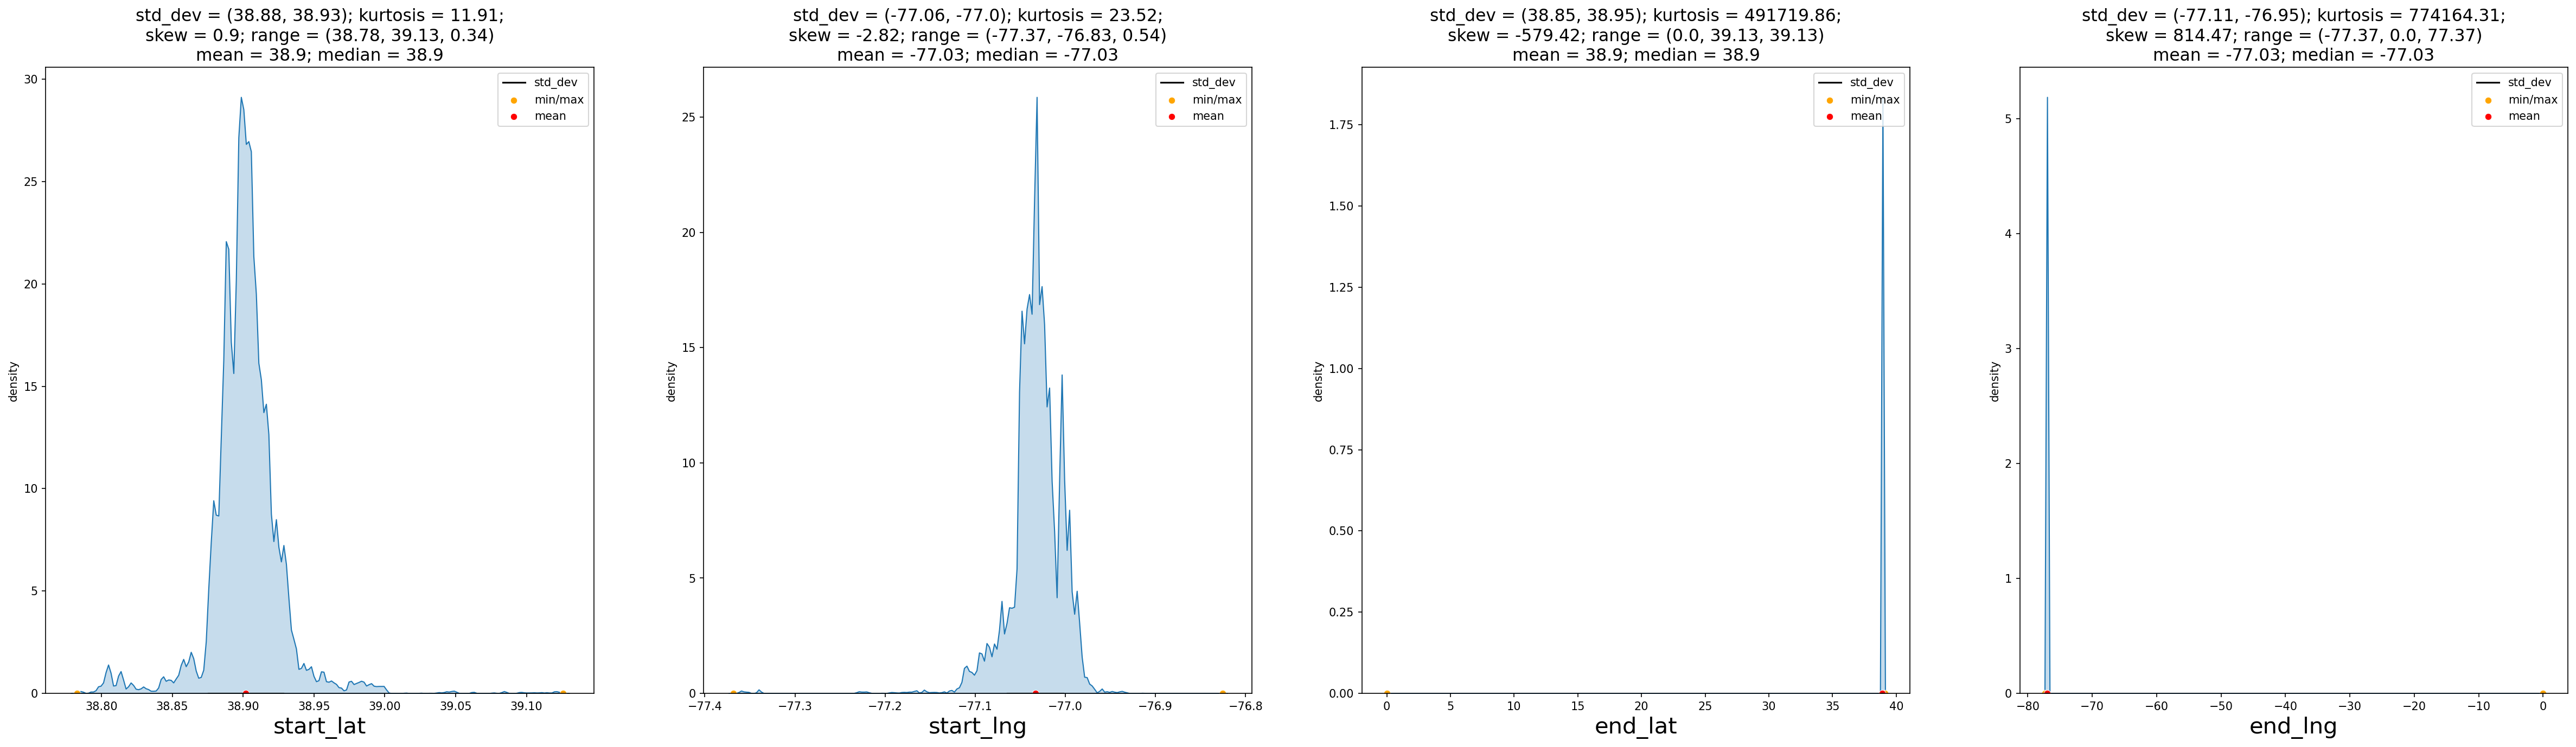

In [313]:
UVA_numeric(data,pickup_dropoff_location)

In [314]:
print(data.loc[data['End.station']=='Motivate Tech Office']['Duration'].mean())
print(data.loc[data['End.station']=='6035 Warehouse']['Duration'].mean())
print(data.loc[data['Start.station']=='Motivate Tech Office']['Duration'].mean())
print(data.loc[data['Start.station']=='6035 Warehouse']['Duration'].mean())

979.3833333333332
17176.728240740737
nan
14.123809523809523


In [315]:
data = data.loc[~(data['End.station']=='Motivate Tech Office')]
data = data.loc[~(data['End.station']=='6035 Warehouse')]
# data = data.loc[~(data['Start.station']=='Motivate Tech Office')]
# data = data.loc[~(data['Start.station']=='6035 Warehouse')]
data.shape

(2107110, 24)

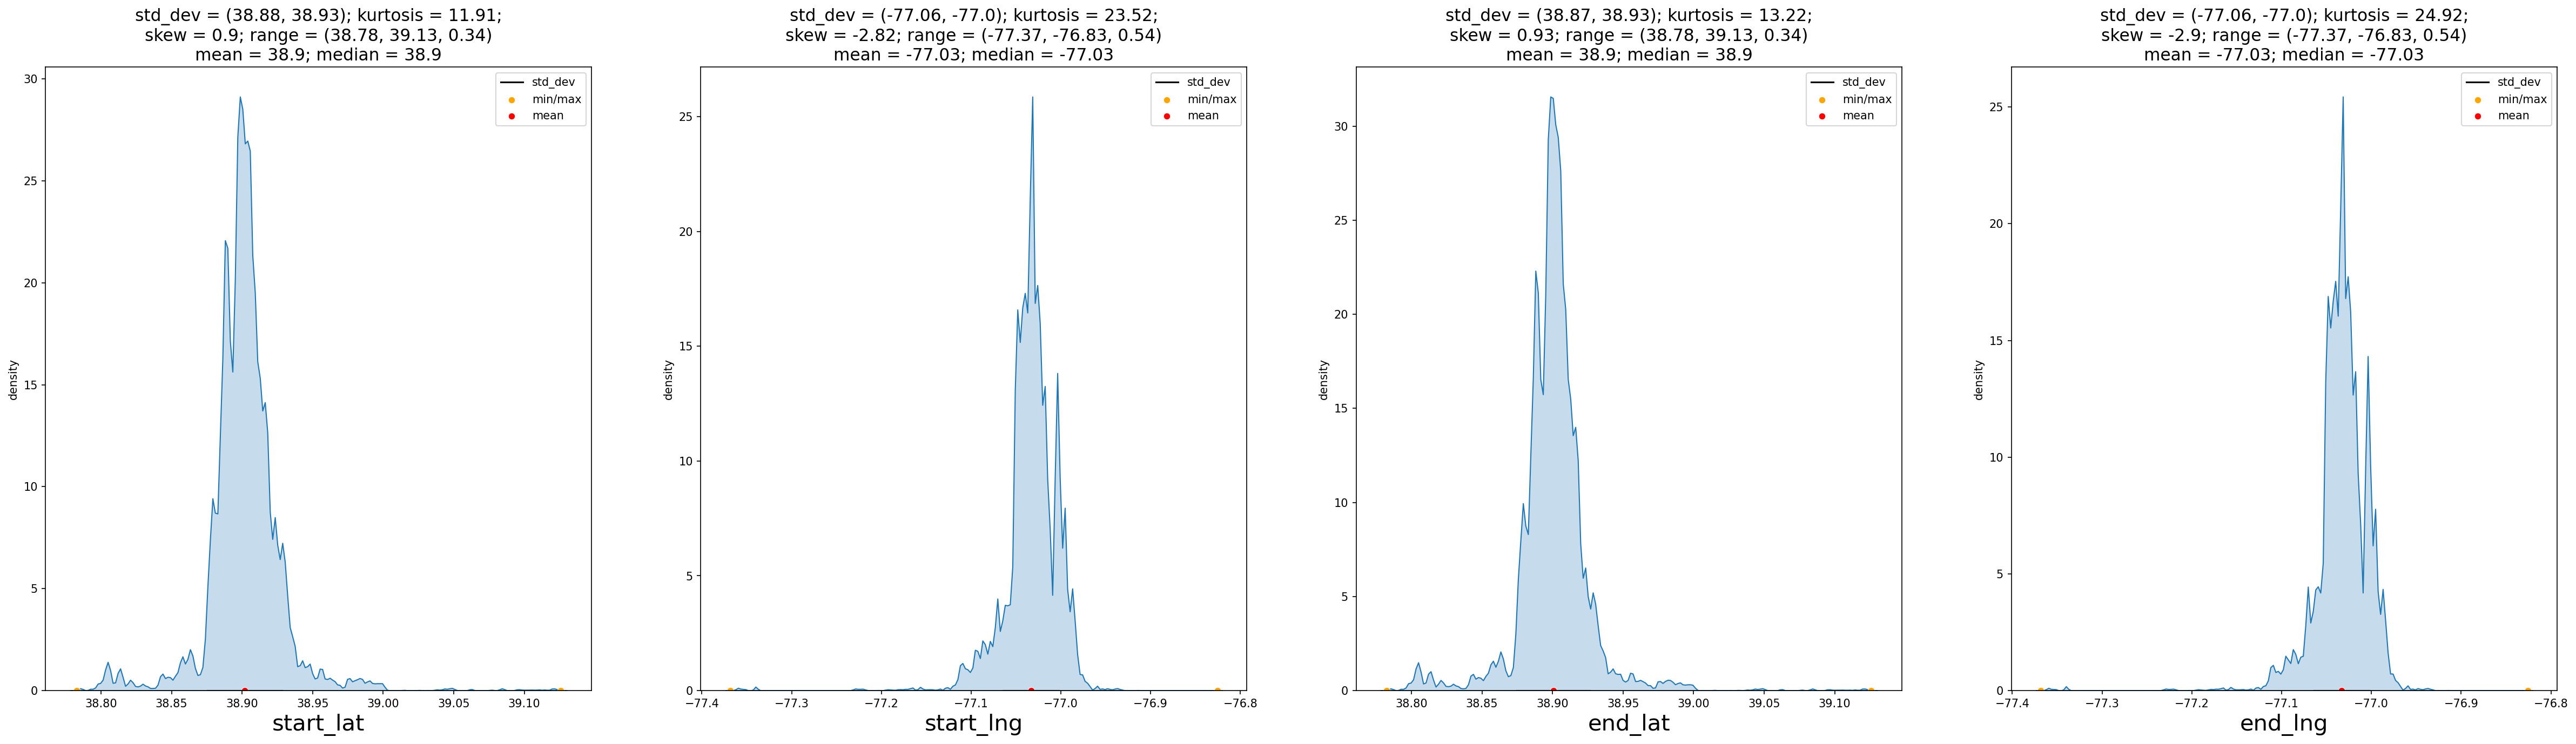

In [316]:
UVA_numeric(data,pickup_dropoff_location)

In [317]:
# # copying pickup_dropoff_location
pdl_data = data[pickup_dropoff_location]

# filtering using loc
pdl_data = pdl_data.loc[(pdl_data.start_lng > -77.2) & (pdl_data.start_lng < -76.95)]
pdl_data = pdl_data.loc[(pdl_data.start_lat < 39.01)]
pdl_data = pdl_data.loc[(pdl_data.end_lng > -77.2) & (pdl_data.end_lng < -76.95)]
pdl_data = pdl_data.loc[(pdl_data.end_lat < 39.01)]

# checking how many points are removed
len(data), len(pdl_data)

(2107110, 2086982)

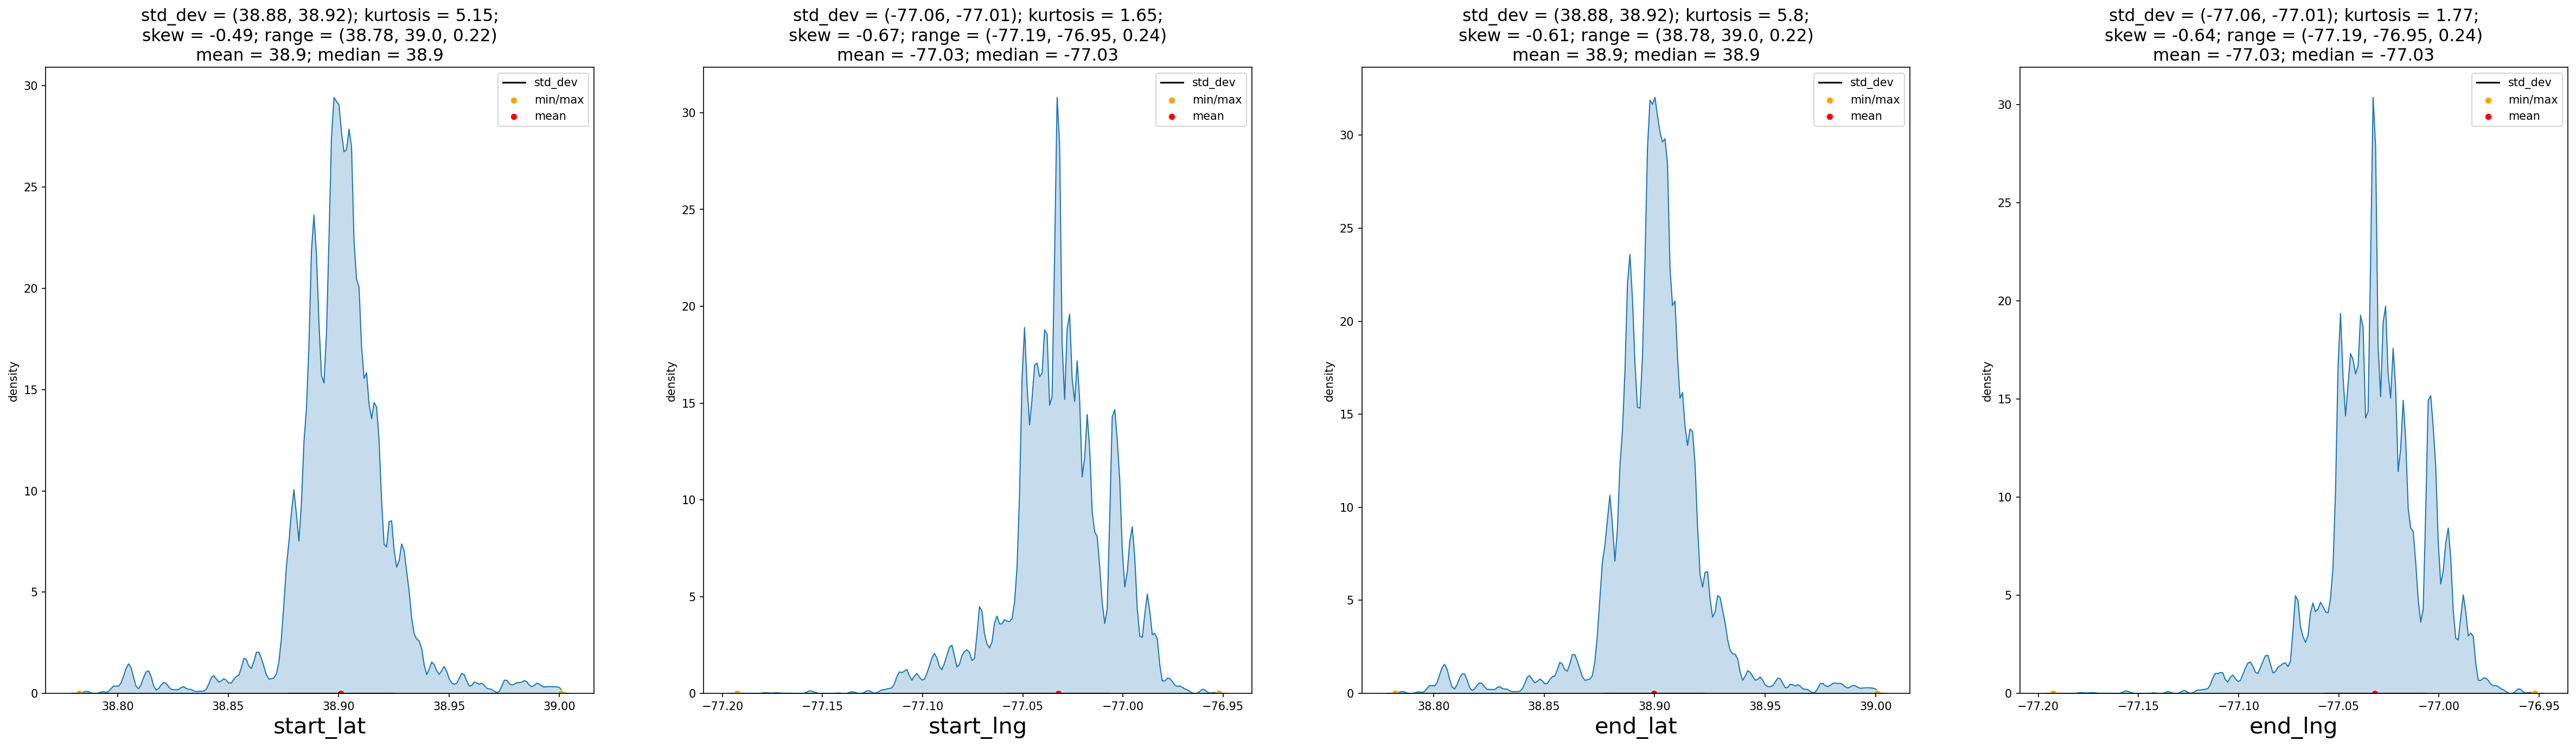

In [318]:
UVA_numeric(pdl_data,pickup_dropoff_location)

**Final Summary of pickup_dropoff_location:**

*    From the above KDE plots, we can conclude that the removal of outlier values from both latitude and longitudinal data did lower skewness and kurtosis by a big margin. Moreover, in the process we lost few amount of observations (729322-728194 = 1128), which would not hinder further EDA analysis, but provide a better picture

**Things to Investigate Further in EDA:**
*    Removal of the extreme values and Outliers in the dataset by following the limits we have set
*    Trip durations relation with outlier values of all features associated with the pickup_dropoff_location group

### trip_details

In [376]:
data['Duration'].max()

199.98333333333332

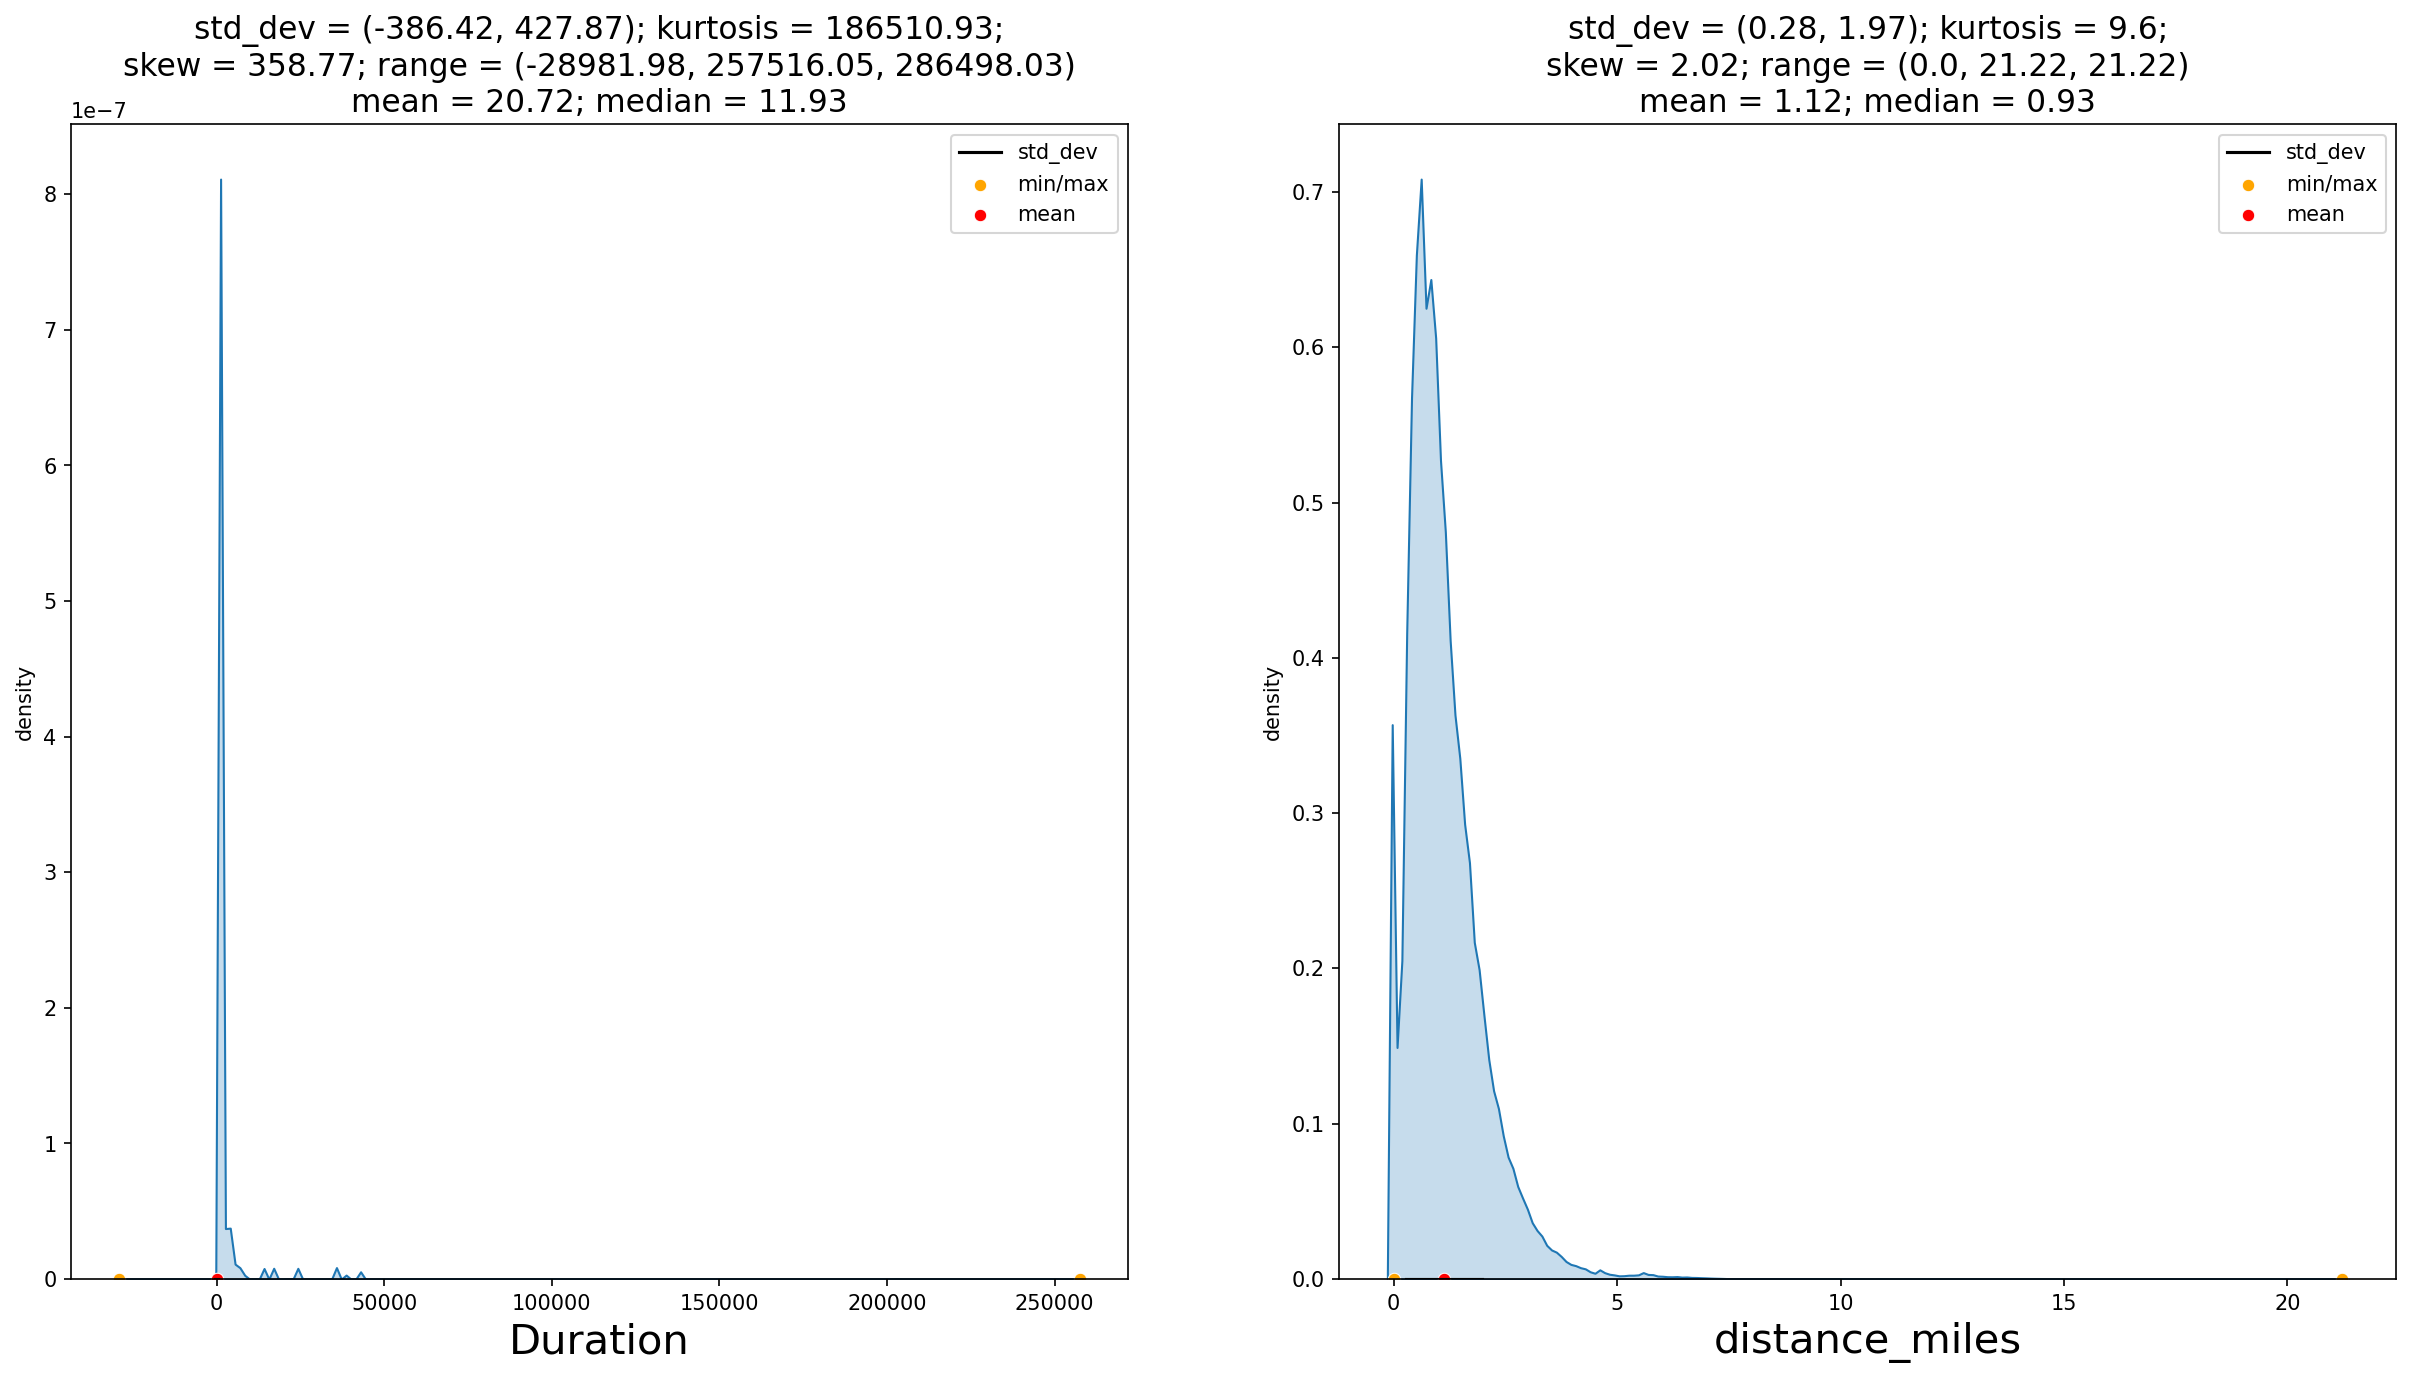

In [319]:
UVA_numeric(data,trip_details)

In [320]:
#data.loc[(data.Duration > 600) | (data.distance_miles > 8)]
data.loc[(data.Duration > 50000)] # definite outliers -> trips > 50k mins

Duration          Start.date            End.date  \
1473981   56315.283333 2020-04-25 14:43:39 2020-06-03 17:18:56   
1490095   59870.700000 2020-04-24 18:53:34 2020-06-05 08:44:16   
1495791   68682.333333 2020-10-03 17:05:10 2020-11-20 09:47:30   
1502902   78753.316667 2020-10-09 16:24:44 2020-12-03 08:58:03   
1502934  202780.900000 2020-05-16 17:13:03 2020-10-04 12:53:57   
1506457   59162.850000 2020-09-27 15:48:17 2020-11-07 17:51:08   
1515813  146561.300000 2020-09-19 14:00:21 2020-12-30 08:41:39   
1516076  147073.566667 2020-09-20 13:35:49 2020-12-31 16:49:23   
1518472  117703.233333 2020-10-02 17:26:15 2020-12-23 11:09:29   
1520711   72552.200000 2020-08-24 03:41:35 2020-10-13 12:53:47   
1536824   77761.333333 2020-05-16 18:33:24 2020-07-09 18:34:44   
1538534  257516.050000 2020-05-02 19:06:08 2020-10-28 15:02:11   
1556312  105773.350000 2020-04-09 18:50:07 2020-06-22 05:43:28   
1560549  237550.633333 2020-07-07 11:48:35 2020-12-19 10:59:13   
1573601   77671.500000 2020-04-21 17:10:46 2020-06-14 15:42:16   
1594638   56662.200000 2020-04-29 11:51:15 2020-06-07 20:13:27   
1607363   58691.883333 2020-04-03 00:23:55 2020-05-13 18:35:48   

        Start.station.number  \
1473981              31108.0   
1490095              31200.0   
1495791              31209.0   
1502902              31227.0   
1502934              31228.0   
1506457              31232.0   
1515813              31248.0   
1516076              31248.0   
1518472              31251.0   
1520711              31258.0   
1536824              31285.0   
1538534              31288.0   
1556312              31406.0   
1560549              31506.0   
1573601              31612.0   
1594638              31658.0   
1607363              32418.0   

                                             Start.station End.station.number  \
1473981                                      4th & M St SW            31419.0   
1490095               Massachusetts Ave & Dupont Circle NW            31047.0   
1495791                                     1st & N St  SE            31660.0   
1502902                          13th St & New York Ave NW            31276.0   
1502934                                      8th & H St NW            31805.0   
1506457          7th & F St NW / National Portrait Gallery            31132.0   
1515813  Smithsonian-National Mall / Jefferson Dr & 12t...            31643.0   
1516076  Smithsonian-National Mall / Jefferson Dr & 12t...            31615.0   
1518472                                     12th & L St NW            31817.0   
1520711                                   Lincoln Memorial            31245.0   
1536824                                     22nd & P ST NW            31063.0   
1538534                             4th St & Madison Dr NW            31818.0   
1556312                                14th & Upshur St NW            31615.0   
1560549                          1st & Rhode Island Ave NW            31214.0   
1573601                             D St & Maryland Ave NE            31102.0   
1594638                                Rosedale Rec Center            31662.0   
1607363                             West Hyattsville Metro            32420.0   

                                    End.station rideable_type Member.type  \
1473981              Georgia Ave & Morton St NW   docked_bike      casual   
1490095                       Braddock Rd Metro   docked_bike      casual   
1495791                           8th & K St NE   docked_bike      casual   
1502902                          15th & L St NW   docked_bike      casual   
1502934         Pennsylvania & Minnesota Ave SE   docked_bike      casual   
1506457                          13th & U St NW   docked_bike      casual   
1515813                           1st & D St SE   docked_bike      casual   
1516076                           6th & H St NE   docked_bike      casual   
1518472  1st & S Capitol St SE / Oxon Run Trail   docked_bike      casual   
1520711            

In [267]:
data.distance_miles[data.distance_miles == 0].count() # start and end station the same -> distance 0

88966

In [268]:
data.loc[(data["Start.station"] == data["End.station"])]['Duration']

2          112.516667
5           14.000000
13          48.783333
18          34.983333
19          16.533333
              ...    
2107119      0.116667
2107126     70.383333
2107133      1.883333
2107153    158.316667
2107175     41.733333
Name: Duration, Length: 109777, dtype: float64

In [321]:
# # copying trip_details
td_data = data[trip_details]

# filtering all trip_details variables using loc
td_data = td_data.loc[(td_data.Duration < 200) & (td_data.Duration > 0)]
td_data = td_data.loc[(td_data.distance_miles < 7)]

# checking how many points are removed
len(data), len(td_data)

(2107110, 2096610)

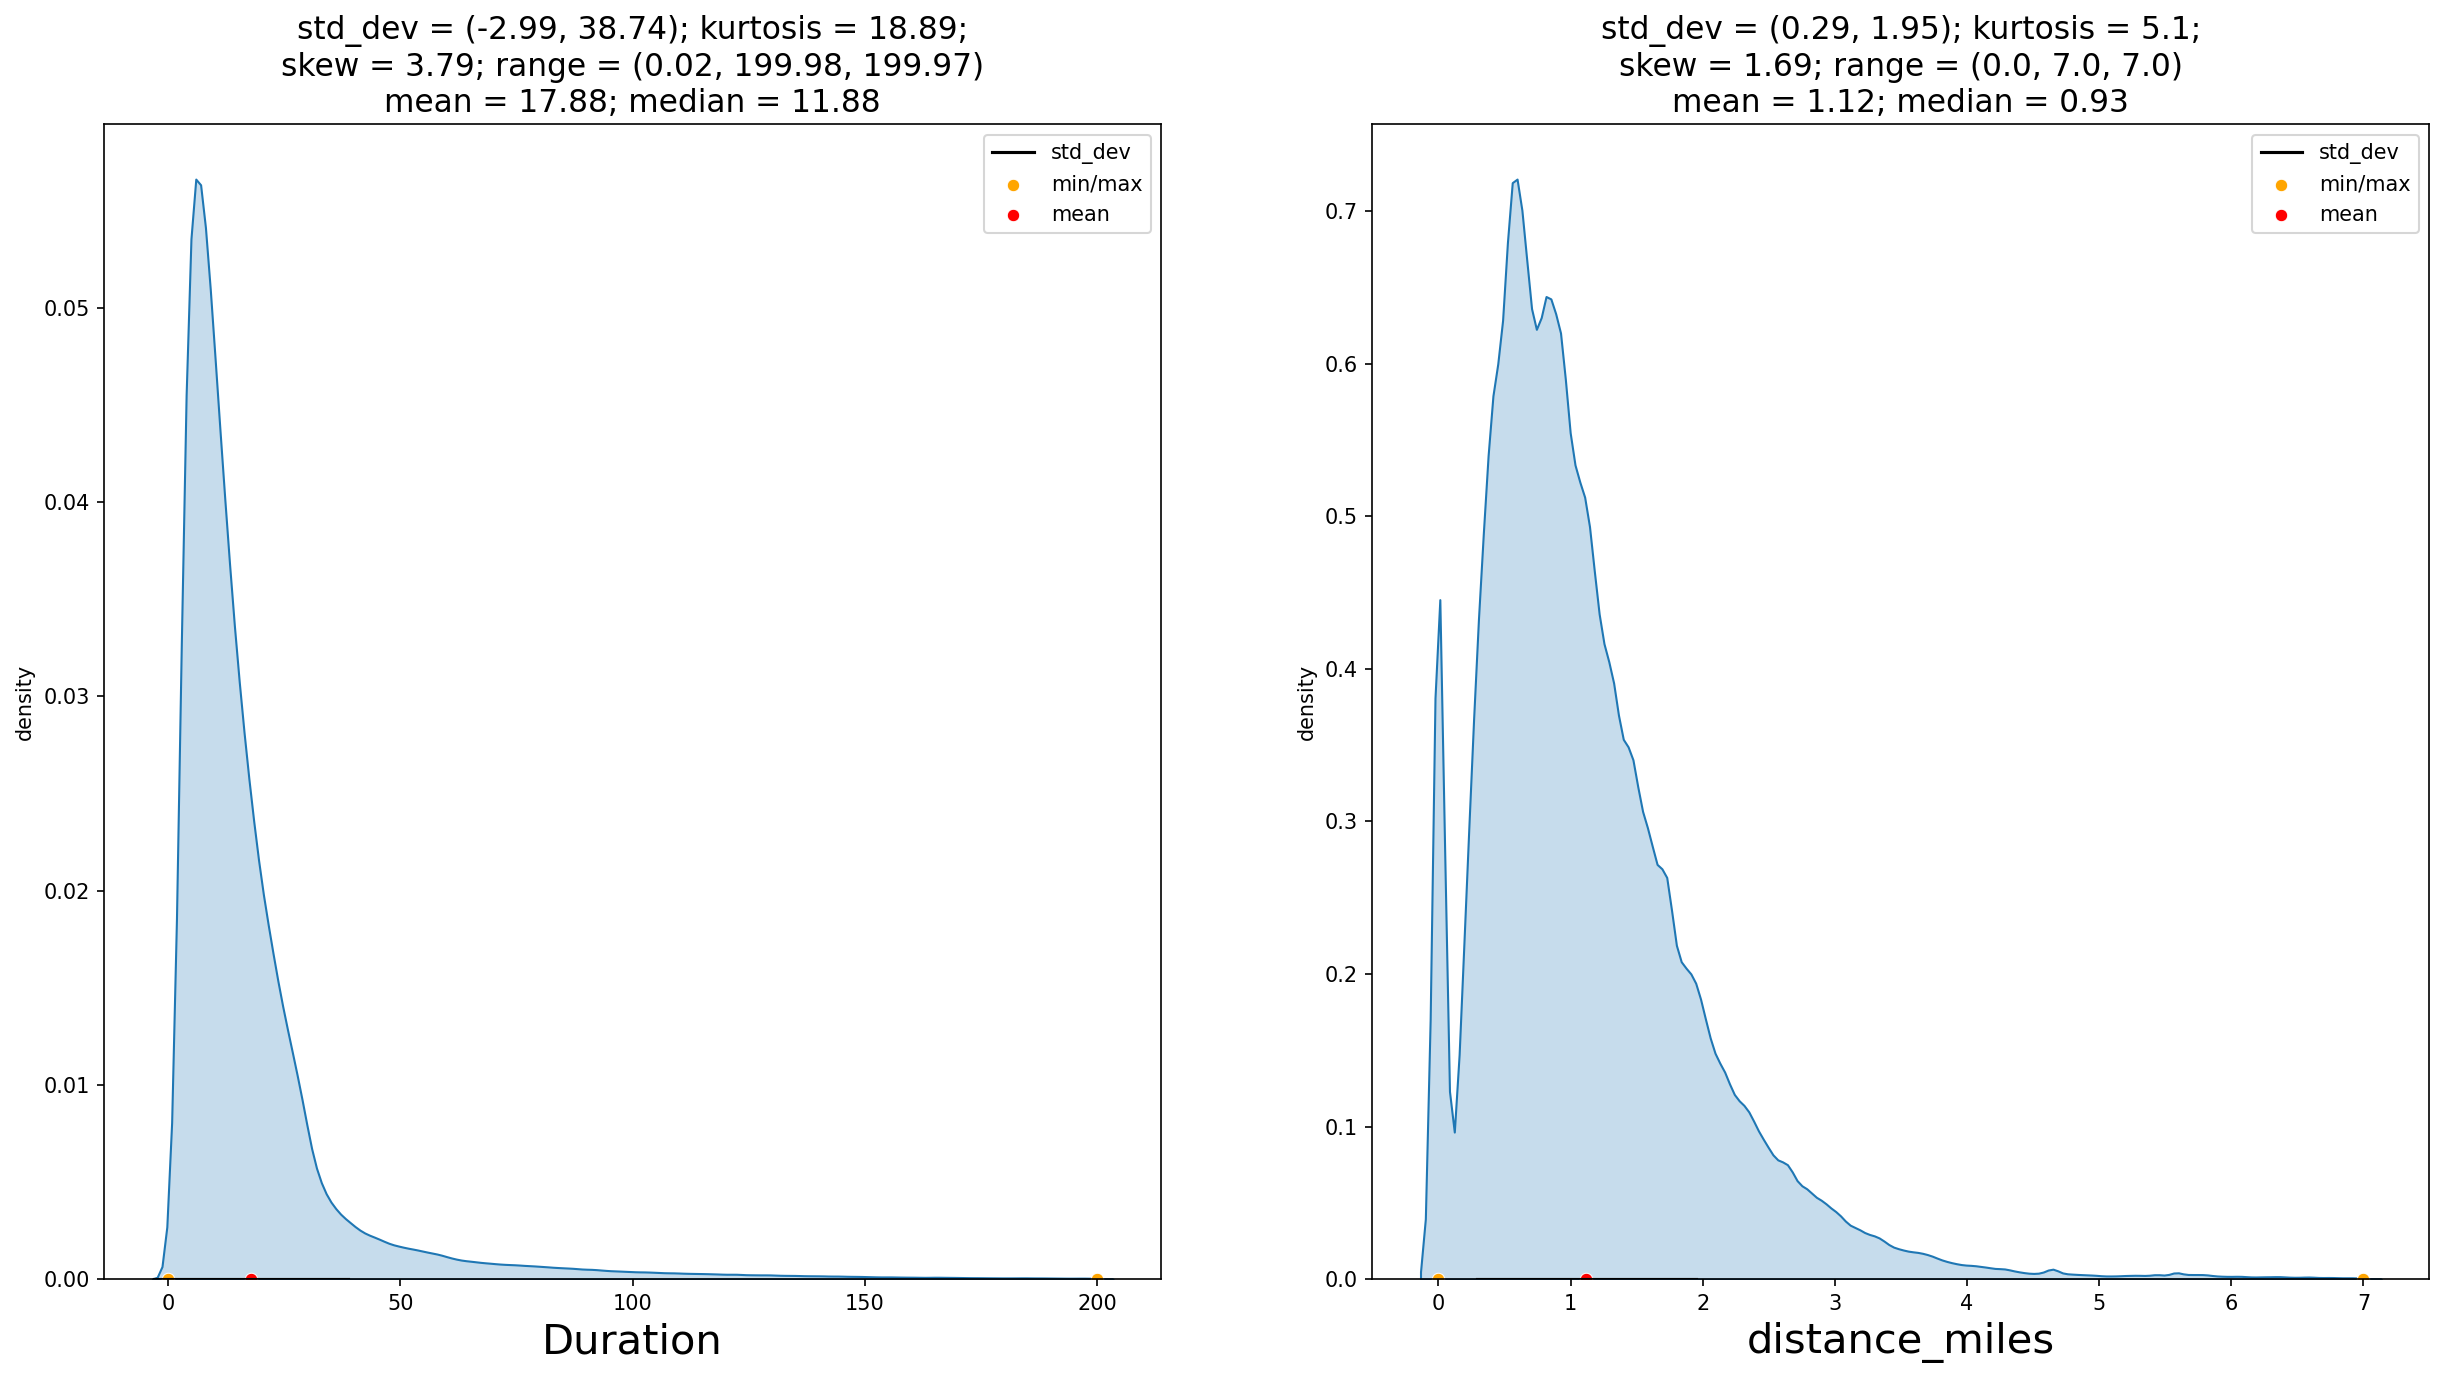

In [322]:
UVA_numeric(td_data,trip_details)

In [271]:
data.loc[(data.Duration > 0) & (data.Duration < 200)]

Duration          Start.date            End.date  \
0         27.583333 2016-09-15 05:38:08 2016-09-15 06:05:43   
1          6.400000 2016-02-02 20:08:34 2016-02-02 20:14:58   
2        112.516667 2016-01-16 11:52:15 2016-01-16 13:44:46   
3         22.533333 2016-04-24 07:32:58 2016-04-24 07:55:30   
4         17.316667 2016-05-16 09:40:43 2016-05-16 09:58:03   
...             ...                 ...                 ...   
2107179    5.450000 2022-06-06 08:57:59 2022-06-06 09:03:26   
2107180   49.466667 2022-04-22 17:25:30 2022-04-22 18:14:58   
2107181    7.850000 2022-05-22 17:26:00 2022-05-22 17:33:51   
2107182   12.400000 2022-05-05 17:52:11 2022-05-05 18:04:35   
2107183   11.566667 2022-06-15 18:54:04 2022-06-15 19:05:38   

        Start.station.number                    Start.station  \
0                    31000.0              Eads St & 15th St S   
1                    31000.0              Eads St & 15th St S   
2                    31000.0              Eads St & 15th St S   
3                    31000.0              Eads St & 15th St S   
4                    31000.0              Eads St & 15th St S   
...                      ...                              ...   
2107179              32609.0  W Columbia St & N Washington St   
2107180              32901.0                   6035 Warehouse   
2107181              32901.0                   6035 Warehouse   
2107182              32901.0                   6035 Warehouse   
2107183              32901.0                   6035 Warehouse   

        End.station.number                                        End.station  \
0                  31205.0                                     21st & I St NW   
1                  31005.0            Pentagon City Metro / 12th & S Hayes St   
2                  31000.0                                Eads St & 15th St S   
3                  31247.0                          Jefferson Dr & 14th St SW   
4                  31088.0                      Mount Vernon Ave & Kennedy St   
...                    ...                                                ...   
2107179            31904.0  East Falls Church Metro / Sycamore St & 19th St N   
2107180            31602.0                            Park Rd & Holmead Pl NW   
2107181            31515.0                                  Fort Totten Metro   
2107182            32011.0                                Maple & Ritchie Ave   
2107183            32011.0                                Maple & Ritchie Ave   

        rideable_type Member.type  start_lat  ...  start_date_moy  \
0        classic_bike      Member  38.859037  ...               9   
1        classic_bike      Member  38.859037  ...               2   
2        classic_bike      Casual  38.859037  ...               1   
3        classic_bike      Casual  38.859037  ...               4   
4        classic_bike      Casual  38.859037  ...               5   
...               ...         ...        ...  ...             ...   
2107179  classic_bike      casual  38.885621  ...               6   
2107180  classic_bike      member  38.963810  ...               4   
2107181  classic_bike      member  38.963810  ...               5   
2107182  classic_bike      casual  38.963810  ...               5   
2107183  classic_bike      member  38.963810  ...               6   

         start_date_hour  start_date_woy  start_date_dow  start_date_doy  \
0                      5              37               3             259   
1                     20               5               1              33   
2                     11               2               5              16   
3                      7              16               6             115   
4                      9              20               0             137   
...                  ...             ...             ...             ...   
2107179                8              23               0             157   
2107180               17              16               4       

In [272]:
data.shape

(2107110, 24)

In [273]:
data.loc[data['End.station']=='6035 Warehouse']['Duration'].mean()

nan

In [323]:
data = data.loc[(data.Duration > 0) & (data.Duration < 200)]

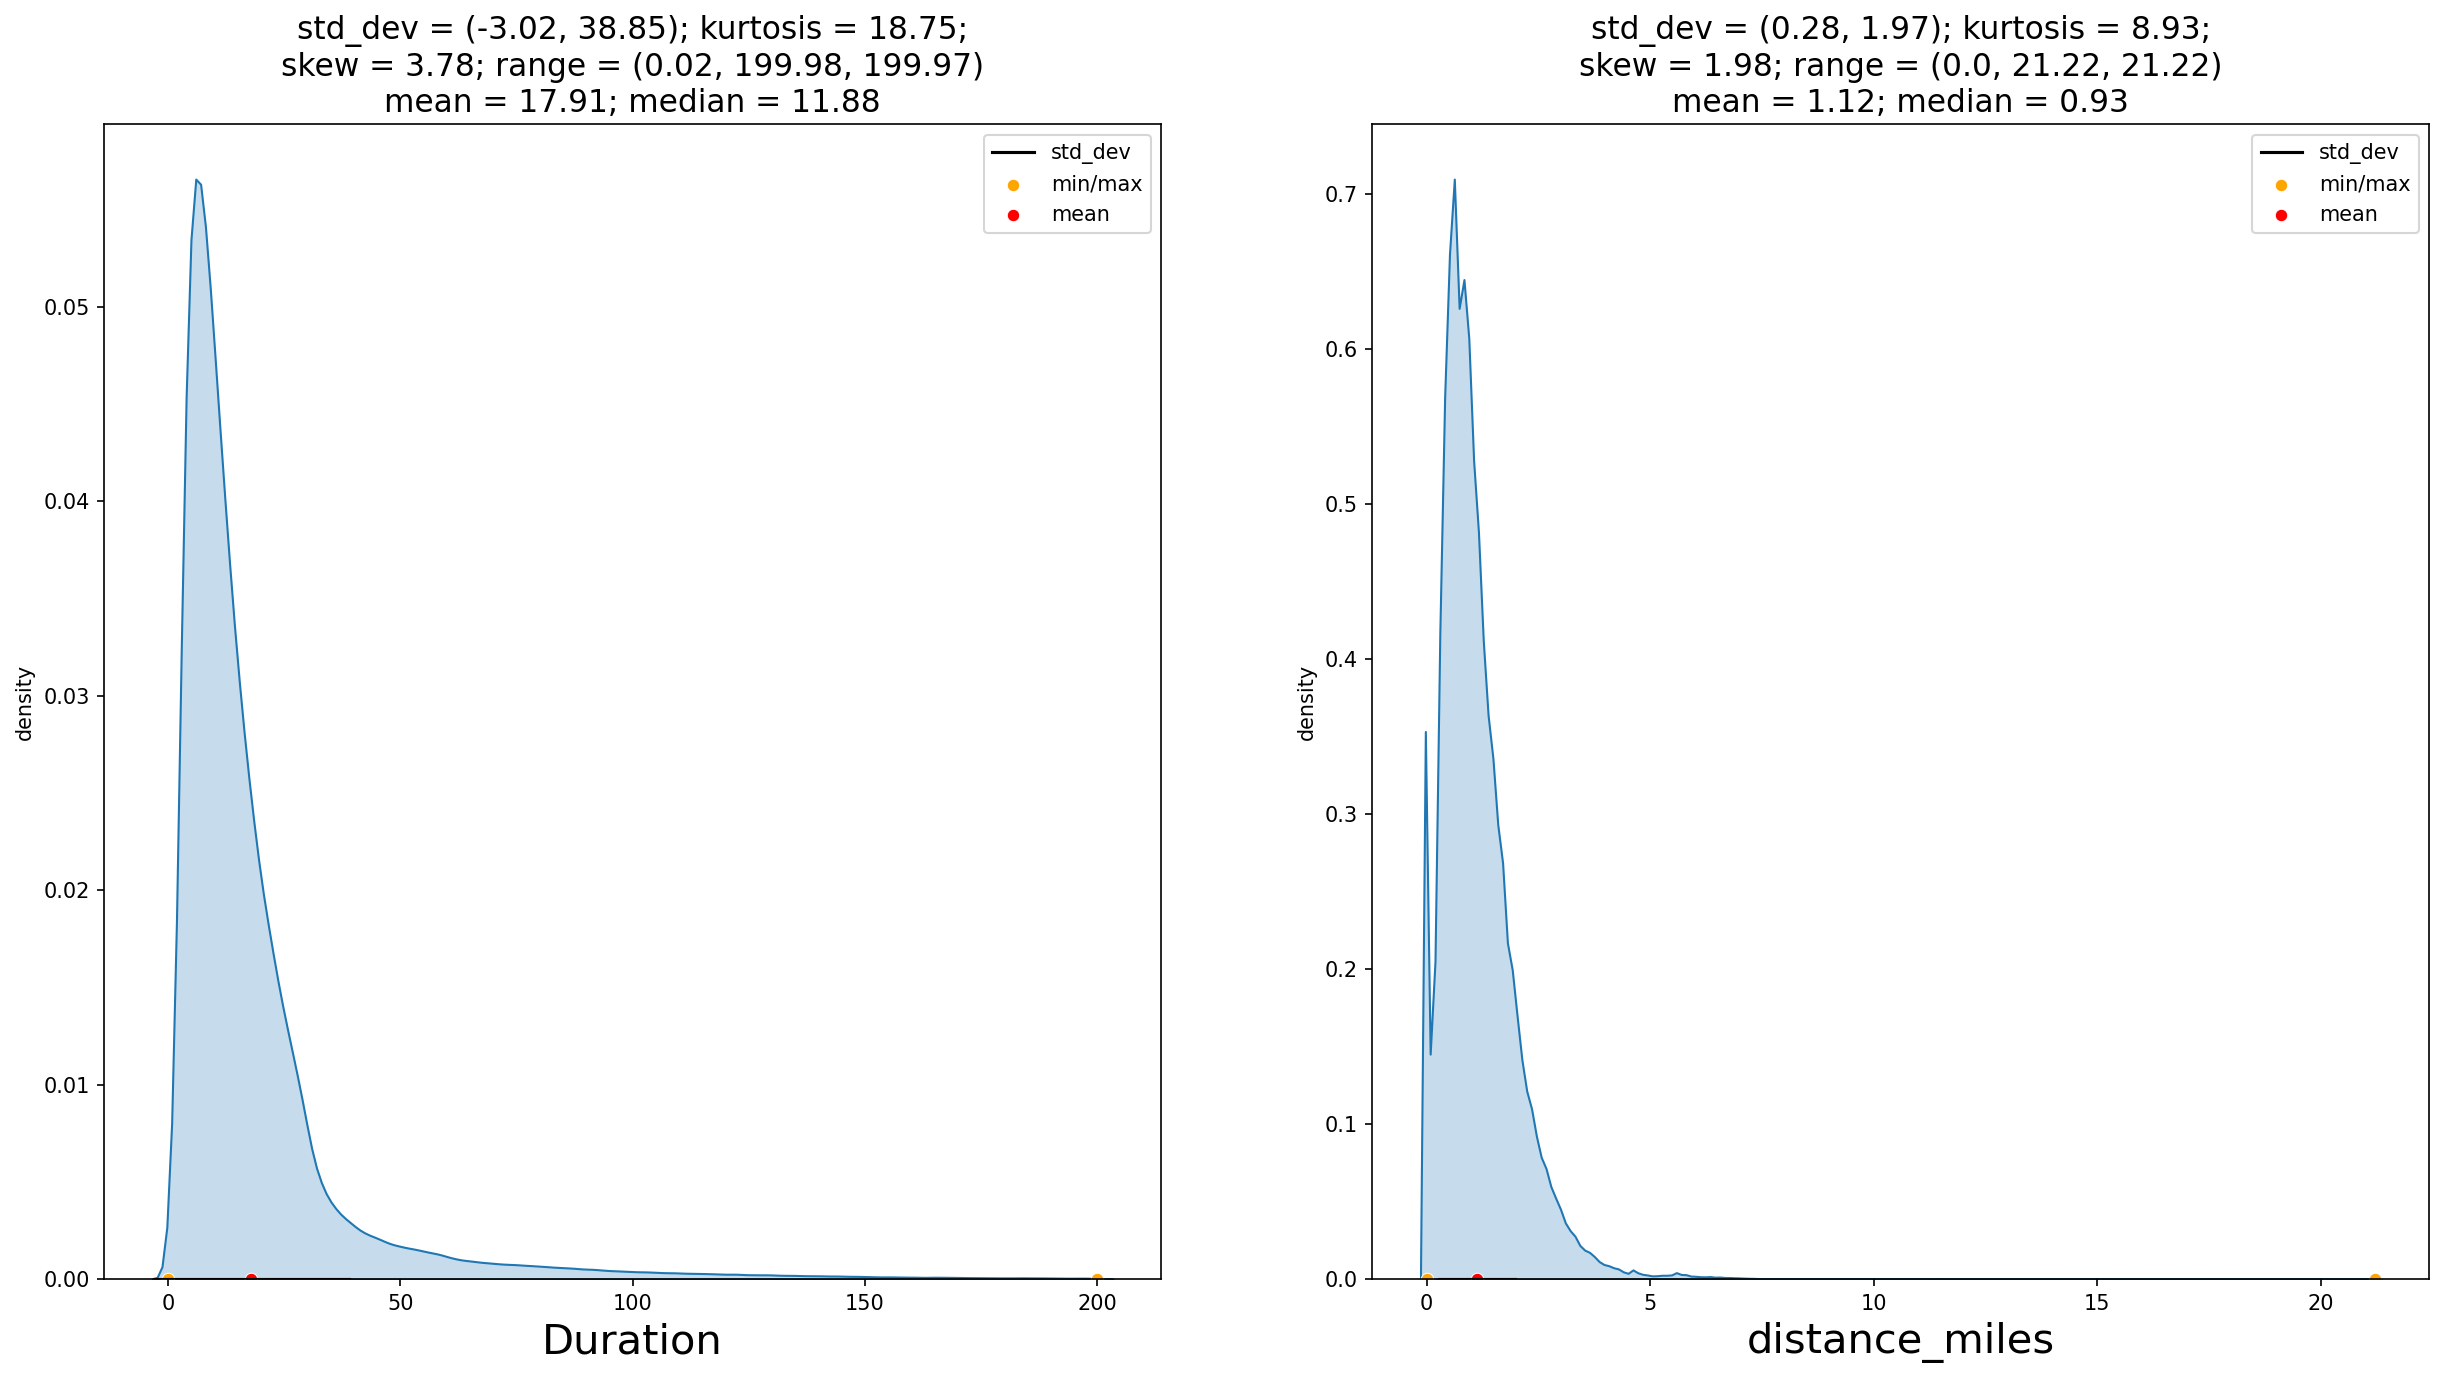

In [324]:
UVA_numeric(data,trip_details)

### pickup_dropoff_time

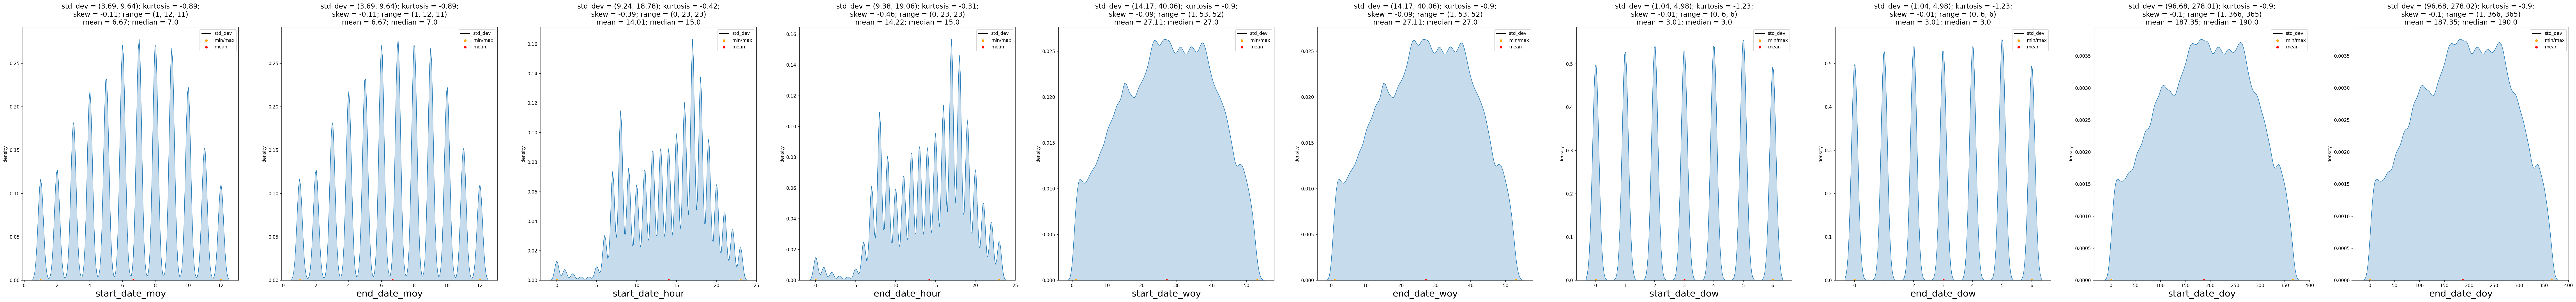

In [222]:
UVA_numeric(data,pickup_dropoff_time) 

In [45]:
#Taking into consideration the points mentioned about week of year, we shall make a new column for only year and confirm that only the year 2016 is present
data['pickup_datetime_year'] = data.pickup_datetime.dt.year
data['pickup_datetime_year'].describe()

count    729322.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: pickup_datetime_year, dtype: float64

**Therefore, max value proves that only the year 2016 is present and we can go ahead to change the week of year values of 53 to 1. We also shall not be needing this column, so it's better we delete it now.**

In [46]:
#dropping column pickup_datetime_year
data.drop('pickup_datetime_year', axis=1, inplace=True)
data.head()

id vendor_id     pickup_datetime    dropoff_datetime passenger_count  \
0  1080784         2 2016-02-29 16:40:21 2016-02-29 16:47:01               1   
1  0889885         1 2016-03-11 23:35:37 2016-03-11 23:53:57               2   
2  0857912         2 2016-02-21 17:59:33 2016-02-21 18:26:48               2   
3  3744273         2 2016-01-05 09:44:31 2016-01-05 10:03:32               6   
4  0232939         1 2016-02-17 06:42:23 2016-02-17 06:56:31               1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.953918        40.778873         -73.963875         40.771164   
1        -73.988312        40.731743         -73.994751         40.694931   
2        -73.997314        40.721458         -73.948029         40.774918   
3        -73.961670        40.759720         -73.956779         40.780628   
4        -74.017120        40.708469         -73.988182         40.740631   

  store_and_fwd_flag  ...  pickup_datetime_moy  pickup_datetime_hour  \
0                  N  ...                    2                    16   
1                  N  ...                    3                    23   
2                  N  ...                    2                    17   
3                  N  ...                    1                     9   
4                  N  ...                    2                     6   

   pickup_datetime_woy  pickup_datetime_dow  pickup_datetime_doy  \
0                    9                    0                   60   
1                   10                    4                   71   
2                    7                    6                   52   
3                    1                    1                    5   
4                    7                    2                   48   

   dropoff_datetime_moy  dropoff_datetime_hour  dropoff_datetime_woy  \
0                     2                     16                     9   
1                     3                     23                    10   
2                     2                     18                     7   
3                     1                     10                     1   
4                     2                      6                     7   

   dropoff_datetime_dow  dropoff_datetime_doy  
0                     0                    60  
1                     4                    71  
2                     6                    52  
3                     1                     5  
4                     2                    48  

[5 rows x 24 columns]

In [224]:
data.dtypes

Duration                       float64
Start.date              datetime64[ns]
End.date                datetime64[ns]
Start.station.number          category
Start.station                   object
End.station.number            category
End.station                     object
rideable_type                 category
Member.type                   category
start_lat                      float64
start_lng                      float64
end_lat                        float64
end_lng                        float64
distance_miles                 float64
start_date_moy                   int64
start_date_hour                  int64
start_date_woy                   int64
start_date_dow                   int64
start_date_doy                   int64
end_date_moy                     int64
end_date_hour                    int64
end_date_woy                     int64
end_date_dow                     int64
end_date_doy                     int64
dtype: object

In [325]:
#change the pickup_datetime_woy and dropoff_datetime_woy values of 53 to 1
#data.loc[(data.start_date_woy == 53),'start_date_dow'] 
data.loc[(data.start_date_woy == 53),'start_date_woy'] = 1
data.loc[(data.end_date_woy == 53),'end_date_woy'] = 1

In [326]:
#confirming that pickup_datetime_woy does not have values of 53 anymore
data[data.start_date_woy == 53]

Empty DataFrame
Columns: [Duration, Start.date, End.date, Start.station.number, Start.station, End.station.number, End.station, rideable_type, Member.type, start_lat, start_lng, end_lat, end_lng, distance_miles, start_date_moy, start_date_hour, start_date_woy, start_date_dow, start_date_doy, end_date_moy, end_date_hour, end_date_woy, end_date_dow, end_date_doy]
Index: []

[0 rows x 24 columns]

In [327]:
#confirming that dropoff_datetime_woy does not have values of 53 anymore
data[data.end_date_woy == 53]

Empty DataFrame
Columns: [Duration, Start.date, End.date, Start.station.number, Start.station, End.station.number, End.station, rideable_type, Member.type, start_lat, start_lng, end_lat, end_lng, distance_miles, start_date_moy, start_date_hour, start_date_woy, start_date_dow, start_date_doy, end_date_moy, end_date_hour, end_date_woy, end_date_dow, end_date_doy]
Index: []

[0 rows x 24 columns]

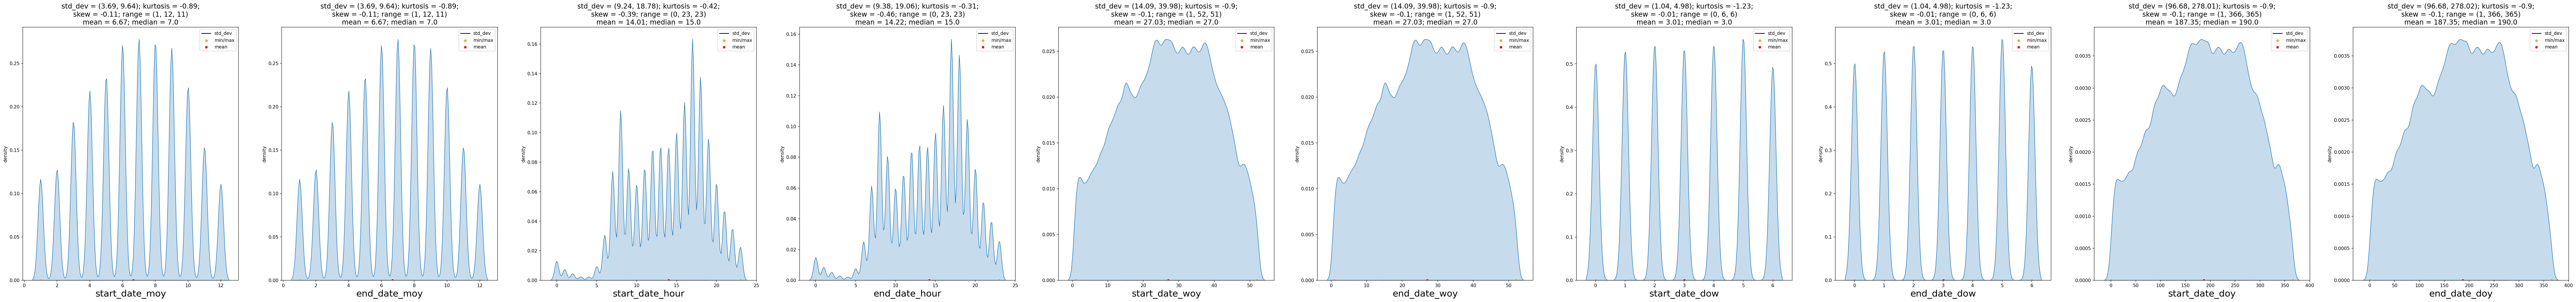

In [328]:
#Plotting the distributions again to see the effect of replacing incorrect values
UVA_numeric(data,pickup_dropoff_time) 

## Univariate Analysis : Categorical Variables

In [28]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

Start.date              datetime64[ns]
End.date                datetime64[ns]
Start.station.number          category
Start.station                   object
End.station.number            category
End.station                     object
rideable_type                 category
Member.type                   category
dtype: object

**The useful variables here are passenger_count, vendor_id and store_and_fwd_flag. Since they are singular and belong to different groups, we will not group them and use them as is, unlike the approach we applied for Numerical Variables.**

In [33]:
# Custom function for easy visualisation of Categorical Variables
def UVA_variable(data, var):

  '''
  Univariate_Analysis_categorical
  takes a categorical variable and plots/prints all the value_counts and a barplot.
  '''
  # setting figure_size
  size = len(var)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('Fraction/Percent', fontsize = 20)
    plt.ylabel('Bike Type', fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### Member Type

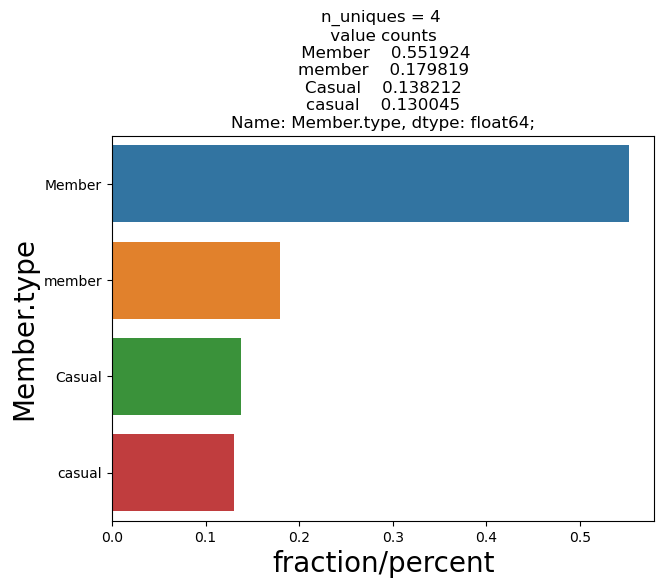

In [330]:
UVA_variable(data, ['Member.type'])

In [31]:
data['Member.type'] = data['Member.type'].str.lower()

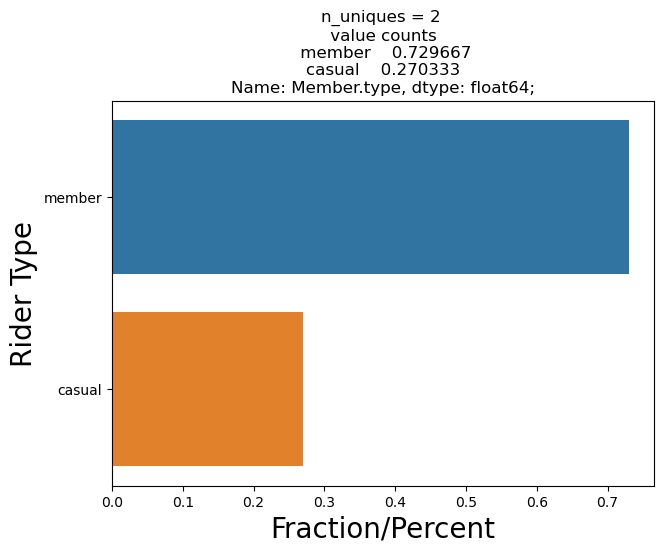

In [32]:
UVA_variable(data, ['Member.type'])

**Summary of passenger_count:**

*    **passenger_count**:
    *    Median Number of Passengers in a Taxi = 1
    *    **Most taxis, roughly 85%, carry 1-2 passengers**
    *    **skewness must be positive**, as passenger_count is **significantly biased towards lesser number of passengers** and this seems logical too
    *    **kurtosis must be high too**; The distribution, thus, is leptokurtic. In essence, extreme values and Outliers are very likely to be present in passenger_count, as seen by values greater than 6. 


**Things to Investigate Further down the road:**
*    Removal of the extreme values and Outliers, as can be seen in the range of the distribution (0 minimum - 9 maximum). passenger_count values that are 0,7, and 9 can be dropped because their counts compared to the rest in the dataset is very trivial.
*    As per the NYC.gov website, the maximum amount of passengers allowed in a yellow taxicab by law is four in a four passenger taxicab or five passengers in a five passenger taxicab, except that an additional passenger must be accepted if such a passenger is under the age of seven and is held on the lap of an adult passenger seated in the rear. 
*   Therefore, we can assume that **6 passengers, at maximum, can ride in a NYC taxi i.e. 5 adults + 1 minor.**
*   ***Keeping the above point in mind, we can move ahead to remove these Outliers of passenger_count and visualize these plots again to gain a better understanding of the distribution of passenger_count. This will be seen in the section named Univariate Analyis: Outliers***

### vendor_id

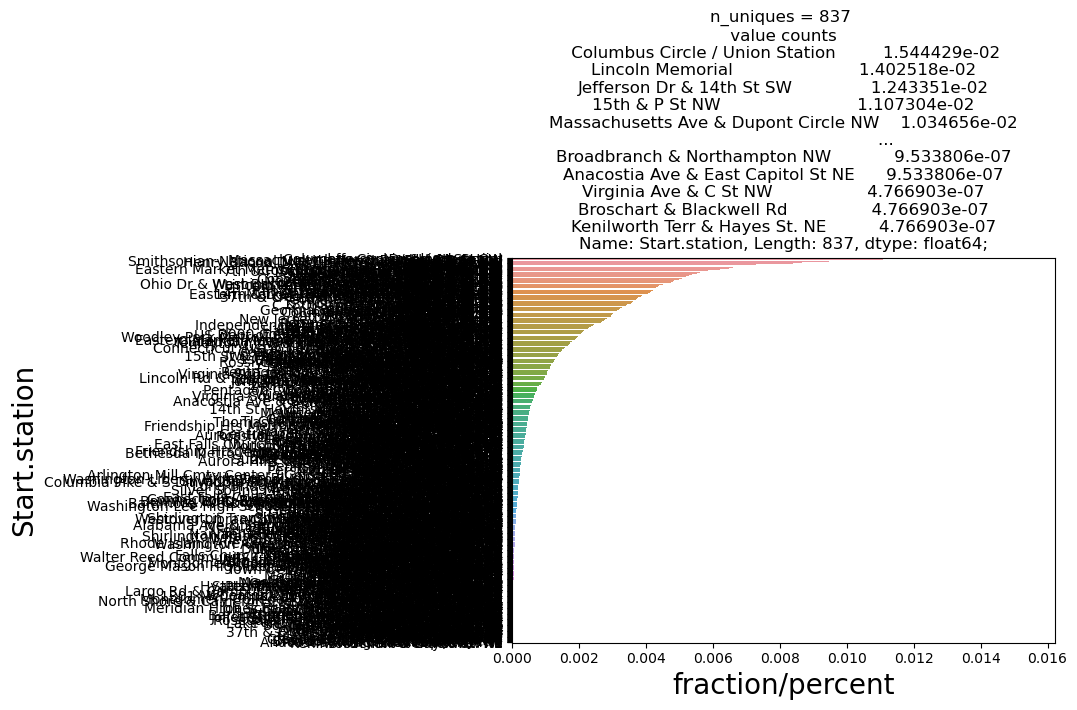

In [333]:
UVA_variable(data, ['Start.station'])

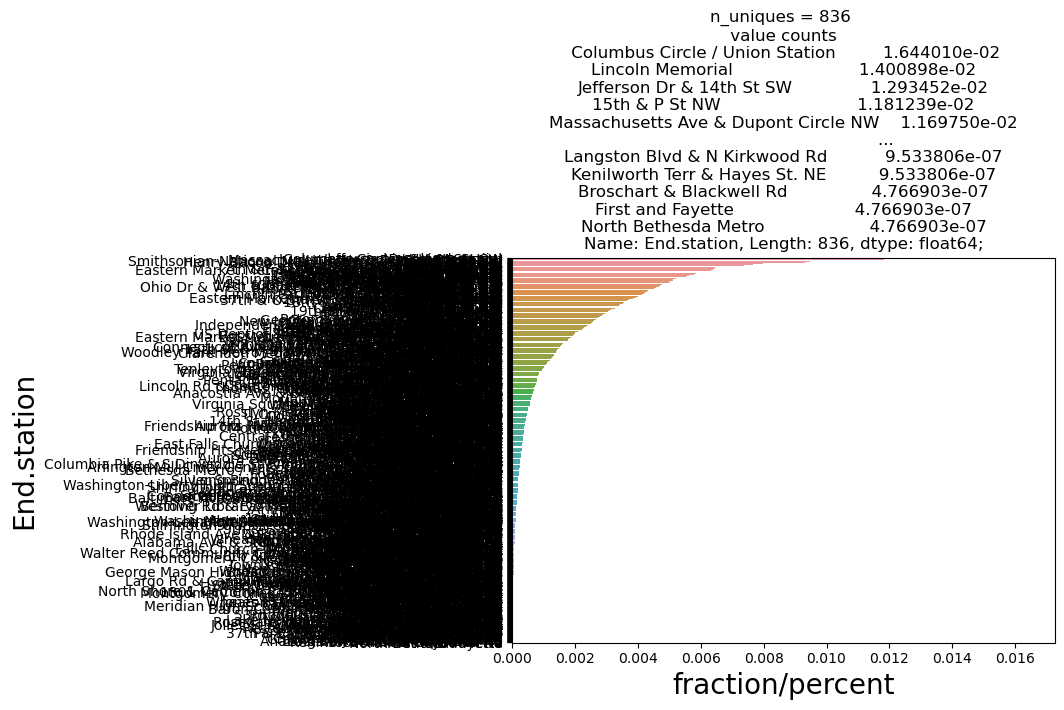

In [334]:
UVA_variable(data, ['End.station'])

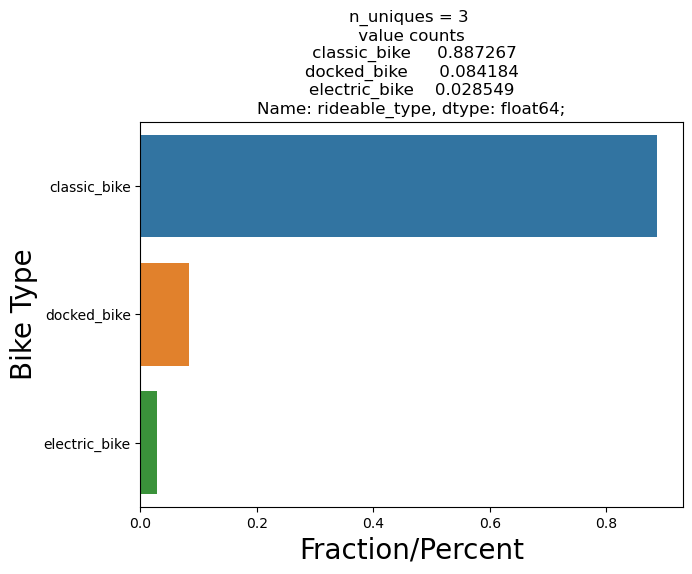

In [34]:
UVA_variable(data, ['rideable_type'])

**Summary**

* vendor_id:
  *  About 53.5% of vendors belong to vendor 2 and the rest to vendor 1.

**Things to investigate further down:**
* Relation between vendor_id with distance travelled, trip duration, variables in pickup_time group, and passenger counts for taxis of both vendors

## Univariate Analysis: Outliers 

In [336]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it 

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables
  include_outlier : {bool} whether to include outliers or not, default = True
  '''

  size = len(var_group)
  plt.figure(figsize = (10*size,8), dpi = 200)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nOutlier (low/high) = {} \n'.format((outlier_low,outlier_high)))
                                                                                                   
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      quant25 = data2[i].quantile(0.25)
      quant75 = data2[i].quantile(0.75)
      IQR = quant75 - quant25
      med = data2[i].median()
      whis_low = med-(1.5*IQR)
      whis_high = med+(1.5*IQR)
      outlier_high = len(data2[i][data2[i]>whis_high])
      outlier_low = len(data2[i][data2[i]<whis_low])
    
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n'.format(round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2))
                                                                                                   ))

### passenger_count

True


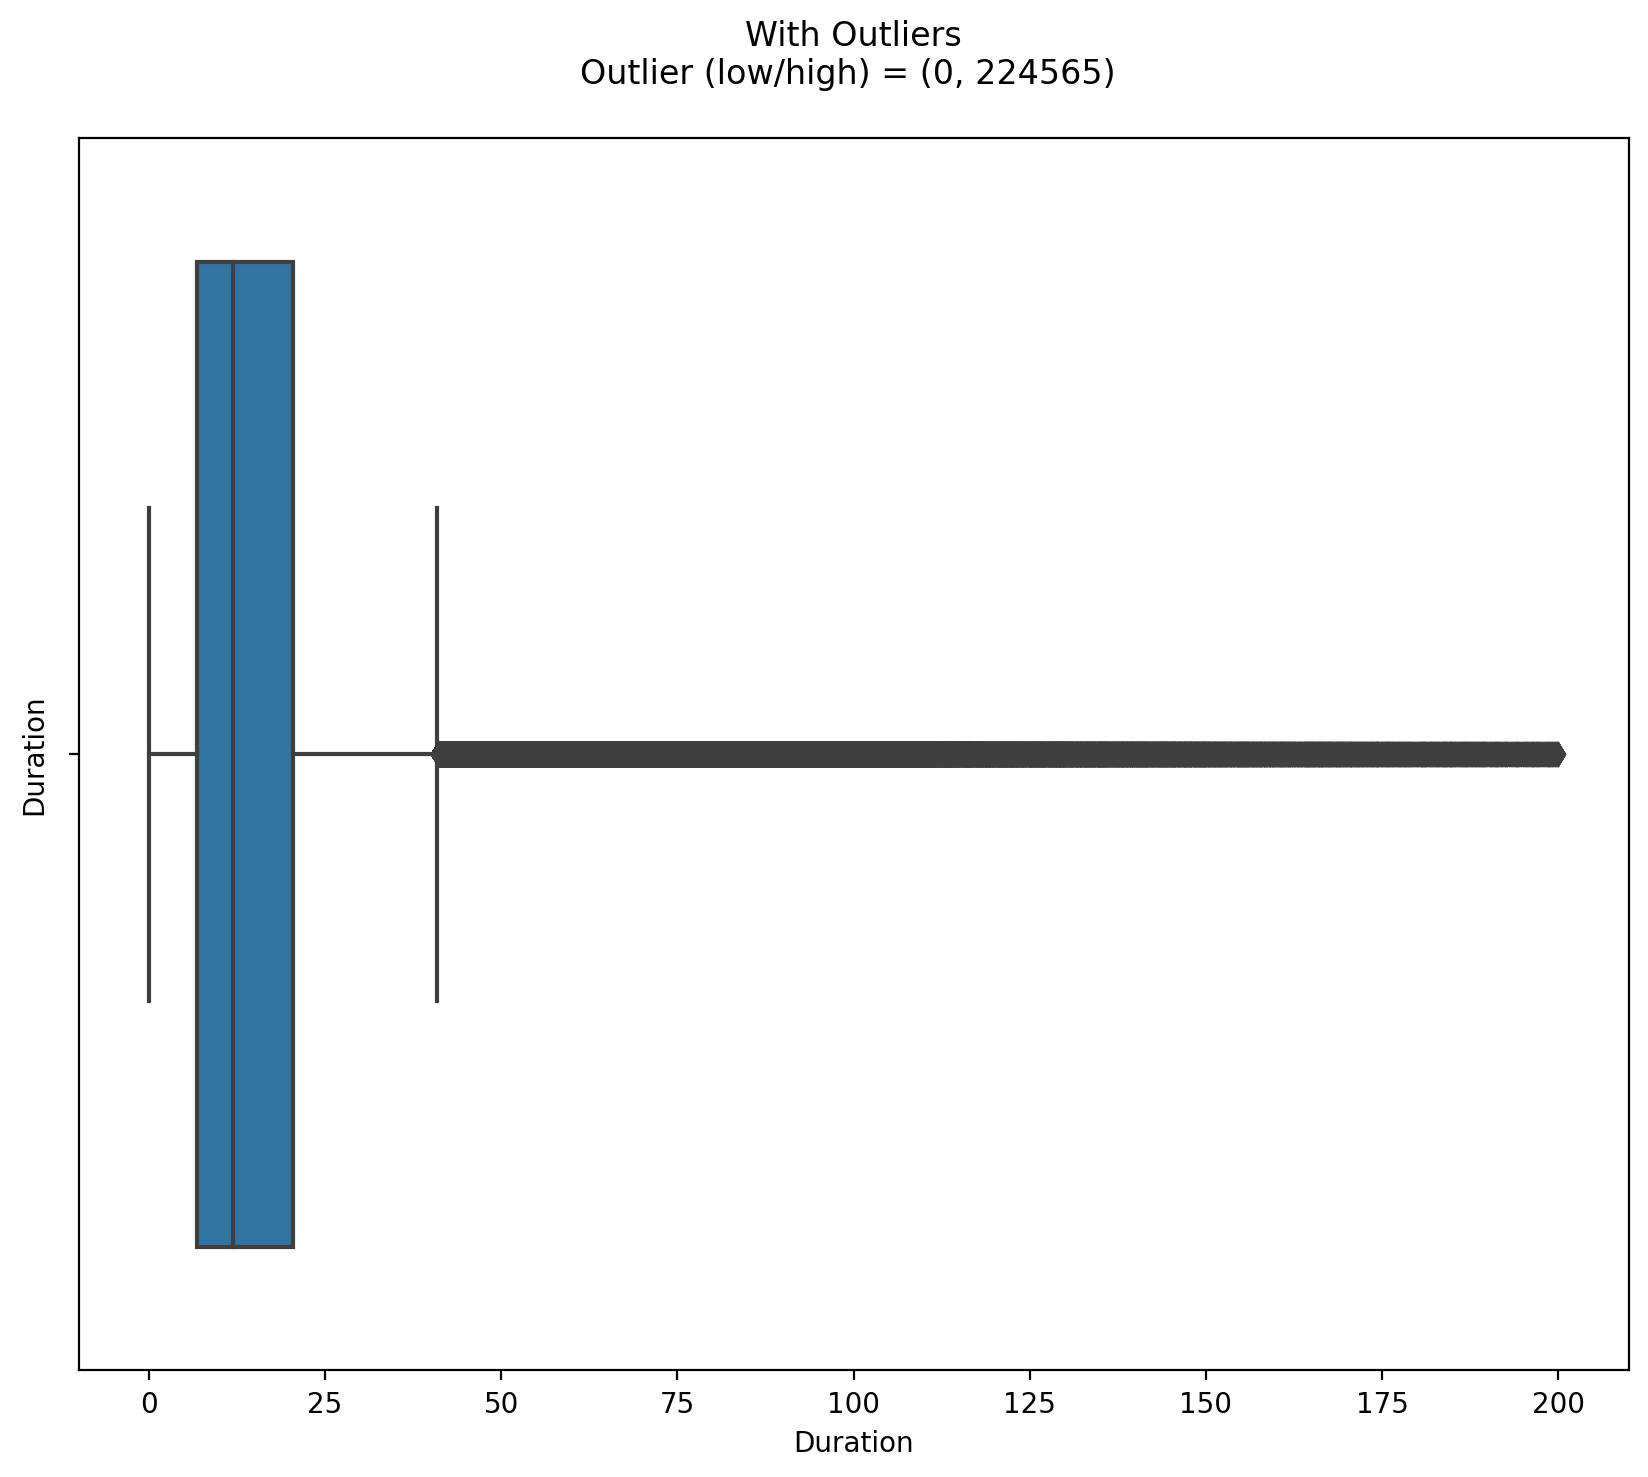

In [337]:
#changing passenger_count to integer datatype only for this section to work with the function 
#data['trip_duration_minutes'] = data['passenger_count'].astype('int64')
UVA_outlier(data, ['Duration'],) 

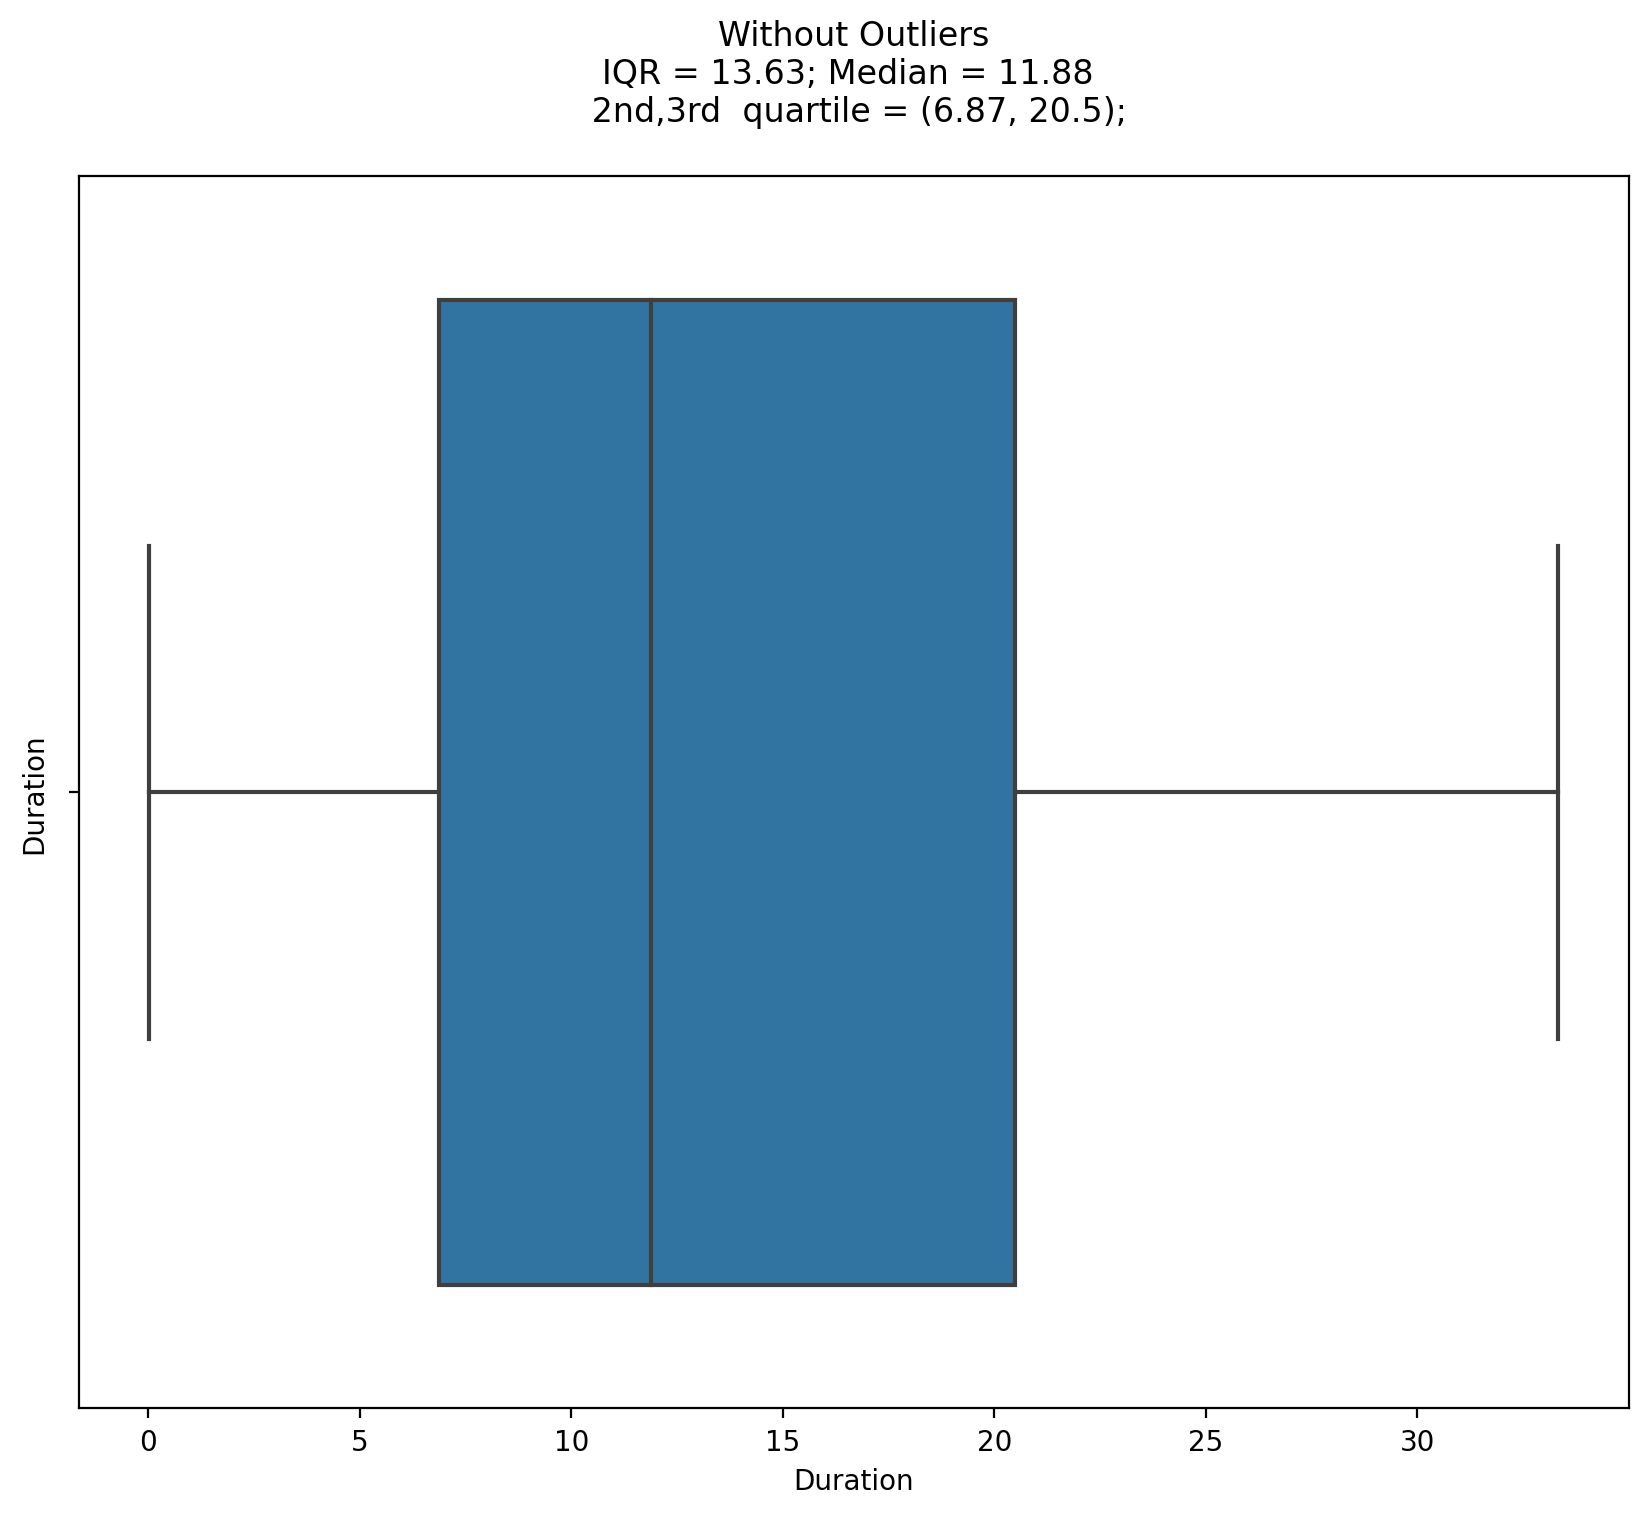

In [338]:
UVA_outlier(data, ['Duration'], include_outlier=False)

In [61]:
#revert back to categorical
data['passenger_count'] = data['passenger_count'].astype('category')

### pickup_dropoff_location

True
True
True
True


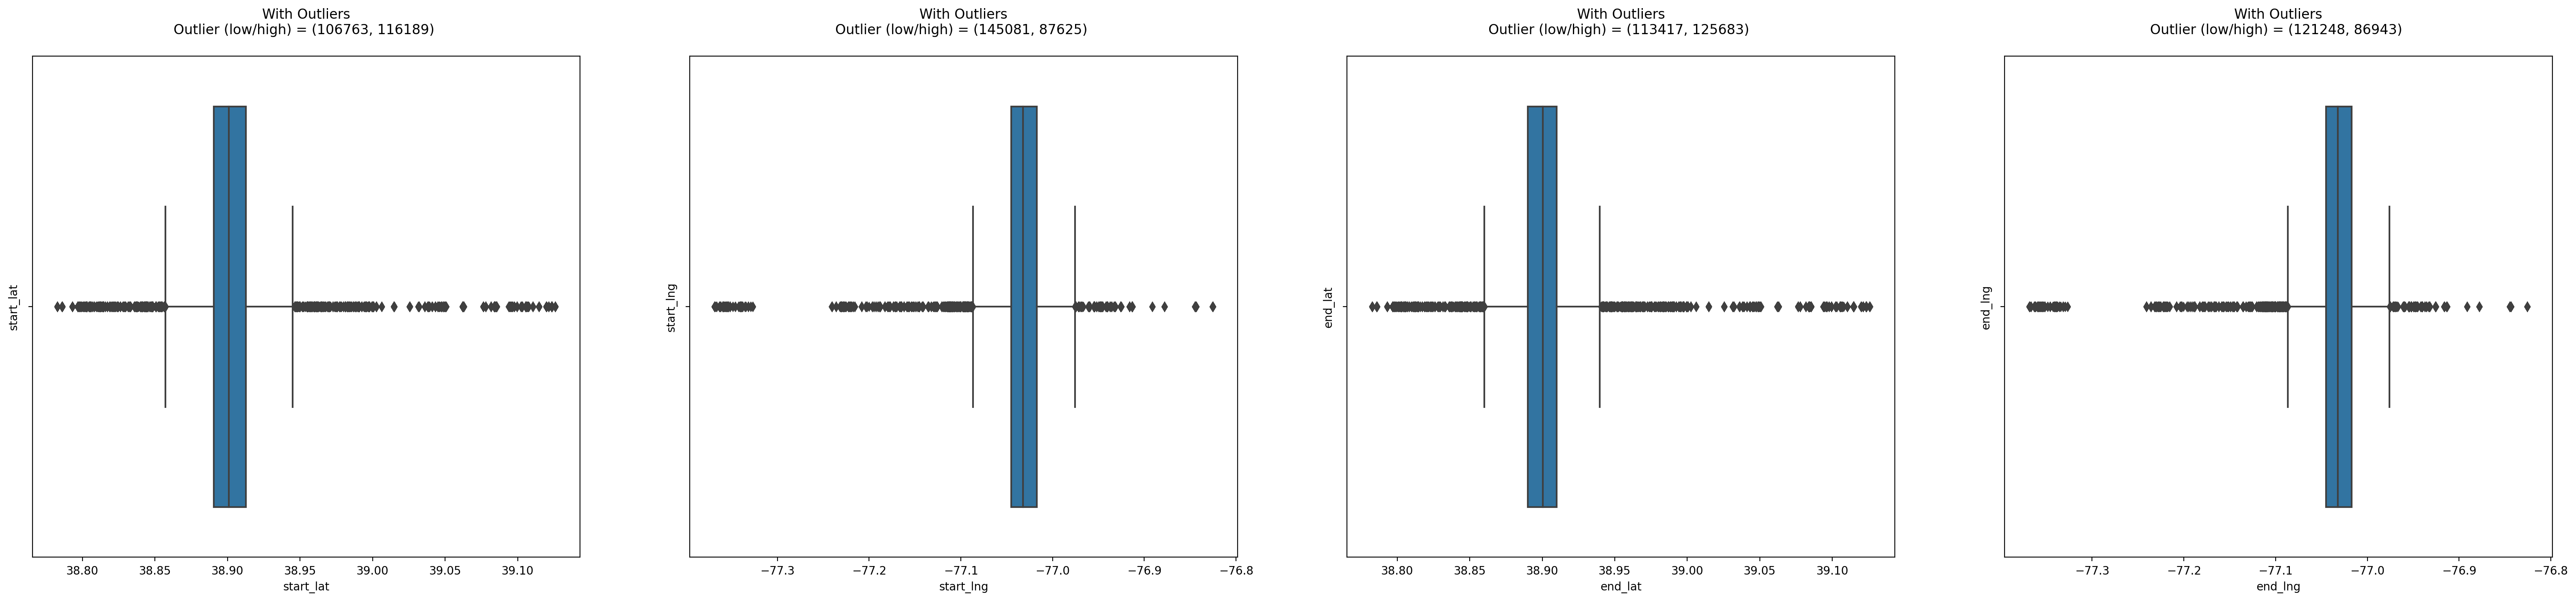

In [339]:
UVA_outlier(data, pickup_dropoff_location,)

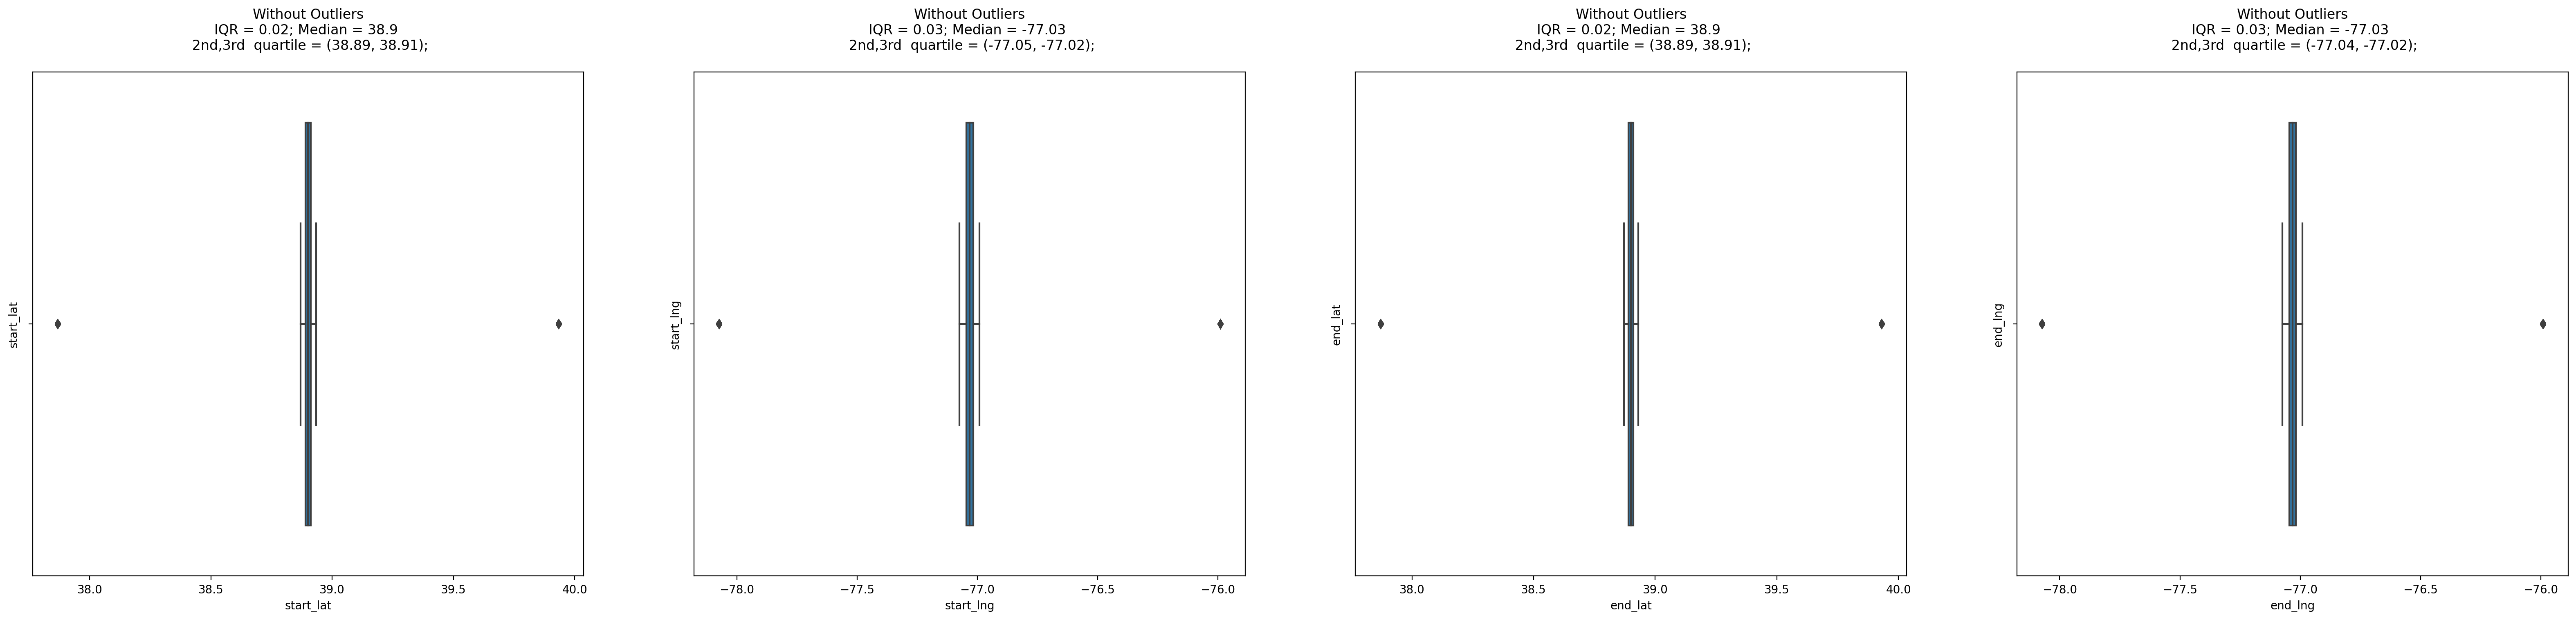

In [340]:
UVA_outlier(data, pickup_dropoff_location, include_outlier=False)

 ### trip_details

True
True


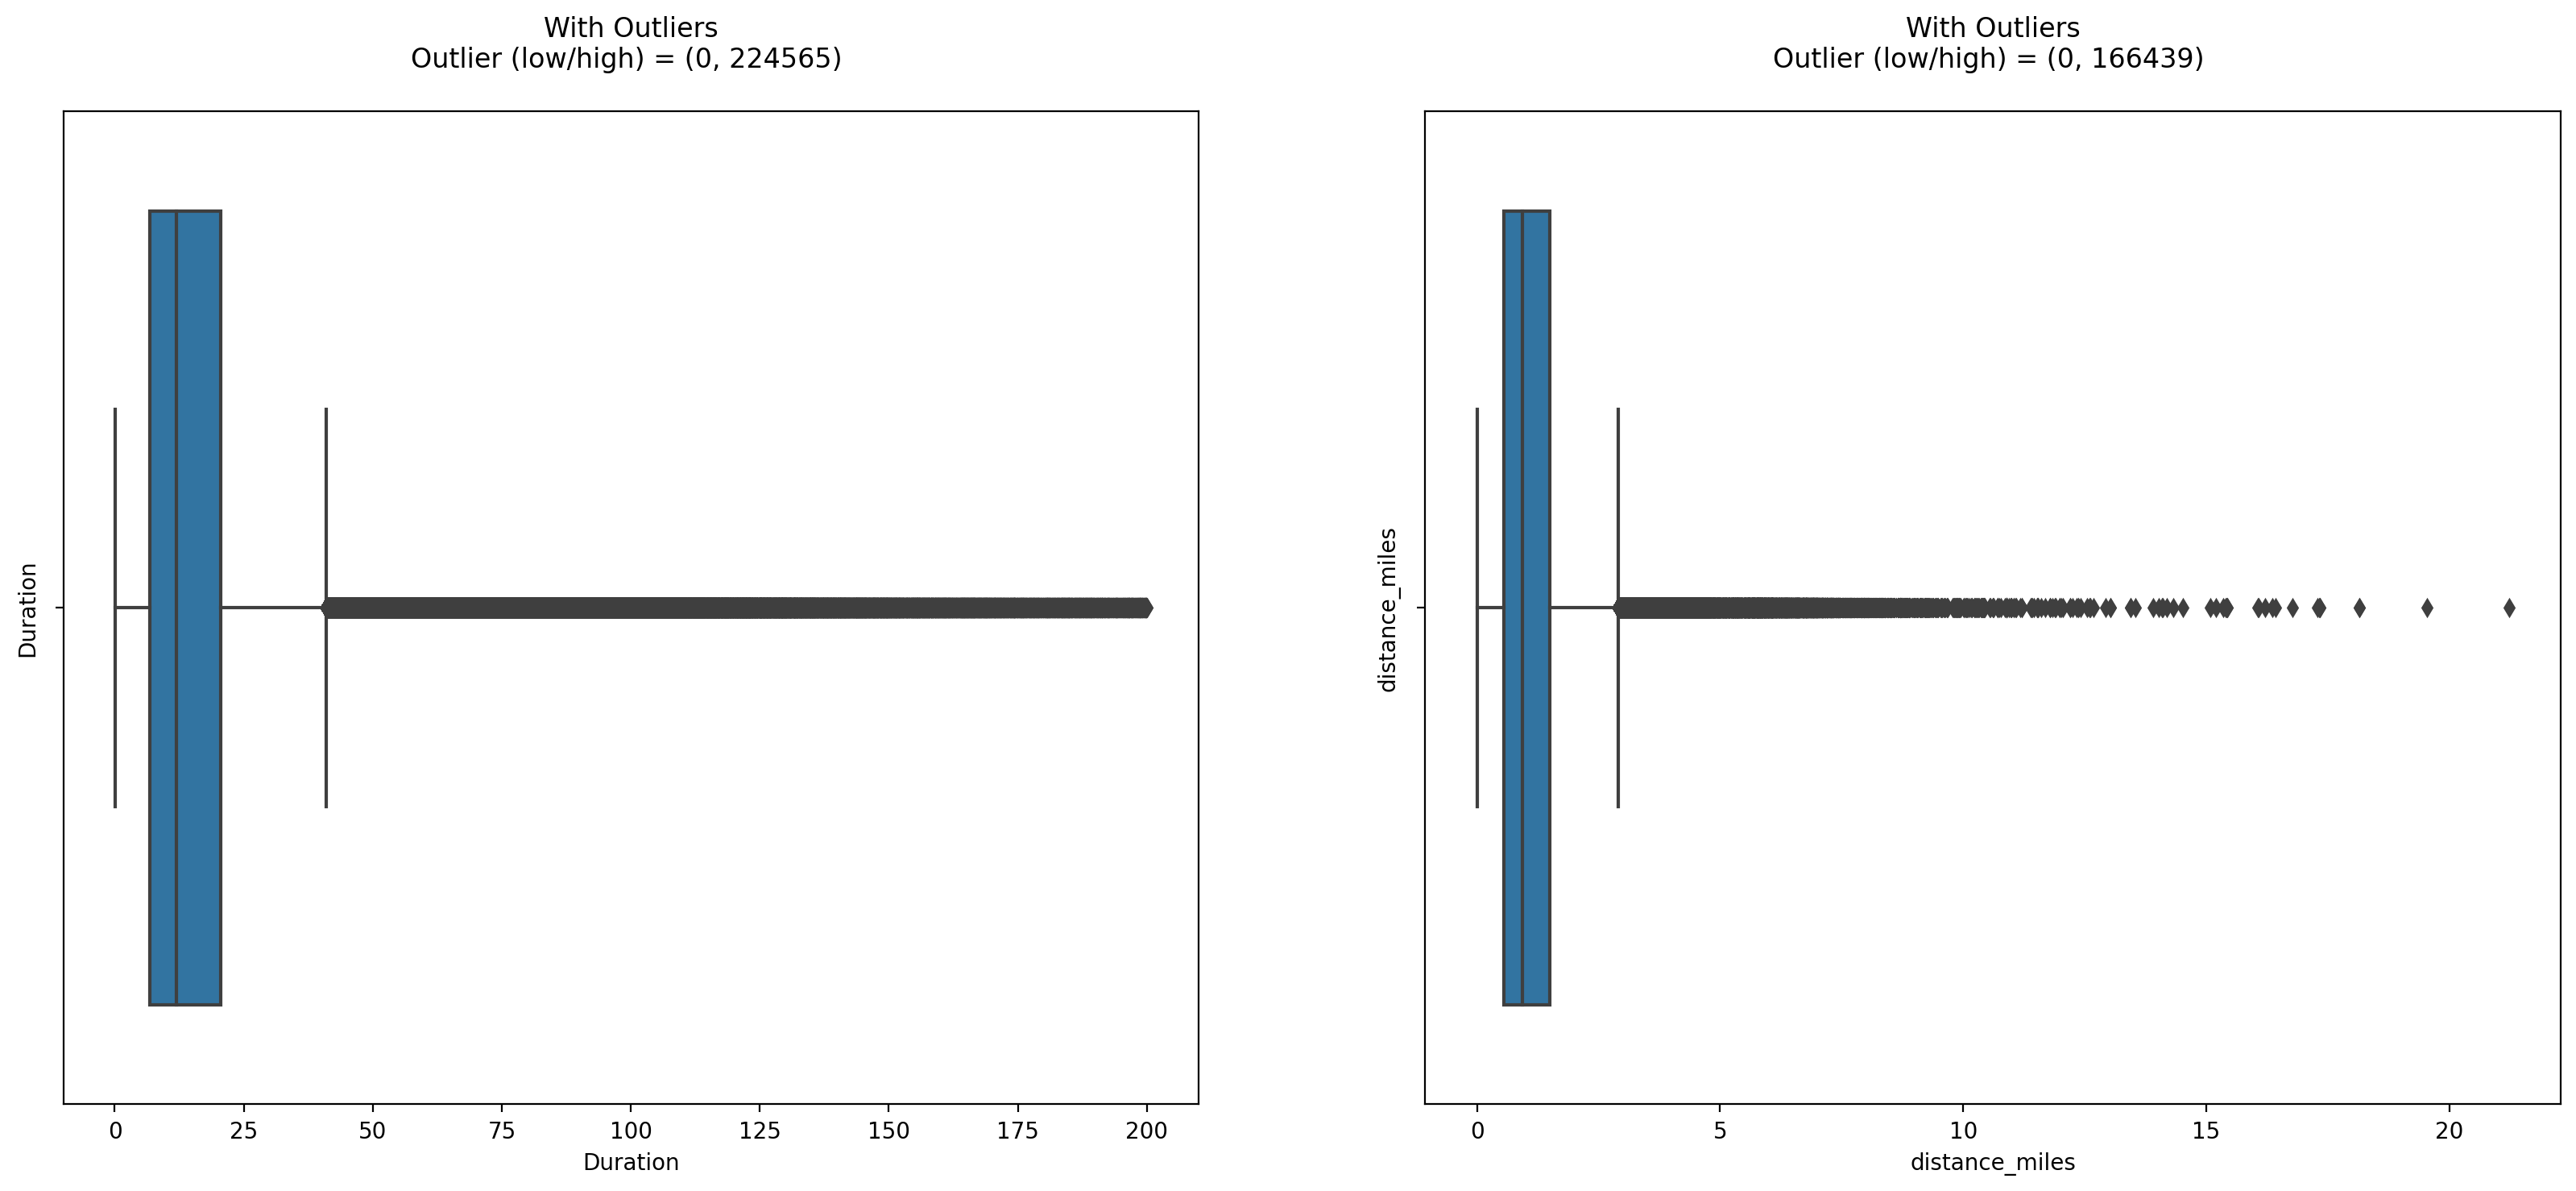

In [341]:
UVA_outlier(data, trip_details,)

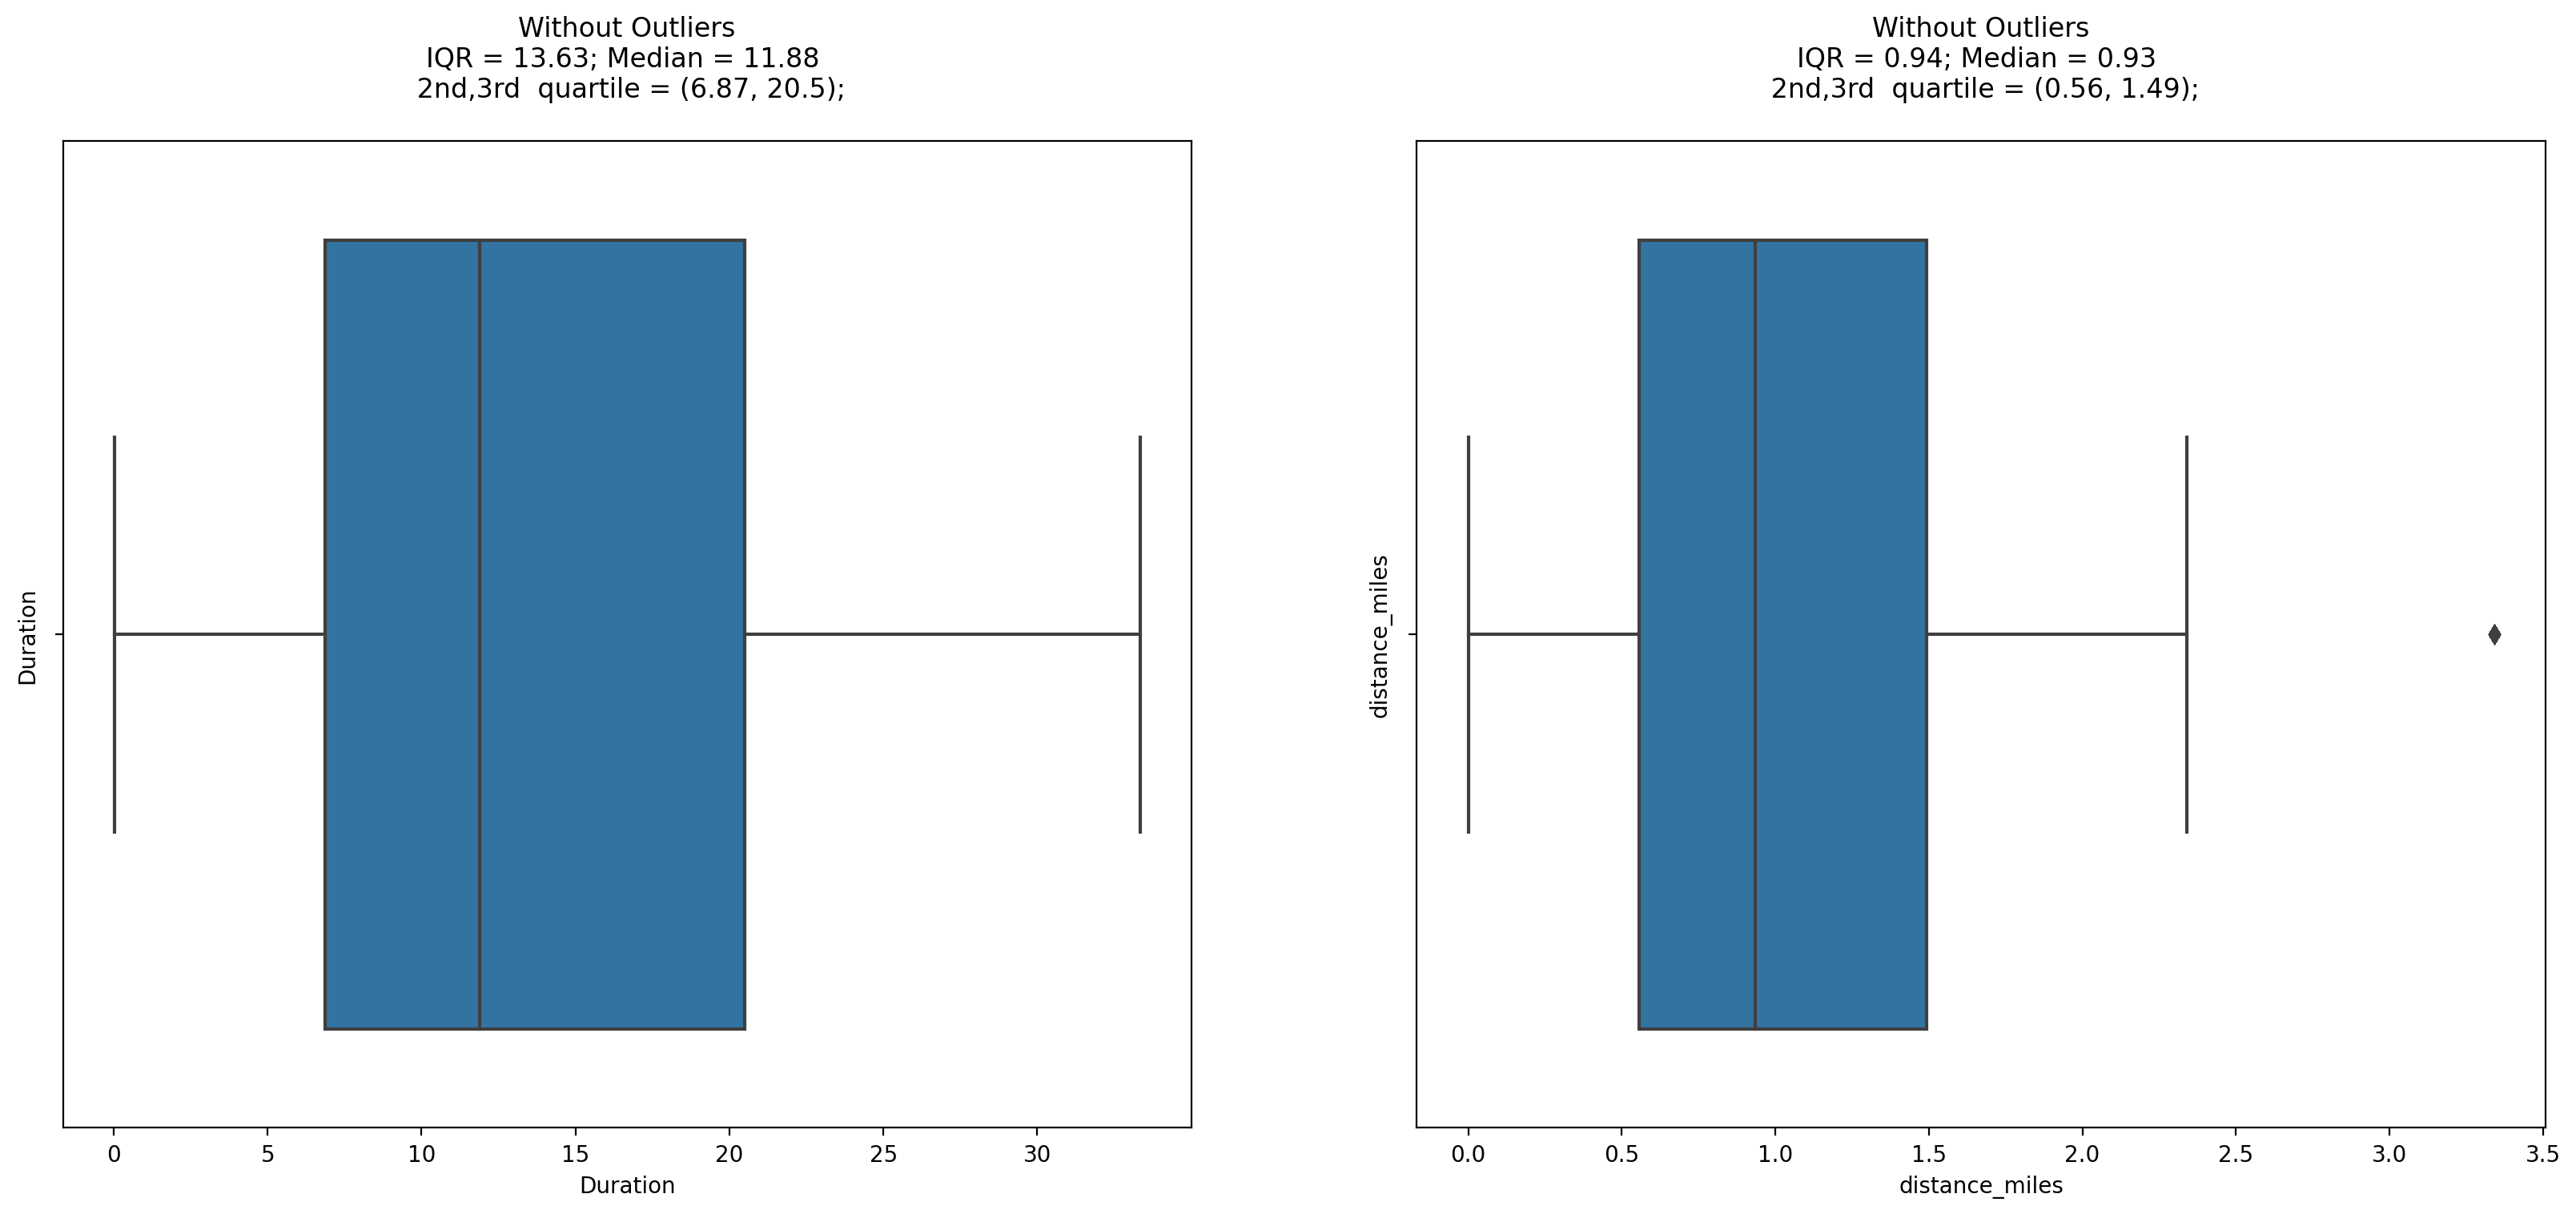

In [342]:
UVA_outlier(data, trip_details, include_outlier=False) 

### pickup_dropoff_time

True
True
True
True
True
True
True
True
True
True


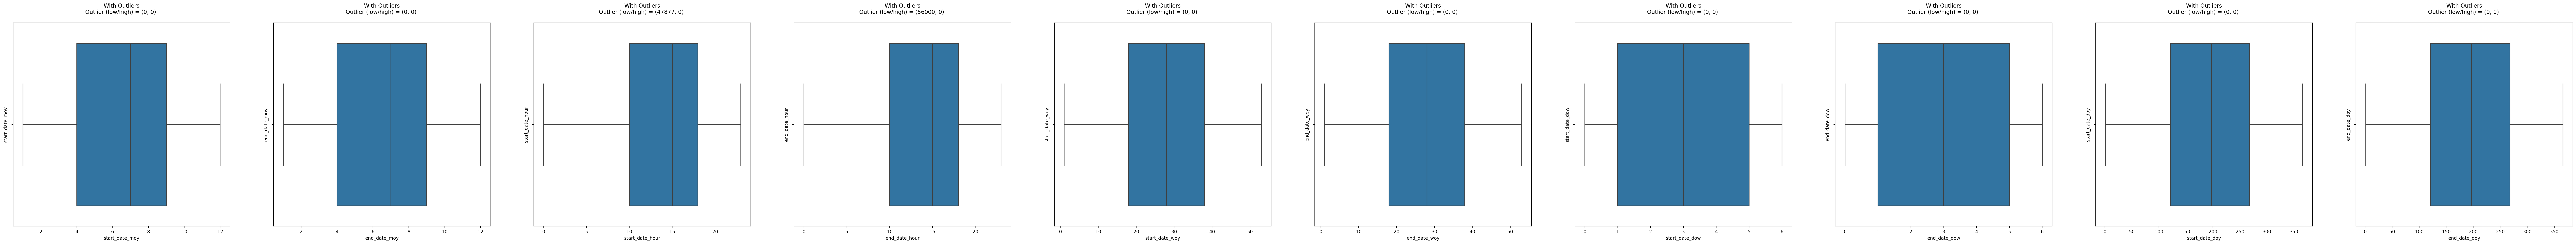

In [97]:
UVA_outlier(data, pickup_dropoff_time,)

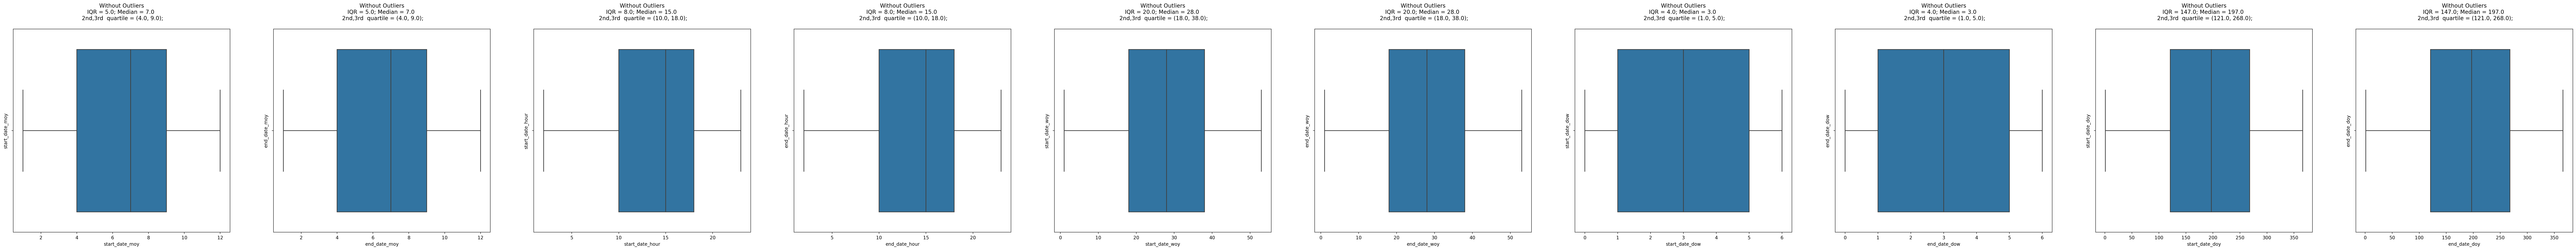

In [98]:
UVA_outlier(data, pickup_dropoff_time, include_outlier=False) 

## Bivariate Analysis : Numerical-Numerical

In [343]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
#numerical = numerical.drop(['Duration', 'distance_km'], axis=1)
numerical.dtypes

Duration           float64
start_lat          float64
start_lng          float64
end_lat            float64
end_lng            float64
distance_miles     float64
start_date_moy       int64
start_date_hour      int64
start_date_woy       int64
start_date_dow       int64
start_date_doy       int64
end_date_moy         int64
end_date_hour        int64
end_date_woy         int64
end_date_dow         int64
end_date_doy         int64
dtype: object

In [344]:
# calculating correlation
correlation = numerical.corr()
correlation

Duration  start_lat  start_lng   end_lat   end_lng  \
Duration         1.000000  -0.074174  -0.050659 -0.082755 -0.042482   
start_lat       -0.074174   1.000000  -0.132895  0.844107 -0.122773   
start_lng       -0.050659  -0.132895   1.000000 -0.117982  0.825733   
end_lat         -0.082755   0.844107  -0.117982  1.000000 -0.127946   
end_lng         -0.042482  -0.122773   0.825733 -0.127946  1.000000   
distance_miles   0.217675   0.056859  -0.034881 -0.019604 -0.001531   
start_date_moy  -0.001253  -0.000671  -0.002771 -0.000056 -0.002838   
start_date_hour  0.032947  -0.037819  -0.025968  0.033858  0.032544   
start_date_woy  -0.002679  -0.000482  -0.003393  0.000410 -0.003342   
start_date_dow   0.113324  -0.010018   0.003349 -0.014590  0.000870   
start_date_doy  -0.001101  -0.000720  -0.002879 -0.000050 -0.002919   
end_date_moy    -0.001228  -0.000668  -0.002781 -0.000048 -0.002838   
end_date_hour    0.081546  -0.041434  -0.028648  0.027151  0.028759   
end_date_woy    -0.002645  -0.000483  -0.003392  0.000412 -0.003340   
end_date_dow     0.113201  -0.009914   0.003327 -0.014472  0.000910   
end_date_doy    -0.001065  -0.000723  -0.002883 -0.000046 -0.002916   

                 distance_miles  start_date_moy  start_date_hour  \
Duration               0.217675       -0.001253         0.032947   
start_lat              0.056859       -0.000671        -0.037819   
start_lng             -0.034881       -0.002771        -0.025968   
end_lat               -0.019604       -0.000056         0.033858   
end_lng               -0.001531       -0.002838         0.032544   
distance_miles         1.000000        0.002949        -0.048677   
start_date_moy         0.002949        1.000000        -0.007260   
start_date_hour       -0.048677       -0.007260         1.000000   
start_date_woy         0.003321        0.982234        -0.007086   
start_date_dow        -0.000552        0.001192        -0.006313   
start_date_doy         0.003090        0.995297        -0.007573   
end_date_moy           0.002955        0.999959        -0.007238   
end_date_hour         -0.034903       -0.008402         0.952537   
end_date_woy           0.003334        0.982238        -0.007045   
end_date_dow          -0.000413        0.001200        -0.005566   
end_date_doy           0.003098        0.995258        -0.007538   

                 start_date_woy  start_date_dow  start_date_doy  end_date_moy  \
Duration              -0.002679        0.113324       -0.001101     -0.001228   
start_lat             -0.000482       -0.010018       -0.000720     -0.000668   
start_lng             -0.003393        0.003349       -0.002879     -0.002781   
end_lat                0.000410       -0.014590       -0.000050     -0.000048   
end_lng               -0.003342        0.000870       -0.002919     -0.002838   
distance_miles         0.003321       -0.000552        0.003090      0.002955   
start_date_moy         0.982234        0.001192        0.995297      0.999959   
start_date_hour       -0.007086       -0.006313       -0.007573     -0.007238   
start_date_woy         1.000000       -0.012170        0.985810      0.982230   
start_date_dow        -0.012170        1.000000        0.001175      0.001201   
start_date_doy         0.985810        0.001175        1.000000      0.995258   
end_date_moy           0.982230        0.001201        0.995258      1.000000   
end_date_hour         -0.008241       -0.002577       -0.008646     -0.008438   
end_date_woy           0.999980       -0.012137        0.985814      0.982234   
end_date_dow          -0.012123        0.997686        0.001195      0.001201   
end_date_doy           0.985806        0.001187        0.999957      0.995297   

                 end_date_hour  end_date_woy  end_date_dow  end_date_doy  
Duration              0.081546     -0.002645      0.113201     -0.001065  
start_lat            -0.041434     -0.000483     -0.009914     -0.000723  
start_lng            -0.028648     -0.003392     

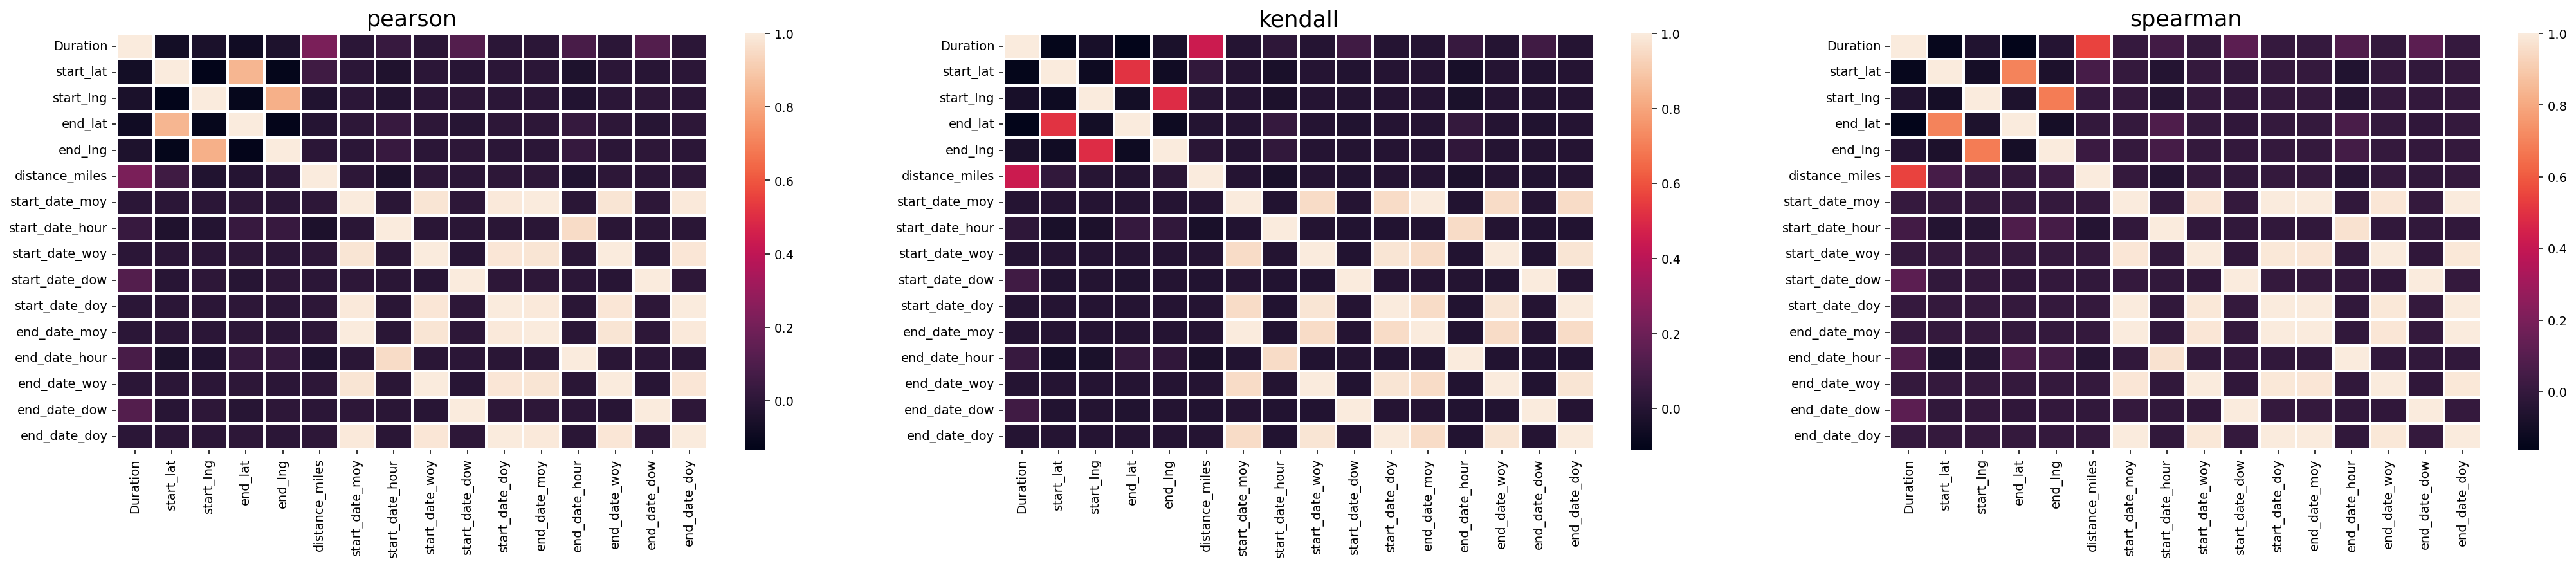

In [345]:
# plotting heatmap using Pearson Coeff, Kendall's Tau, and Spearman Coeff for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

* The Spearman correlation seems to have higher correlation values in same areas of the heatmap where they are less in the Pearson and Kendall correlations. 
*  Too many variables with insignificant correlation.
*  Major correlation lies between distance and trip duration variables, expectedly. **Hence, with these results, it would be more interesting to analyze correlations of numerical with categorical data.**

### Scatterplot


In [346]:
# Grouping variables
pickup_dropoff_location = ['start_lat','start_lng','end_lat','end_lng']
trip_details = ['Duration', 'distance_miles']
pickup_dropoff_time = ['start_date_moy', 'end_date_moy', 'start_date_hour', 'end_date_hour', 'start_date_woy', 'end_date_woy', 'start_date_dow', 'end_date_dow', 'start_date_doy', 'end_date_doy']

<Figure size 896x672 with 0 Axes>

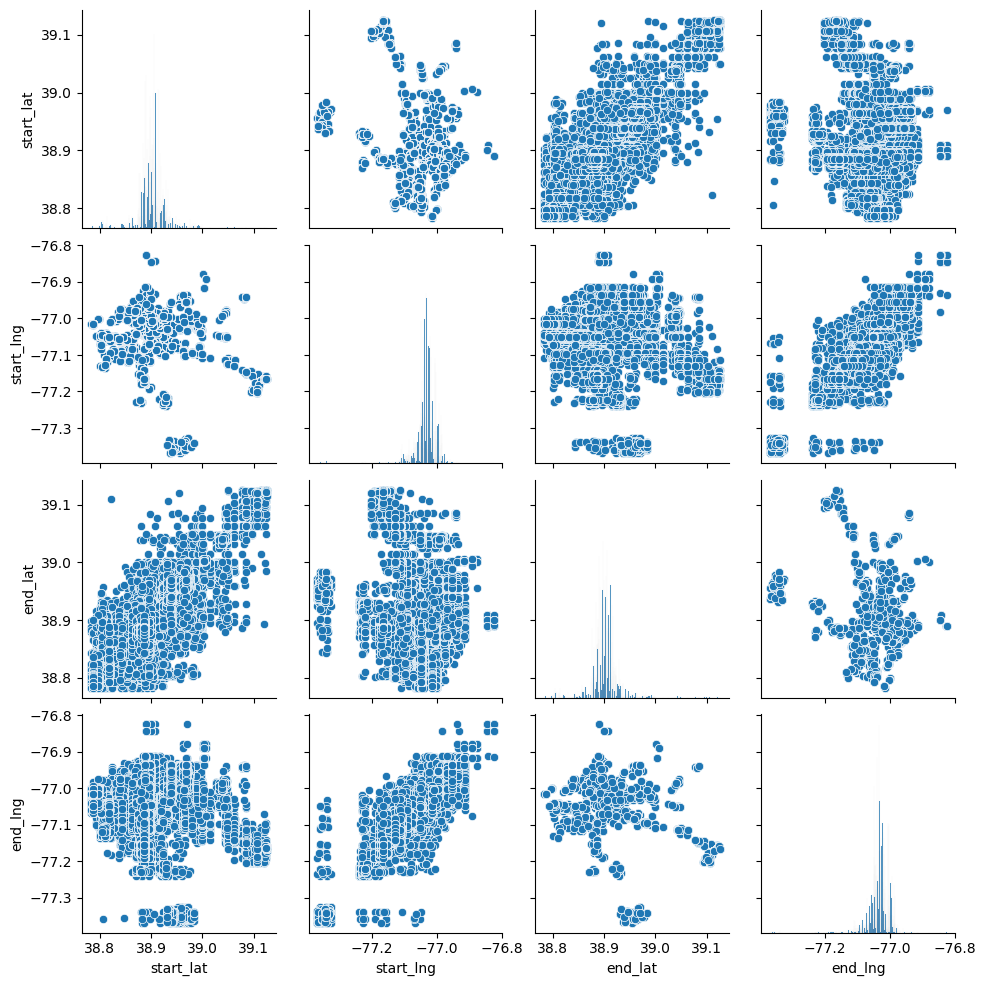

In [347]:
# scatter plot for pickup_dropoff_location variables
plt.figure(dpi=140)
sns.pairplot(numerical[pickup_dropoff_location])

**The scatter plot is is not meaningful due to the presence of outliers**

In [107]:
#taking log of every value and dividing by 100,000 to negate outliers
var = []
var.extend(pickup_dropoff_location)
var.extend(trip_details)
var.extend(pickup_dropoff_time)
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x)/100000)

<Figure size 896x672 with 0 Axes>

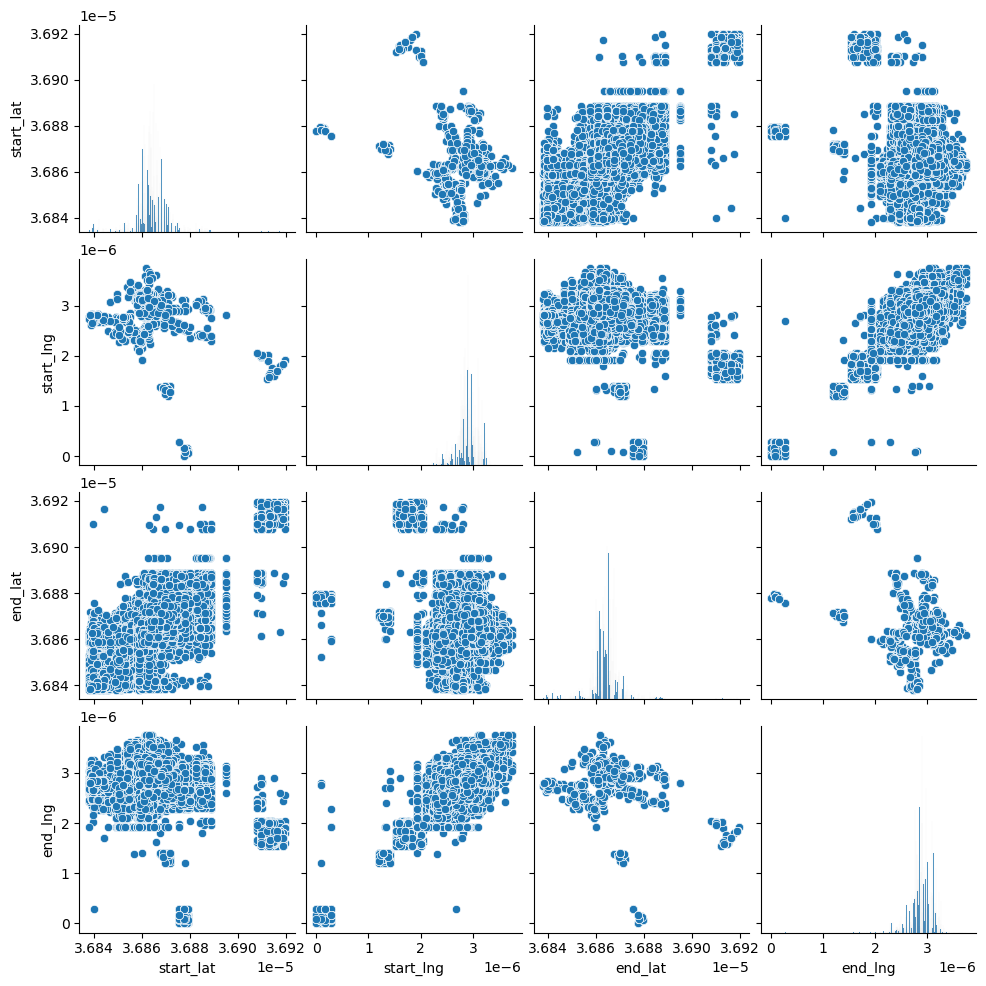

In [108]:
# scatter plot for pickup_dropoff_location variables
plt.figure(dpi=140)
sns.pairplot(numerical[pickup_dropoff_location])

**Inferences**
1.    After negating a lot of outliers, a higher positive correlation between pickup_latitude and dropoff_latitude is observed.
2.    A correlation was still not observed between pickup_longitude and dropoff_longitude.

<Figure size 896x672 with 0 Axes>

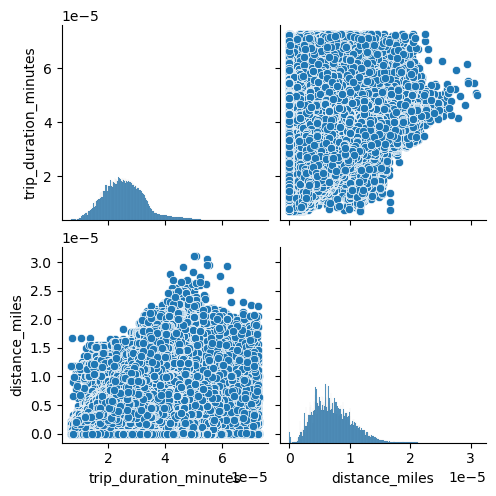

In [109]:
# scatter plot for trip_details variables
plt.figure(dpi=140)
sns.pairplot(numerical[trip_details])

**Inferences**
1.    This validates the high correlation between distance and trip duration variables. We also observe positive correlations between speed and other variables of the trip_details group.
2.    This high correlation can be used for feature engineering during later stages.

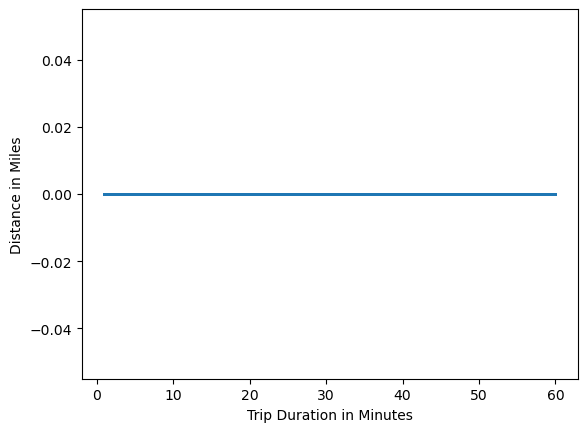

In [111]:
#if we remember from Univariate Analysis, we found that there were approx. 3000 observations with distance=0. We shall use a scatter plot to analyze the relation between this distance value and trip_duration_minutes
filtered_dist = data.loc[(data.distance_miles == 0) & (data.trip_duration_minutes < 60), ['distance_miles','trip_duration_minutes']]
plt.scatter(filtered_dist.trip_duration_minutes, filtered_dist.distance_miles , s=1, alpha=0.5)
plt.ylabel('Distance in Miles')
plt.xlabel('Trip Duration in Minutes')
plt.show()

In [77]:
data.distance.mean()

3.441143400649962

**From the scatterplot above, it would be better to replace these distance values with their mean value rather than deleting them. We shall pursue this in the data preprocessing section.**

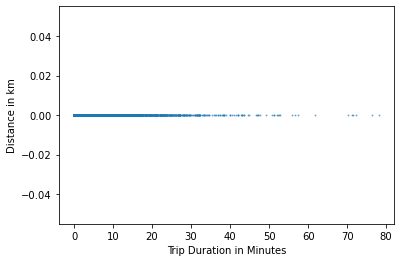

In [78]:
#if we also remember from Univariate Analysis, we found that there were approx. 3000 observations with distance=0. We shall use a scatter plot to analyze the relation between this distance value and trip_duration_minutes
filtered_dist = data.loc[(data.distance == 0) & (data.trip_duration_minutes < 120), ['distance','trip_duration_minutes']]
plt.scatter(filtered_dist.trip_duration_minutes, filtered_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance in km')
plt.xlabel('Trip Duration in Minutes')
plt.show()

<Figure size 840x560 with 0 Axes>

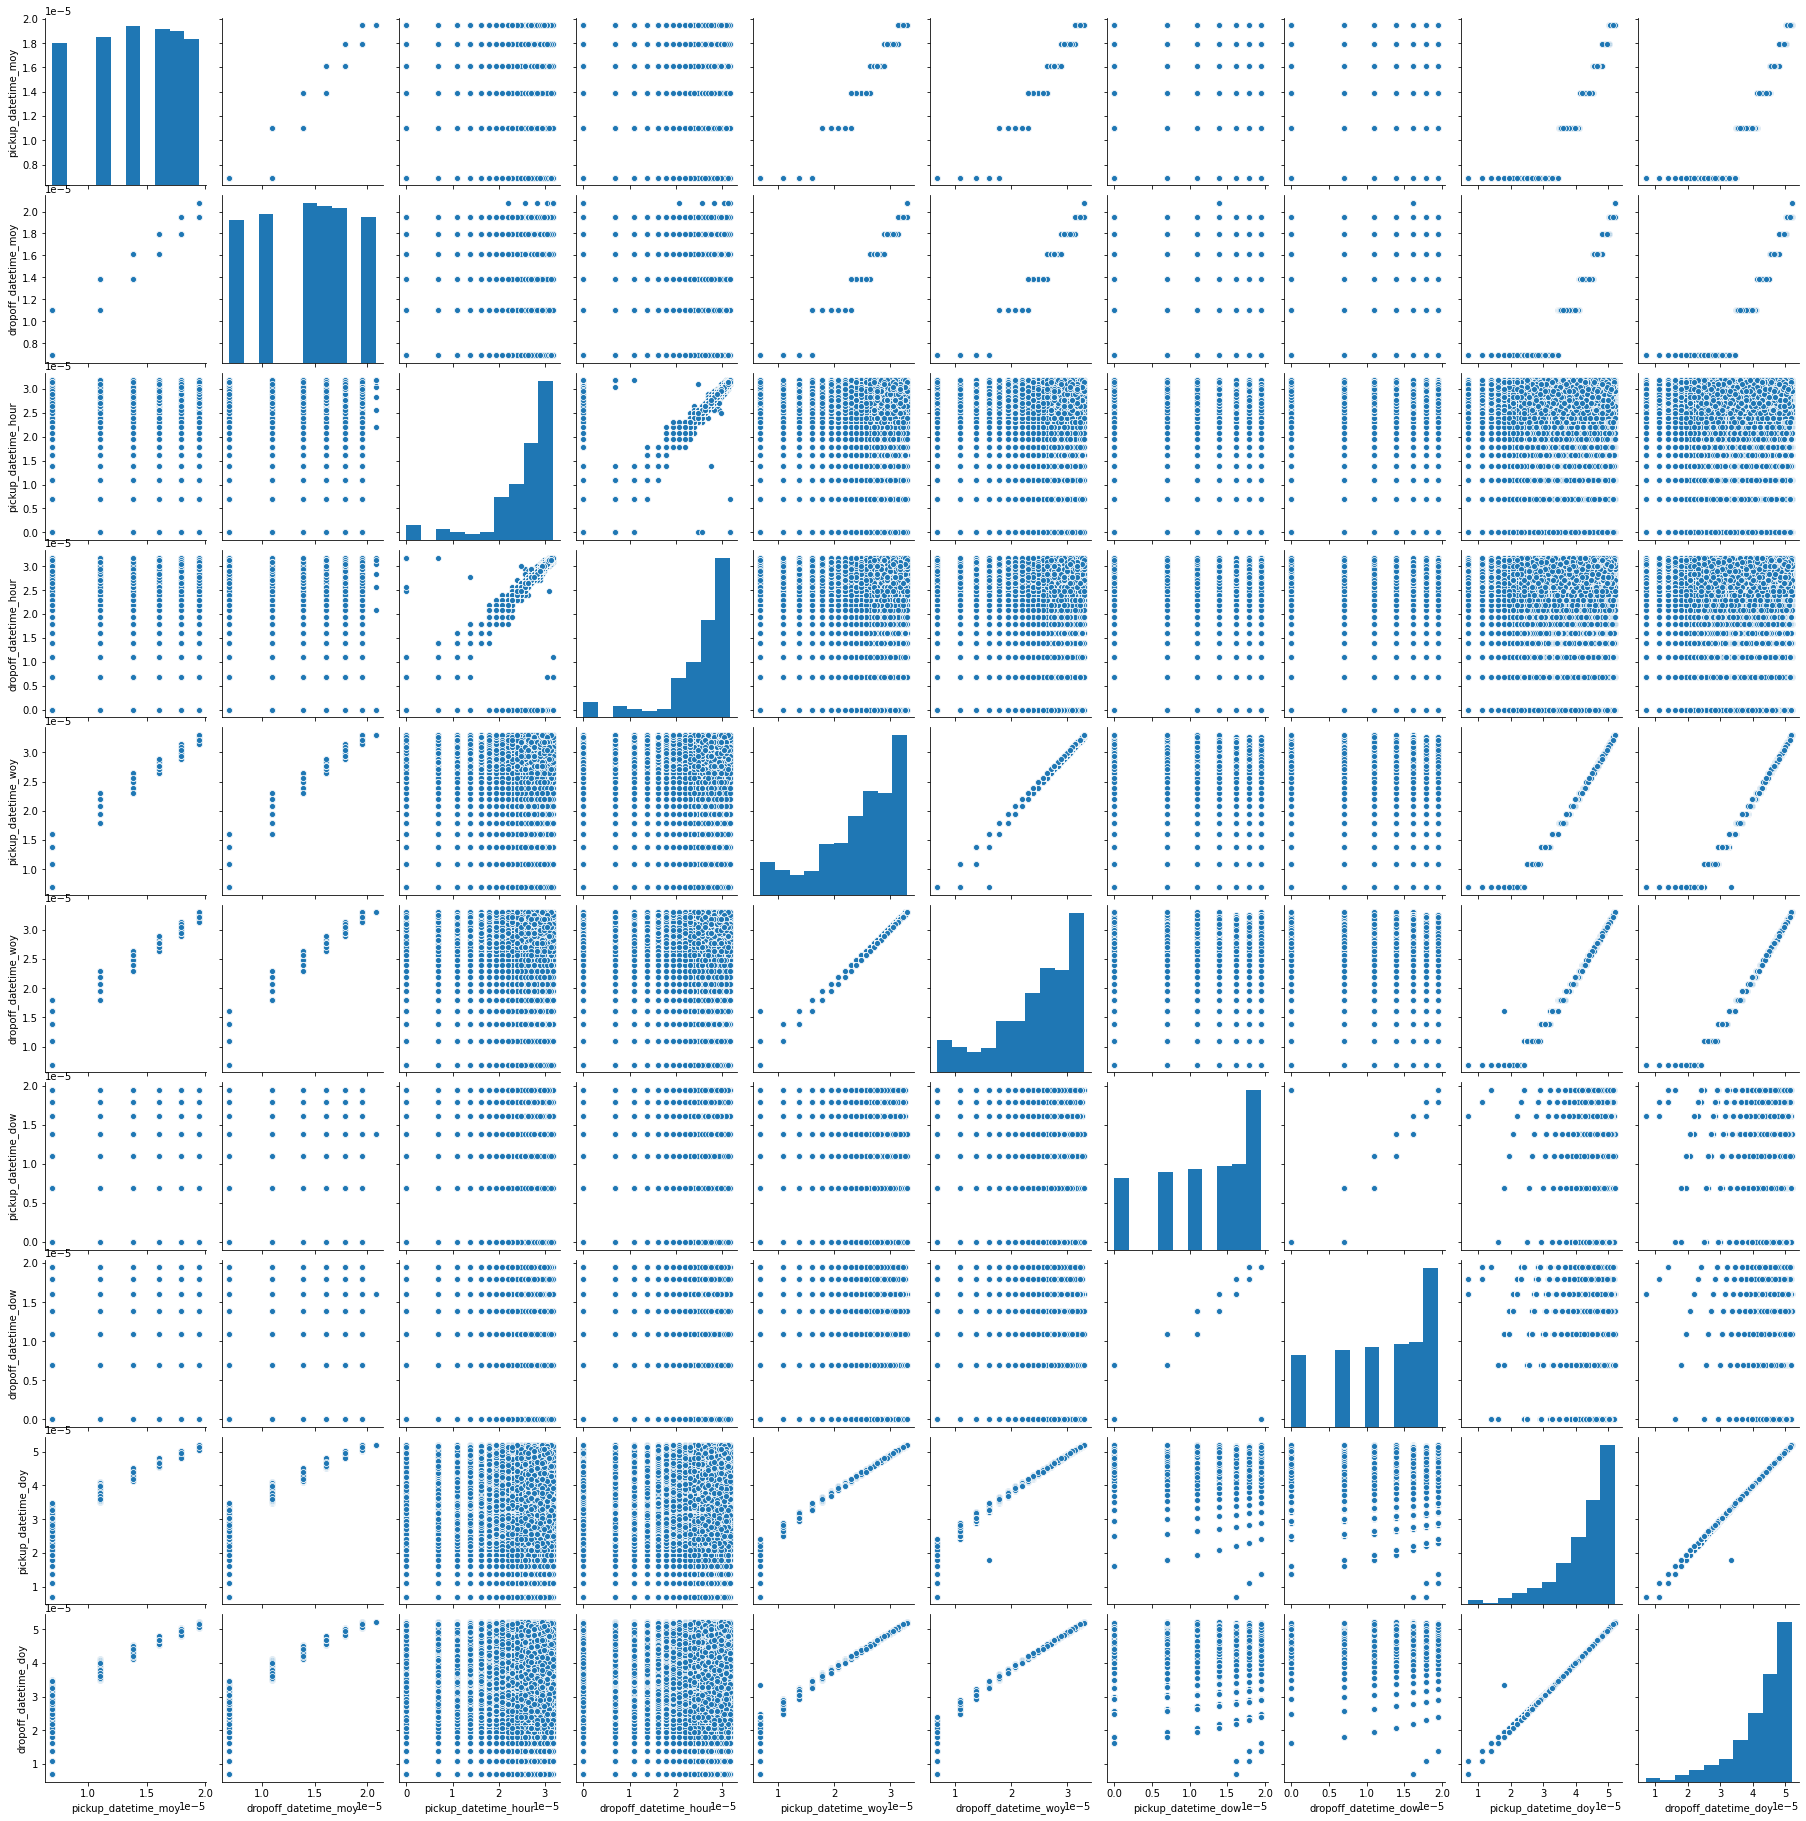

In [79]:
# scatter plot for pickup_dropoff_time variables
plt.figure(dpi=140)
sns.pairplot(numerical[pickup_dropoff_time])

**Inferences**
1.    This validates our finding that there exist many outliers in our pickup_dropoff_time data. Moreover, there is no apparent correlation present between the pickup_dropoff_time variables.

## Bivariate Analysis: Continuous-Categorical variables


**List of Hypotheses and investigation to perform under this combination.**

1.  Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to have higher trip durations?
2.  Is Vendor 1 less likely to deal with higher trip durations than Vendor 2 does?
3.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, experience higher trip duration?
4. Do taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel greater distances?
5. Does Vendor 2 deal with higher distances to travel than Vendor 1 does?
6. Do taxis that store and forward trips, because the vehicle did not have a connection to the server, travel greater distances?

In [348]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [349]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [357]:
def Bivariate_cont_cat_hypoth1(data, cont, cat):
  #creating 2 samples, passenger_counts <= 2 (x1) and 2 < passenger_counts < 7 (x2)
  x1 = data[cont][data[cat].str.contains("classic_bike")][:]
  x2 = data[cont][data[cat].str.contains("electric_bike|docked_bike")][:]
                  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot(['classic bike','electric and docked bikes'], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

### **1.  Are rides completed with classic bikes more likely to have travelled greater distances than those completed by electric or docked bikes?**

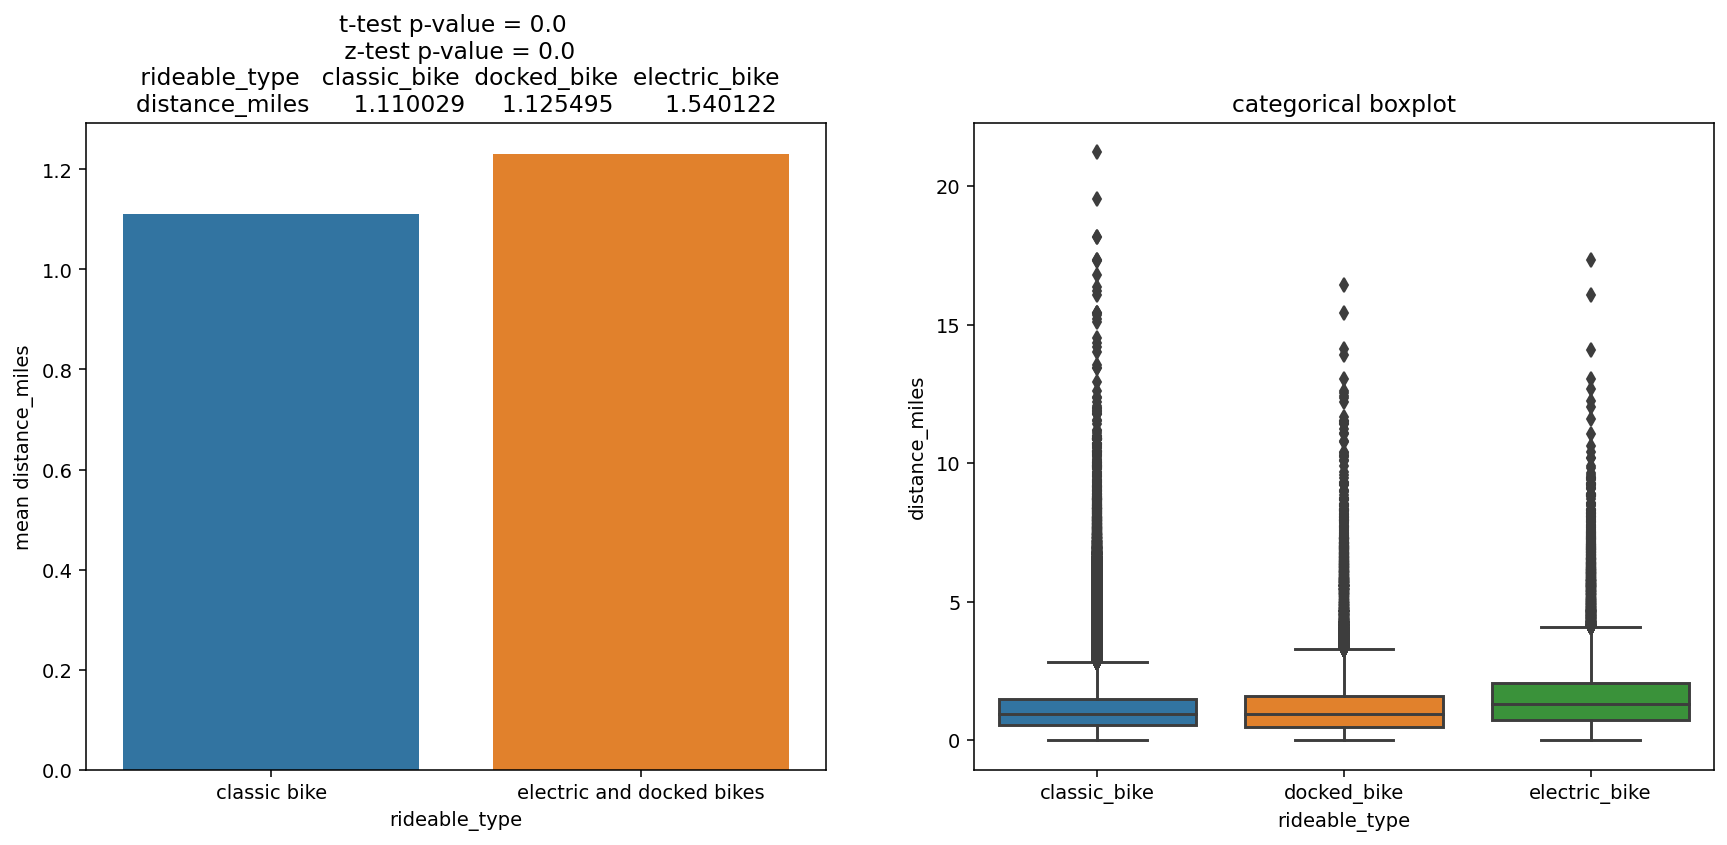

In [358]:
Bivariate_cont_cat_hypoth1(data, 'distance_miles', 'rideable_type') 

reject null, so electric bikes + docked bikes on avg travel greater distances. drop docked bike.

**Inferences**

1.    Taxis carrying more than 2 but less than 7 passengers (to remove outlier passenger of 7 and 9) had higher trip durations, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly.

**Result**

We can confidently reject the null hypothesis that taxis with higher passenger_counts, greater than 2 passengers but less than 7 passengers, are less likely to have higher trip durations.

### **2.  Is a casual rider less likely to deal with higher trip durations than member does?**

In [359]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot(["casual","member"], [m2, m1])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

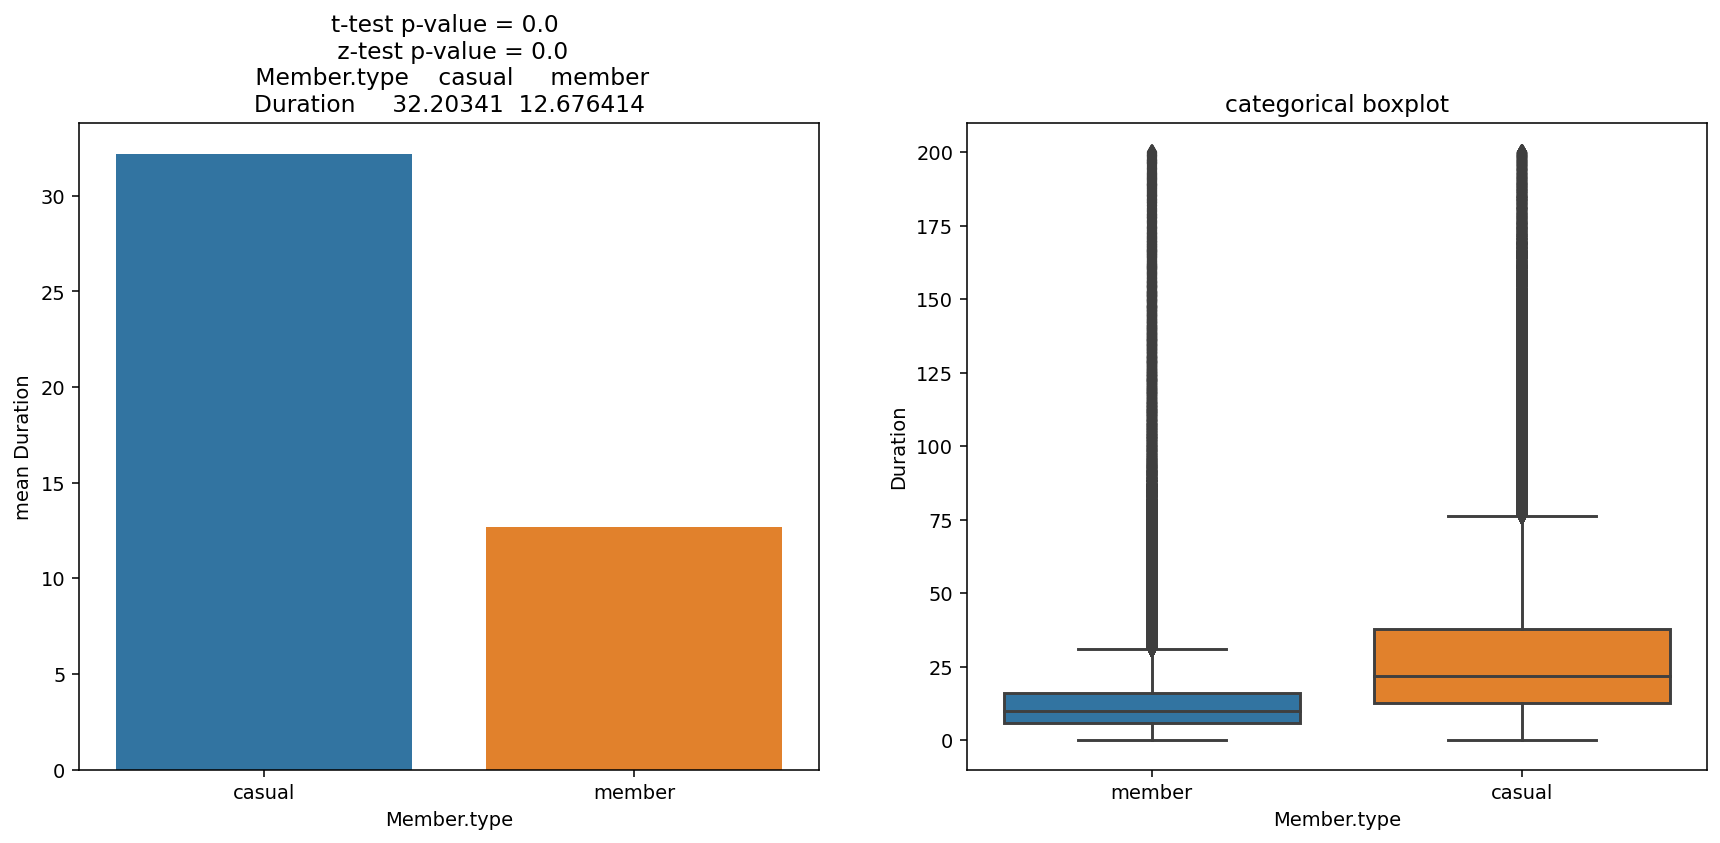

In [360]:
Bivariate_cont_cat(data, 'Duration', 'Member.type', "member")

In [193]:
combined_data.columns

Index(['trip_duration_minutes', 'Start.date', 'End.date',
       'Start.station.number', 'Start.station', 'End.station.number',
       'End.station', 'Member.type', 'start_lat', 'start_lng', 'end_lat',
       'end_lng', 'distance_miles', 'start_date_moy', 'start_date_hour',
       'start_date_woy', 'start_date_dow', 'start_date_doy', 'end_date_moy',
       'end_date_hour', 'end_date_woy', 'end_date_dow', 'end_date_doy'],
      dtype='object')

### **3.  Do electric bikes experience higher trip duration?**

In [363]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'electric and docked bikes'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

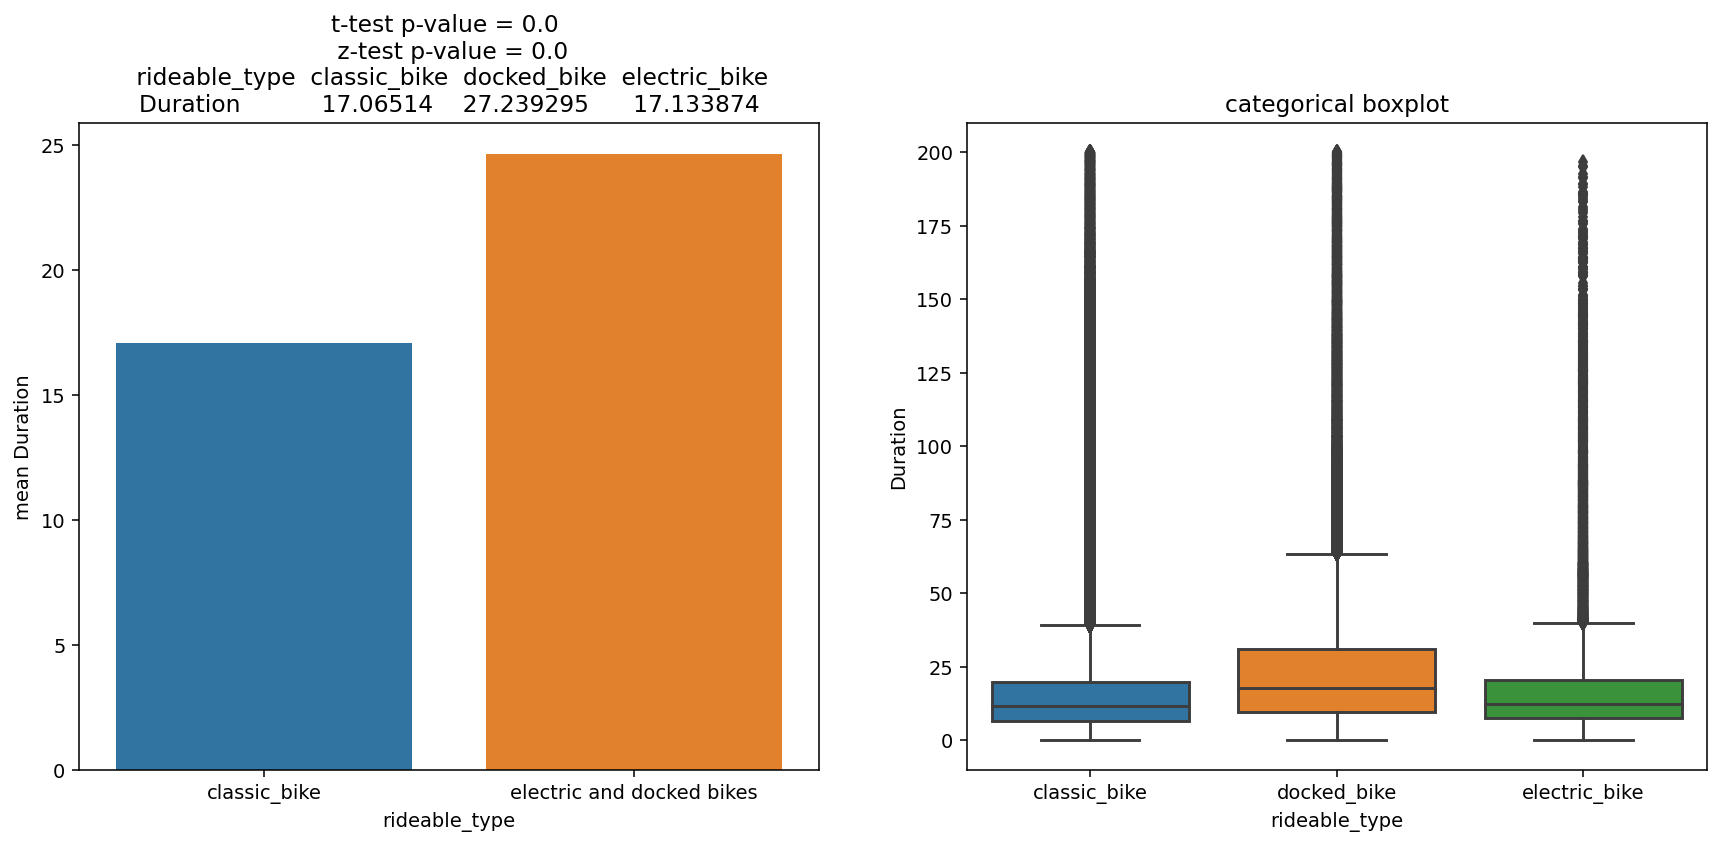

In [364]:
Bivariate_cont_cat(data, 'Duration', 'rideable_type', 'classic_bike')

## Bivariate : Categorical-Categorical

In [369]:
data['Member.type'] = data['Member.type'].astype('category')

In [370]:
data.dtypes[data.dtypes == 'category']

Start.station.number    category
End.station.number      category
rideable_type           category
Member.type             category
dtype: object

In [368]:
data.dtypes

Duration                       float64
Start.date              datetime64[ns]
End.date                datetime64[ns]
Start.station.number          category
Start.station                   object
End.station.number            category
End.station                     object
rideable_type                 category
Member.type                     object
start_lat                      float64
start_lng                      float64
end_lat                        float64
end_lng                        float64
distance_miles                 float64
start_date_moy                   int64
start_date_hour                  int64
start_date_woy                   int64
start_date_dow                   int64
start_date_doy                   int64
end_date_moy                     int64
end_date_hour                    int64
end_date_woy                     int64
end_date_dow                     int64
end_date_doy                     int64
dtype: object

#### List of Hypotheses to check under this combination
1.   Is rider status dependent on bike type?

In [371]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

### 1.  Is rider status dependent on bike type?

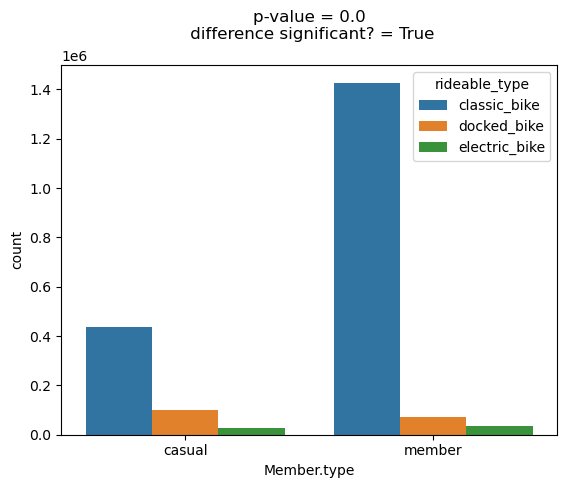

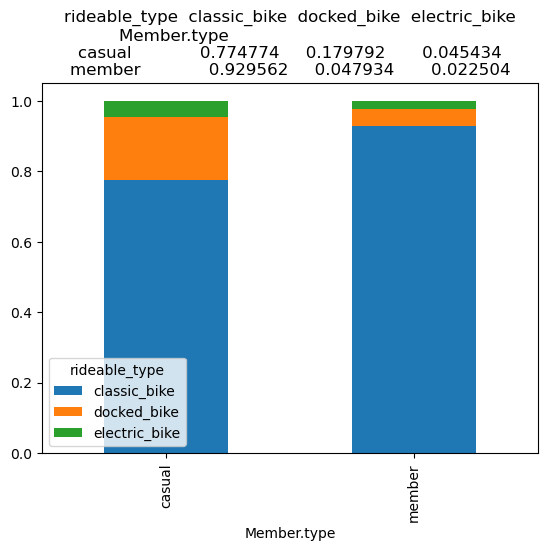

In [373]:
BVA_categorical_plot(data, 'rideable_type', 'Member.type')

# Pickup, Dropoff Visualization on DC Map using Folium

**We shall shuffle our dataset first and then use the first 1000 observations for the convenience of plotting and visualization. Note that the green markers with a label of the play icon denote pick up locations and red markers with a label of the stop icon denote dropoff locations.**

In [220]:
import folium
def show_fmaps(data, path=1):
    """function to generate map and add the pick up and drop coordinates
    1. Path = 1 : Join pickup (blue) and drop(red) using a straight line
    """
    map_1 = folium.Map(location=[39.13,-77.4], zoom_start=9,tiles='Stamen Toner') # manually added centre
    data.sample(frac=1)
    data_reduced = data.iloc[1:2000]
    for i in range(data_reduced.shape[0]):
        pick_long = data.loc[data.index ==i]['start_lng'].values[0]
        pick_lat = data.loc[data.index ==i]['start_lat'].values[0]
        dest_long = data.loc[data.index ==i]['end_lng'].values[0]
        dest_lat = data.loc[data.index ==i]['end_lat'].values[0]
        folium.Marker([pick_lat, pick_long], icon=folium.Icon(color='green',icon='play')).add_to(map_1)
        folium.Marker([dest_lat, dest_long], icon=folium.Icon(color='red',icon='stop')).add_to(map_1)
    return map_1
#left = -77.4, bottom = 38.7, right = -76.9, top = 39.13

In [224]:
data.loc[data.index ==0]['start_lng'].values[0]

-77.027822

In [226]:
map_1 = folium.Map(location=[39.13,-77.4], zoom_start=9,tiles='Stamen Toner') # manually added centre
data.sample(frac=1)
data_reduced = data.iloc[1:2000]
for i in range(data_reduced.shape[0]):
    pick_long = data.loc[data.index == i]['start_lng'].values[0]
    pick_lat = data.loc[data.index == i]['start_lat'].values[0]
    dest_long = data.loc[data.index == i]['end_lng'].values[0]
    dest_lat = data.loc[data.index == i]['end_lat'].values[0]
    folium.Marker([pick_lat, pick_long], icon=folium.Icon(color='green',icon='play')).add_to(map_1)
    folium.Marker([dest_lat, dest_long], icon=folium.Icon(color='red',icon='stop')).add_to(map_1)
map_1

IndexError: index 0 is out of bounds for axis 0 with size 0

In [33]:
import folium
map = folium.Map(location=[data.start_lat.mean(), data.start_lng.mean()], zoom_start=14, control_scale=True)
data_reduced = data.iloc[1:2000]
for index, location_info in data_reduced.iterrows():
    folium.Marker([location_info["start_lat"], location_info["start_lng"]], icon=folium.Icon(color='green',icon='play'), popup=location_info["Start.station"]).add_to(map)
    folium.Marker([location_info["end_lat"], location_info["end_lng"]], icon=folium.Icon(color='red',icon='stop'), popup=location_info["End.station"]).add_to(map)
map.save("map_first2k.html")

In [232]:
map.save("map_start_stations.html")

*   **This brings us to the end of our data preprocessing section and we can now focus on model building with our cleaned data!**

# COMBINED DF ANALYSIS

In [2]:
combined_data = pd.read_csv('../Data/Combined_df.csv')

In [3]:
combined_data = combined_data.drop('Unnamed: 0', axis=1)

In [4]:
combined_data.shape

(1961726, 12)

In [5]:
combined_data.columns

Index(['Duration', 'Start.date', 'End.date', 'Start.station.number',
       'Start.station', 'End.station.number', 'End.station', 'Member.type',
       'start_lat', 'start_lng', 'end_lat', 'end_lng'],
      dtype='object')

In [6]:
combined_data.isna().sum()

Duration                    0
Start.date                  0
End.date                    0
Start.station.number        0
Start.station               0
End.station.number      15603
End.station             15603
Member.type                 0
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
dtype: int64

In [7]:
combined_data = combined_data.dropna()
combined_data.isnull().sum()

Duration                0
Start.date              0
End.date                0
Start.station.number    0
Start.station           0
End.station.number      0
End.station             0
Member.type             0
start_lat               0
start_lng               0
end_lat                 0
end_lng                 0
dtype: int64

In [8]:
combined_data.shape

(1946123, 12)

In [9]:
combined_data.dtypes

Duration                  int64
Start.date               object
End.date                 object
Start.station.number    float64
Start.station            object
End.station.number      float64
End.station              object
Member.type              object
start_lat               float64
start_lng               float64
end_lat                 float64
end_lng                 float64
dtype: object

In [10]:
combined_data['Member.type'].value_counts()

Member    1157759
member     293770
Casual     289765
casual     204829
Name: Member.type, dtype: int64

In [11]:
combined_data['Member.type'] = combined_data['Member.type'].str.lower()

In [12]:
combined_data['Member.type'].value_counts()

member    1451529
casual     494594
Name: Member.type, dtype: int64

In [13]:
#Identifying variables with integer datatype
combined_data.dtypes[combined_data.dtypes == 'int64']

Duration    int64
dtype: object

In [14]:
combined_data['Start.station.number'] = combined_data['Start.station.number'].astype('category')
combined_data['End.station.number'] = combined_data['End.station.number'].astype('category')
combined_data.dtypes

Duration                   int64
Start.date                object
End.date                  object
Start.station.number    category
Start.station             object
End.station.number      category
End.station               object
Member.type               object
start_lat                float64
start_lng                float64
end_lat                  float64
end_lng                  float64
dtype: object

In [15]:
#Identifying variables with object datatype
combined_data.dtypes[combined_data.dtypes == 'object']

Start.date       object
End.date         object
Start.station    object
End.station      object
Member.type      object
dtype: object

In [16]:
#Converting the object data type variables to their respective datatype
combined_data['Member.type'] = combined_data['Member.type'].astype('category')
combined_data['Start.date'] = pd.to_datetime(combined_data['Start.date'])
combined_data['End.date'] = pd.to_datetime(combined_data['End.date'])

In [17]:
combined_data.dtypes

Duration                         int64
Start.date              datetime64[ns]
End.date                datetime64[ns]
Start.station.number          category
Start.station                   object
End.station.number            category
End.station                     object
Member.type                   category
start_lat                      float64
start_lng                      float64
end_lat                        float64
end_lng                        float64
dtype: object

In [18]:
combined_data.Duration.max()

200

In [19]:
combined_data.rename(columns={"Duration": "trip_duration_minutes"}, inplace=True)

In [20]:
combined_data.dtypes

trip_duration_minutes             int64
Start.date               datetime64[ns]
End.date                 datetime64[ns]
Start.station.number           category
Start.station                    object
End.station.number             category
End.station                      object
Member.type                    category
start_lat                       float64
start_lng                       float64
end_lat                         float64
end_lng                         float64
dtype: object

In [21]:
from haversine import haversine, Unit

#We shall also make a feature for distance of the trip in kilometers (km)
def calc_distance(data):
    pickup = (data['start_lat'], data['start_lng'])
    drop = (data['end_lat'], data['end_lng'])
    return haversine(pickup, drop,unit=Unit.MILES)
combined_data['distance_miles'] = combined_data.apply(lambda x: calc_distance(x), axis = 1)


In [22]:
# create time based features for pickup/dropoff_datetime 
combined_data['start_date_moy'] = combined_data["Start.date"].dt.month
combined_data['start_date_hour'] = combined_data["Start.date"].dt.hour
combined_data['start_date_woy'] = combined_data["Start.date"].dt.weekofyear
combined_data['start_date_dow'] = combined_data["Start.date"].dt.dayofweek
combined_data['start_date_doy'] = combined_data["Start.date"].dt.dayofyear

combined_data['end_date_moy'] = combined_data["End.date"].dt.month
combined_data['end_date_hour'] = combined_data["End.date"].dt.hour
combined_data['end_date_woy'] = combined_data["End.date"].dt.weekofyear
combined_data['end_date_dow'] = combined_data["End.date"].dt.dayofweek
combined_data['end_date_doy'] = combined_data["End.date"].dt.dayofyear

In [23]:
combined_data.describe()

trip_duration_minutes     start_lat     start_lng       end_lat  \
count           1.946123e+06  1.946123e+06  1.946123e+06  1.946123e+06   
mean            1.281829e+01  3.890178e+01 -7.703334e+01  3.890057e+01   
std             1.896074e+01  2.593621e-02  3.066829e-02  2.535906e-02   
min            -1.000000e+00  3.878261e+01 -7.736842e+01  3.878263e+01   
25%             1.000000e+00  3.889046e+01 -7.704507e+01  3.888999e+01   
50%             8.000000e+00  3.890088e+01 -7.703228e+01  3.890041e+01   
75%             1.600000e+01  3.891260e+01 -7.701725e+01  3.890987e+01   
max             2.000000e+02  3.912583e+01 -7.682552e+01  3.912583e+01   

            end_lng  distance_miles  start_date_moy  start_date_hour  \
count  1.946123e+06    1.946123e+06    1.946123e+06     1.946123e+06   
mean  -7.703289e+01    1.116244e+00    6.559214e+00     1.396912e+01   
std    3.020224e-02    8.230180e-01    3.003061e+00     4.801566e+00   
min   -7.736845e+01    0.000000e+00    1.000000e+00     0.000000e+00   
25%   -7.704486e+01    5.594242e-01    4.000000e+00     1.000000e+01   
50%   -7.703222e+01    9.310251e-01    7.000000e+00     1.500000e+01   
75%   -7.701725e+01    1.480475e+00    9.000000e+00     1.800000e+01   
max   -7.682554e+01    7.999751e+00    1.200000e+01     2.300000e+01   

       start_date_woy  start_date_dow  start_date_doy  end_date_moy  \
count    1.946123e+06    1.946123e+06    1.946123e+06  1.946123e+06   
mean     2.660854e+01    2.985071e+00    1.840147e+02  6.559260e+00   
std      1.303717e+01    1.964374e+00    9.140791e+01  3.003057e+00   
min      1.000000e+00    0.000000e+00    1.000000e+00  1.000000e+00   
25%      1.600000e+01    1.000000e+00    1.110000e+02  4.000000e+00   
50%      2.700000e+01    3.000000e+00    1.860000e+02  7.000000e+00   
75%      3.700000e+01    5.000000e+00    2.570000e+02  9.000000e+00   
max      5.300000e+01    6.000000e+00    3.660000e+02  1.200000e+01   

       end_date_hour  end_date_woy  end_date_dow  end_date_doy  
count   1.946123e+06  1.946123e+06  1.946123e+06  1.946123e+06  
mean    1.417330e+01  2.660887e+01  2.985803e+00  1.840165e+02  
std     4.867024e+00  1.303716e+01  1.965559e+00  9.140815e+01  
min     0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00  
25%     1.000000e+01  1.600000e+01  1.000000e+00  1.110000e+02  
50%     1.500000e+01  2.700000e+01  3.000000e+00  1.860000e+02  
75%     1.800000e+01  3.700000e+01  5.000000e+00  2.570000e+02  
max     2.300000e+01  5.300000e+01  6.000000e+00  3.660000e+02

In [24]:
# segregating variables into groups
pickup_dropoff_location = ['start_lat','start_lng','end_lat','end_lng']
trip_details = ['trip_duration_minutes', 'distance_miles']
pickup_dropoff_time = ['start_date_moy', 'end_date_moy', 'start_date_hour', 'end_date_hour', 'start_date_woy', 'end_date_woy', 'start_date_dow', 'end_date_dow', 'start_date_doy', 'end_date_doy']

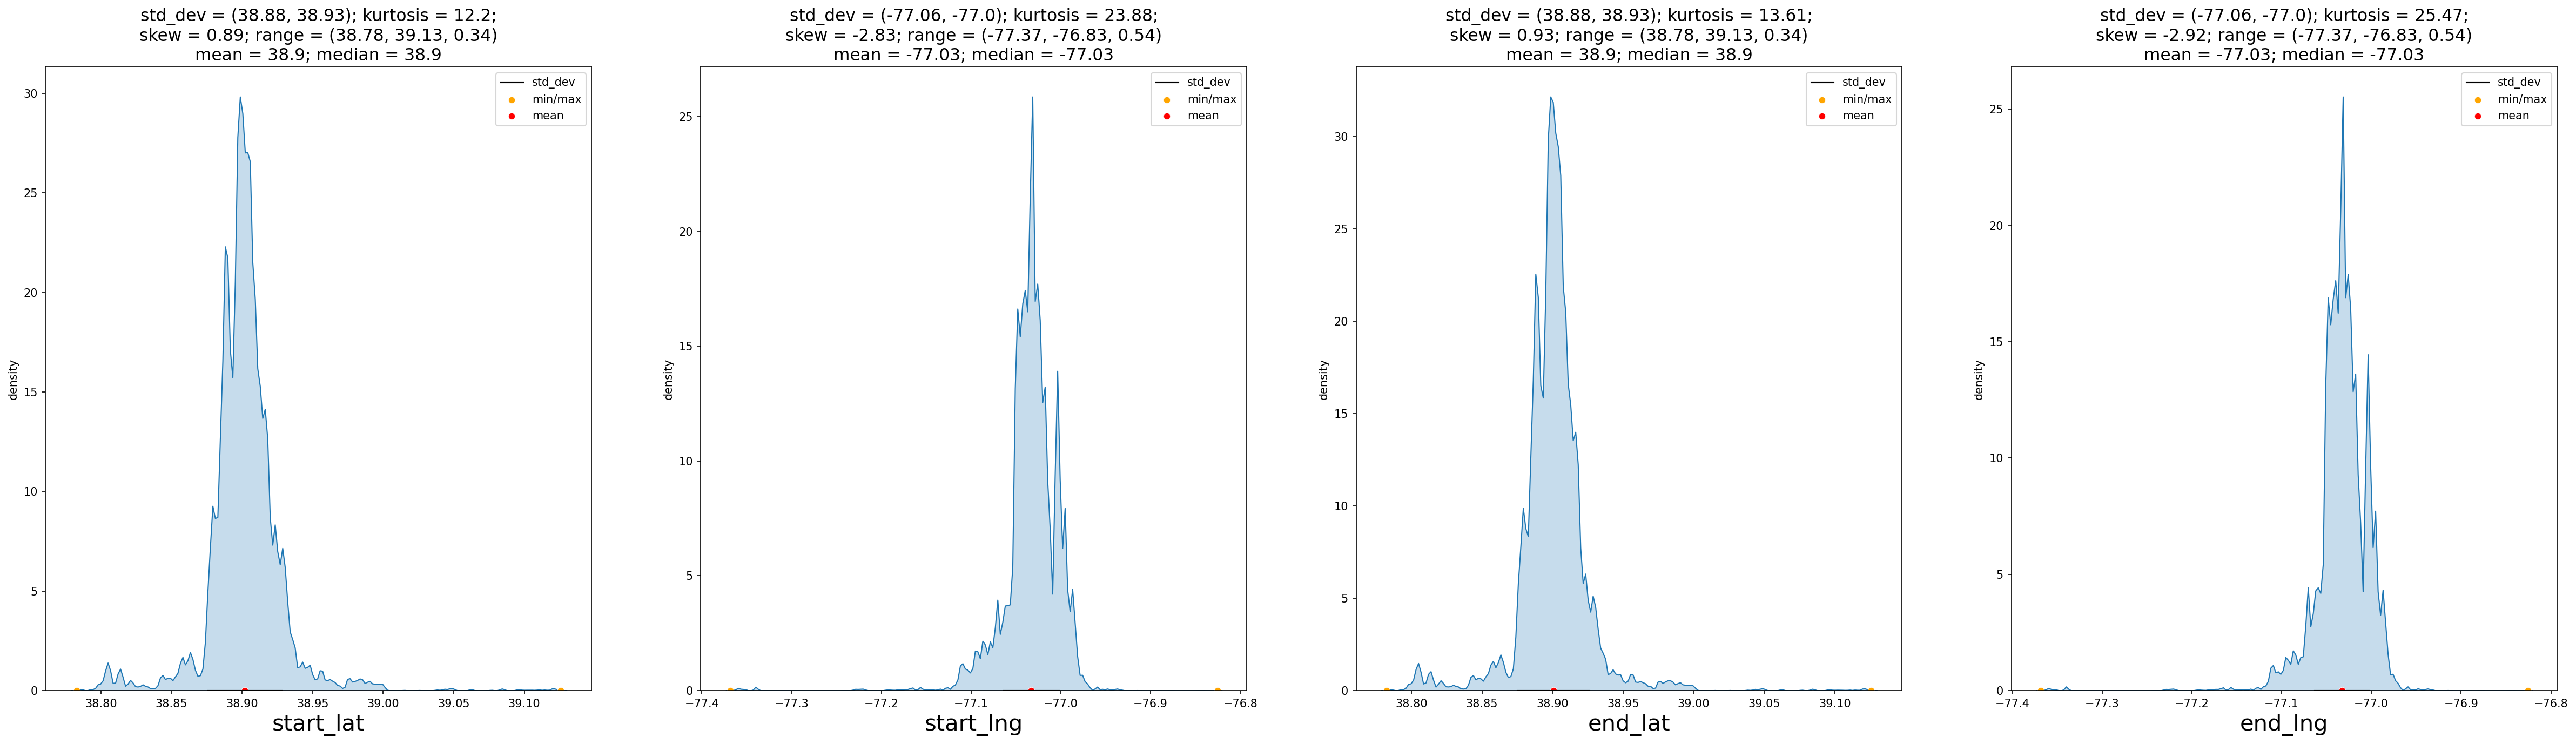

In [170]:
UVA_numeric(combined_data,pickup_dropoff_location)

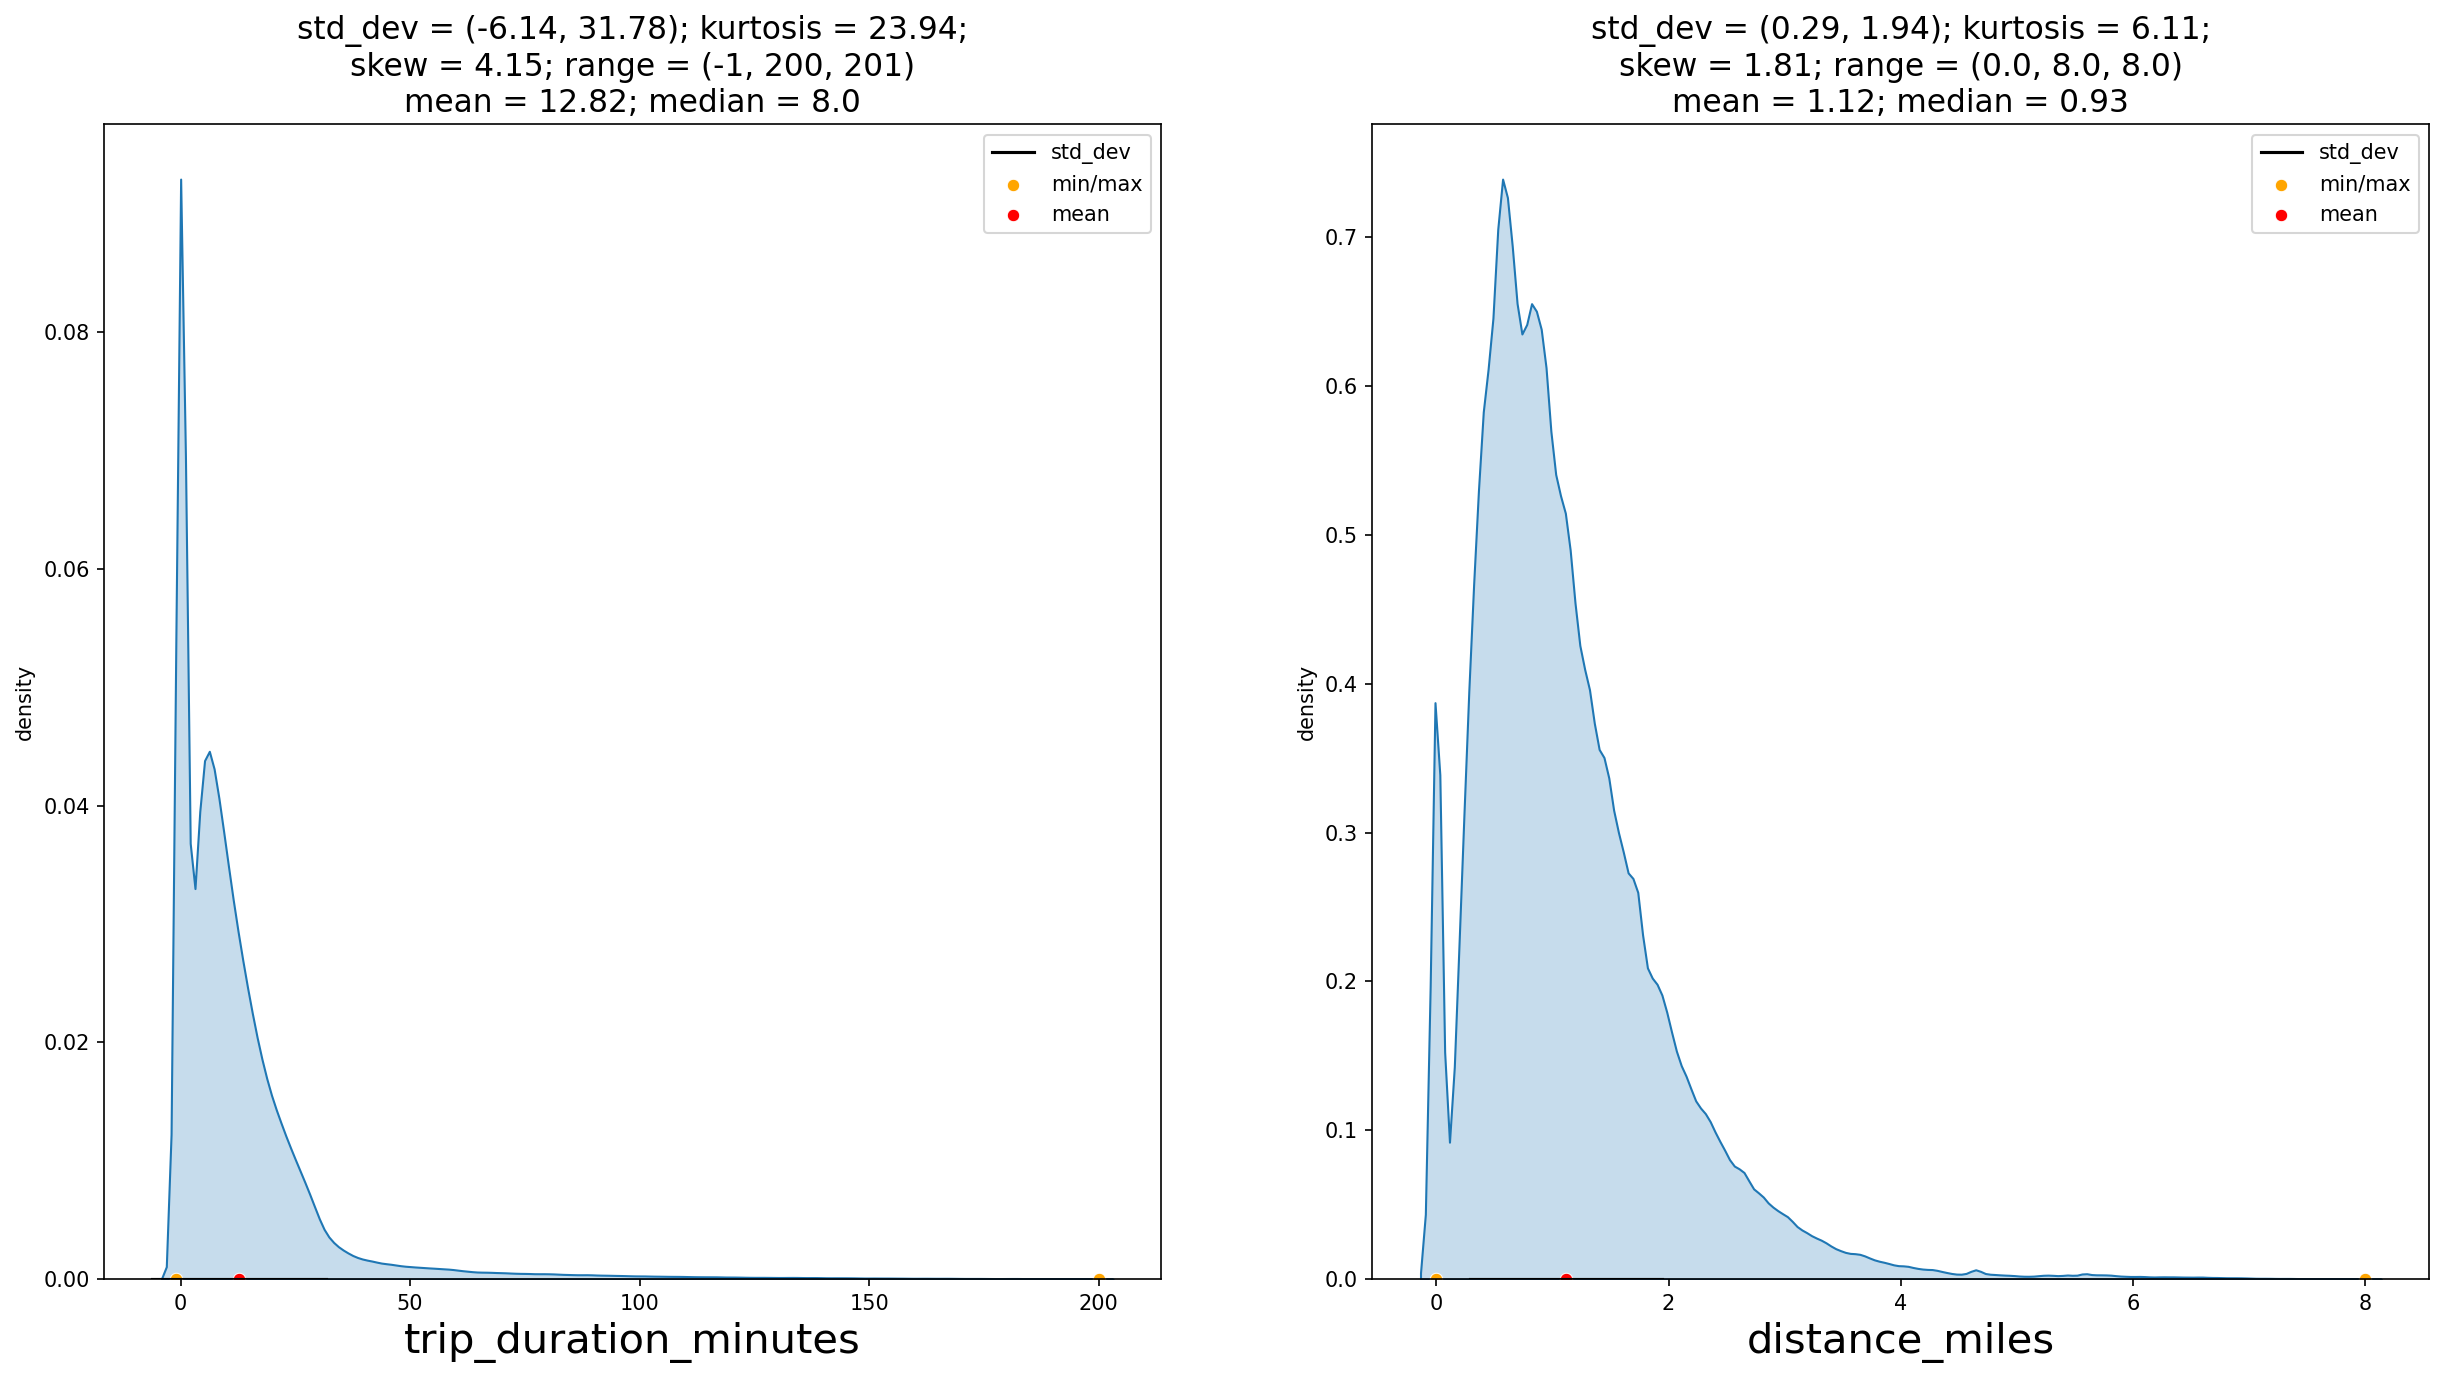

In [171]:
UVA_numeric(combined_data,trip_details)

In [ ]:
combined_data['trip_duration_minutes'].value_counts()

 0      424931
 6       91014
 5       86616
 7       84632
 8       82535
         ...  
 193        61
 198        61
 197        54
 199        52
-1           4
Name: trip_duration_minutes, Length: 202, dtype: int64

In [172]:
indexDuration = combined_data.loc[combined_data['trip_duration_minutes']==-1].index
combined_data.drop(indexDuration , inplace=True)

In [ ]:
combined_data.shape

(1946119, 23)

In [126]:
combined_data.loc[combined_data['trip_duration_minutes']==0]['distance_miles']

1447524    0.317290
1447526    0.267348
1447527    0.000000
1447528    0.317323
1447529    0.624788
             ...   
1961718    0.564549
1961719    1.208400
1961722    1.208430
1961723    1.385608
1961724    3.536628
Name: distance_miles, Length: 424931, dtype: float64

In [173]:
combined_data.loc[(combined_data.start_date_woy == 53),'start_date_doy'].max()

3

In [144]:
#change the pickup_datetime_woy and dropoff_datetime_woy values of 53 to 1
combined_data.loc[(combined_data.start_date_woy == 53),'start_date_woy'] = 1
combined_data.loc[(combined_data.end_date_woy == 53),'end_date_woy'] = 1
combined_data.loc[(combined_data.start_date_woy == 1),'start_date_doy'].max()

365

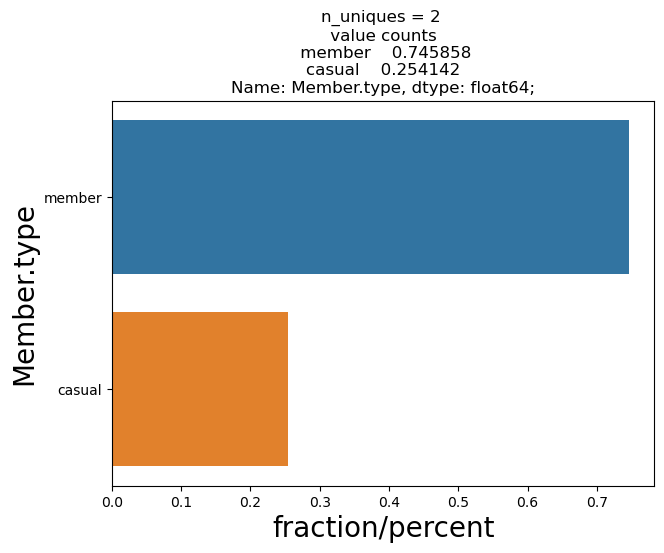

In [176]:
UVA_variable(combined_data, ['Member.type'])

In [222]:
#combined_data.loc[combined_data['start_lat'] > 38.9 & combined_data['end_lat'] < 38.91]

#combined_data.query('38.9 < start_lat < 38.91')

tmp = combined_data.loc[(combined_data['start_lat'] >= 38.86) & (combined_data['start_lat'] <= 38.902)]
tmp = tmp.loc[(tmp['start_lng'] >= -77.056) & (tmp['start_lng'] <= -77.0193)]
downtown_start = tmp.groupby(['start_lat','start_lng'])['Start.date'].count().reset_index()

In [224]:
downtown_start.columns = ['Lat', 'Long', 'Num_trips']
from folium.plugins import HeatMap
dtown_starts_map = folium.Map(location=[combined_data.start_lat.mean(), combined_data.start_lng.mean()], zoom_start=14, control_scale=True)
HeatMap(downtown_start).add_to(dtown_starts_map)
dtown_starts_map.save("dtown_start_heatmap.html")

In [225]:
end = combined_data.loc[(combined_data['end_lat'] >= 38.86) & (combined_data['end_lat'] <= 38.902)]
end = end.loc[(tmp['end_lng'] >= -77.056) & (end['end_lng'] <= -77.0193)]
downtown_end = end.groupby(['end_lat','end_lng'])['End.date'].count().reset_index()
downtown_end.columns = ['Lat', 'Long', 'Num_trips']
from folium.plugins import HeatMap
dtown_ends_map = folium.Map(location=[combined_data.end_lat.mean(), combined_data.end_lng.mean()], zoom_start=14, control_scale=True)
HeatMap(downtown_end).add_to(dtown_ends_map)
dtown_ends_map.save("dtown_end_heatmap.html")

In [229]:
#combined_data.loc[(combined_data['Start.station'].str.contains("37th & O St"))|(combined_data['Start.station'].str.contains("Georgetown Harbor")) | (combined_data['Start.station'].str.contains("Wisconsin Ave & O St"))]

combined_data.loc[(combined_data['Start.station'].str.contains("37th & O St"))]
map = folium.Map(location=[combined_data.start_lat.mean(), combined_data.start_lng.mean()], zoom_start=14, control_scale=True)
gtown = combined_data.loc[(combined_data['Start.station'].str.contains("37th & O St"))]
gtown_reduced = end.loc[(tmp['end_lng'] >= -77.056) & (end['end_lng'] <= -77.0193)]
for index, location_info in data_reduced.iterrows():
    folium.Marker(38.907821, -77.071611, icon=folium.Icon(color='green',icon='play'), popup=location_info["Start.station"]).add_to(map)
    folium.Marker([location_info["end_lat"], location_info["end_lng"]], icon=folium.Icon(color='red',icon='stop'), popup=location_info["Member.type"]).add_to(map)
    folium.PolyLine([(38.907821, -77.071611),
       (location_info["end_lat"], location_info["end_lng"])],
                color='blue',
                weight=1.5,
                opacity=0.8).add_to(map)
map.save("map_gtown_paths.html")


trip_duration_minutes          Start.date            End.date  \
134558                      22 2016-12-05 17:11:04 2016-12-05 17:33:29   
134559                      12 2016-11-07 18:08:03 2016-11-07 18:19:51   
134560                     115 2016-07-22 12:56:29 2016-07-22 14:51:14   
134561                      23 2016-03-08 17:26:38 2016-03-08 17:50:00   
134562                      11 2016-03-29 18:06:13 2016-03-29 18:17:03   
...                        ...                 ...                 ...   
1790399                      0 2022-02-28 21:13:40 2022-02-28 21:31:21   
1790400                      0 2022-06-11 22:02:18 2022-06-11 22:13:18   
1790401                      0 2022-04-21 11:26:59 2022-04-21 11:49:48   
1790403                      1 2022-06-22 13:27:43 2022-06-22 13:58:04   
1790404                      0 2022-03-18 16:18:37 2022-03-18 16:32:45   

        Start.station.number                           Start.station  \
134558               31236.0  37th & O St NW / Georgetown University   
134559               31236.0  37th & O St NW / Georgetown University   
134560               31236.0  37th & O St NW / Georgetown University   
134561               31236.0  37th & O St NW / Georgetown University   
134562               31236.0  37th & O St NW / Georgetown University   
...                      ...                                     ...   
1790399              31236.0  37th & O St NW / Georgetown University   
1790400              31236.0  37th & O St NW / Georgetown University   
1790401              31236.0  37th & O St NW / Georgetown University   
1790403              31236.0  37th & O St NW / Georgetown University   
1790404              31236.0  37th & O St NW / Georgetown University   

        End.station.number                                  End.station  \
134558             31624.0                   North Capitol St & F St NW   
134559             31200.0         Massachusetts Ave & Dupont Circle NW   
134560             31246.0                   M St & Pennsylvania Ave NW   
134561             31263.0                               10th & K St NW   
134562             31015.0     Rosslyn Metro / Wilson Blvd & Ft Myer Dr   
...                    ...                                          ...   
1790399            31116.0               California St & Florida Ave NW   
1790400            31939.0                       Wilson Blvd & N Oak St   
1790401            31289.0  Henry Bacon Dr & Lincoln Memorial Circle NW   
1790403            31224.0                               18th & L St NW   
1790404            31226.0                   34th St & Wisconsin Ave NW   

        Member.type  start_lat  start_lng  ...  start_date_moy  \
134558       member  38.907821 -77.071611  ...              12   
134559       member  38.907821 -77.071611  ...              11   
134560       casual  38.907821 -77.071611  ...               7   
134561       member  38.907821 -77.071611  ...               3   
134562       member  38.907821 -77.071611  ...               3   
...             ...        ...        ...  ...             ...   
1790399      member  38.907740 -77.071652  ...               2   
1790400      member  38.907740 -77.071652  ...               6   
1790401      casual  38.907740 -77.071652  ...               4   
1790403      casual  38.907740 -77.071652  ...               6   
1790404      casual  38.907740 -77.071652  ...               3   

         start_date_hour  start_date_woy  start_date_dow  start_date_doy  \
134558                17              49               0             340   
134559                18              45               0             312   
134560                12              29               4             204   
134561                17              10               1              68   
134562                18              13               1              89   
...                  ...             ...             ...             ...   
1790399               21     

In [242]:
gtown = combined_data.loc[(combined_data['Start.station'].str.contains("37th & O St"))]
gtown_ends = gtown.groupby(['end_lat','end_lng'])['End.date'].count().reset_index().sort_values(by='End.date', ascending=False).head(50)
gtown_ends = gtown_ends.loc[(gtown_ends['end_lat'] != 38.907821) &  (gtown_ends['end_lng'] != -77.071611)] # only want to see other stations apart from gtown's
gtown_ends.columns = ['End_Lat', 'End_Lng', 'Total Trips']
gtown_ends_map = folium.Map(location=[combined_data.start_lat.mean(), combined_data.start_lng.mean()], zoom_start=14, control_scale=True)
HeatMap(gtown_ends).add_to(gtown_ends_map)
folium.Marker([38.907821, -77.071611], icon=folium.Icon(color='green',icon='play')).add_to(gtown_ends_map)
gtown_ends_map.save("gtown_ends_heatmap.html")

In [27]:
combined_data.loc[(combined_data['Start.station'].str.contains("Massachusetts Ave & Dupont Circle NW"))]

trip_duration_minutes          Start.date            End.date  \
69161                       13 2016-11-02 13:03:32 2016-11-02 13:16:18   
69162                       20 2016-06-05 12:25:18 2016-06-05 12:44:56   
69163                       26 2016-09-02 21:03:37 2016-09-02 21:29:16   
69164                       12 2016-09-19 18:15:42 2016-09-19 18:28:00   
69165                       21 2016-09-17 12:24:15 2016-09-17 12:45:34   
...                        ...                 ...                 ...   
1755414                      0 2022-02-01 18:04:02 2022-02-01 18:11:04   
1755415                      0 2022-06-04 12:46:23 2022-06-04 12:48:47   
1755416                      0 2022-04-28 00:57:39 2022-04-28 01:10:11   
1755417                      0 2022-08-23 16:32:31 2022-08-23 16:40:27   
1755418                      0 2022-04-05 16:41:32 2022-04-05 16:48:51   

        Start.station.number                         Start.station  \
69161                31200.0  Massachusetts Ave & Dupont Circle NW   
69162                31200.0  Massachusetts Ave & Dupont Circle NW   
69163                31200.0  Massachusetts Ave & Dupont Circle NW   
69164                31200.0  Massachusetts Ave & Dupont Circle NW   
69165                31200.0  Massachusetts Ave & Dupont Circle NW   
...                      ...                                   ...   
1755414              31200.0  Massachusetts Ave & Dupont Circle NW   
1755415              31200.0  Massachusetts Ave & Dupont Circle NW   
1755416              31200.0  Massachusetts Ave & Dupont Circle NW   
1755417              31200.0  Massachusetts Ave & Dupont Circle NW   
1755418              31200.0  Massachusetts Ave & Dupont Circle NW   

        End.station.number                       End.station Member.type  \
69161              31235.0     19th St & Constitution Ave NW      member   
69162              31271.0  Constitution Ave & 2nd St NW/DOL      casual   
69163              31258.0                  Lincoln Memorial      casual   
69164              31119.0              14th & Belmont St NW      member   
69165              31639.0                     2nd & G St NE      member   
...                    ...                               ...         ...   
1755414            31257.0     22nd & I St NW / Foggy Bottom      member   
1755415            31285.0                    22nd & P ST NW      member   
1755416            31124.0               14th & Irving St NW      member   
1755417            31202.0                    14th & R St NW      member   
1755418            31125.0                    15th & W St NW      member   

         start_lat  start_lng  ...  start_date_moy  start_date_hour  \
69161    38.910169 -77.044361  ...              11               13   
69162    38.910169 -77.044361  ...               6               12   
69163    38.910169 -77.044361  ...               9               21   
69164    38.910169 -77.044361  ...               9               18   
69165    38.910169 -77.044361  ...               9               12   
...            ...        ...  ...             ...              ...   
1755414  38.910100 -77.044400  ...               2               18   
1755415  38.910100 -77.044400  ...               6               12   
1755416  38.910106 -77.044405  ...               4                0   
1755417  38.910100 -77.044400  ...               8               16   
1755418  38.910100 -77.044400  ...               4               16   

         start_date_woy  start_date_dow  start_date_doy  end_date_moy  \
69161                44               2             307            11   
69162                22               6             157             6   
69163                35               4             246             9   
69164                38               0             263             9   
69165                37               5             261             9   
...                 ...             ...             ...           ...   
17

In [33]:
import folium
from folium.plugins import HeatMap

def end_locations_per_start(data, start_location):
    start_location  = data.loc[(data['Start.station'].str.contains(start_location))]
    #start_location_lat = data[data['Start.station']==start_location]['start_lat'].values[0]
    #start_location_lng = data[data['Start.station']==start_location]['start_lng'].values[0]
    end = start_location.groupby(['end_lat','end_lng'])['End.date'].count().reset_index().sort_values(by='End.date', ascending=False).head(50)
    #end = end.loc[(end['end_lat'] != start_location) &  (end['end_lng'] != -77.071611)] # only want to see other stations apart from gtown's
    end.columns = ['End_Lat', 'End_Lng', 'Total Trips']
    loc_ends_map = folium.Map(location=[data.start_lat.mean(), data.start_lng.mean()], zoom_start=14, control_scale=True)
    HeatMap(end).add_to(loc_ends_map)
    folium.TileLayer('Stamen Terrain').add_to(loc_ends_map)
    folium.TileLayer('Stamen Toner').add_to(loc_ends_map)
    folium.TileLayer('Stamen Water Color').add_to(loc_ends_map)
    folium.TileLayer('cartodbpositron').add_to(loc_ends_map)
    folium.TileLayer('cartodbdark_matter').add_to(loc_ends_map)
    folium.LayerControl().add_to(loc_ends_map)
    #folium.Marker([start_location_lat, start_location_lng], icon=folium.Icon(color='green',icon='play')).add_to(loc_ends_map)
    loc_ends_map.save("enterstartloc_heatmap.html")
end_locations_per_start(combined_data, "Massachusetts Ave & Dupont Circle NW")

In [ ]:
import folium
map = folium.Map(location=[combined_data.start_lat.mean(), combined_data.start_lng.mean()], zoom_start=14, control_scale=True)
data_reduced = combined_data.sample(n = 1000) #combined_data.iloc[1:10]
for index, location_info in data_reduced.iterrows():
    folium.Marker([location_info["start_lat"], location_info["start_lng"]], icon=folium.Icon(color='green',icon='play'), popup=location_info["Member.type"]).add_to(map)
    folium.Marker([location_info["end_lat"], location_info["end_lng"]], icon=folium.Icon(color='red',icon='stop'), popup=location_info["Member.type"]).add_to(map)
    folium.PolyLine([(location_info["start_lat"], location_info["start_lng"]),
       (location_info["end_lat"], location_info["end_lng"])],
                color='red',
                weight=2.5,
                opacity=0.8).add_to(map)
map.save("map_first10_paths.html")


38.9072,-77.02638

# Model Building Linear Regression

In [9]:
import pandas as pd             #pandas for using dataframe and reading csv file(s)
import numpy as np              #numpy for vector operations and basic maths
import matplotlib.pyplot as plt #for plotting
%matplotlib inline              
import seaborn as sns           #for making plots
from haversine import haversine #for working with latitudinal and longitudinal data points
import math                     #for basic math operations
import warnings
from pandas.plotting import parallel_coordinates #for multivariate plots
warnings.filterwarnings('ignore') #ignore deprecation warnings
import folium
from folium.plugins import HeatMap, MarkerCluster

In [3]:
data = pd.read_csv('../Data/Combined_df_teg.csv')
data = data.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)
data['Member.type'] = data['Member.type'].str.lower()

In [5]:
from math import radians
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

data_model = data.sample(frac=0.1).reset_index(drop=True)

data_model['start_lat'] = data_model['start_lat'].apply(radians)
data_model['start_lng'] = data_model['start_lng'].apply(radians)

X = data_model[['start_lat', 'start_lng']].values
y = data_model['Duration'].values

X_train, X_test, y_train, y_test \
  = train_test_split(X, y, test_size=0.25)

nbrs = KNeighborsRegressor(weights='distance', metric='haversine')

nbrs.fit(X_train, y_train)

y_pred = nbrs.predict(X_test)

In [6]:
len(y_pred)

52680

In [12]:
unique, counts = np.unique(y_pred, return_counts=True)

In [16]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[17.19       24.5       ]
 [ 7.34333333  8.35      ]
 [13.15       12.4       ]
 ...
 [37.79333333 38.31666667]
 [ 8.33333333 12.46666667]
 [13.12666667  4.18333333]]


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.014645756019737943

In [24]:
from math import radians
from statistics import mode
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

data_model = data.sample(frac=0.1).reset_index(drop=True)

data_model['start_lat'] = data_model['start_lat'].apply(radians)
data_model['start_lng'] = data_model['start_lng'].apply(radians)
data_model['end_lat'] = data_model['end_lat'].apply(radians)
data_model['end_lng'] = data_model['end_lng'].apply(radians)

X = data_model[['start_lat', 'start_lng', 'end_lat', 'end_lng']].values
y = data_model['Duration'].values

bestK = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels4 = bestK.fit_predict(X)
data_model['kmeans_labels'] = labels4

In [25]:
data_model['kmeans_labels'].value_counts()

2    104726
0     88248
1     17744
Name: kmeans_labels, dtype: int64

In [26]:
data_model.shape

(210718, 15)